<div class="alert alert-info" role="alert">
    <center><h1 style="color:red;"><strong><font color = red>Working with Business Time Series Data in Python
and Pandas</font></strong></h1></center><br>

<br><br>
    <center><img src="http://dataanalyticscorp.com/wp-content/uploads/2018/03/logo.png"></center>
</div>
<br><br>
Instructor:

> Walter R. Paczkowski, Ph.D.

Affliations:
> [Data Analytics Corp.](http://www.dataanalyticscorp.com/)

Contact and Other Information:
>* [Email Instructor With Questions](mailto:walt@dataanalyticscorp.com)
>* [Learn About the Instructor](http://www.dataanalyticscorp.com/)
>* [See the Instructor's LinkedIn Profile](https://www.linkedin.com/in/walter-paczkowski-a17a1511/)
>* [See Instructor's Books](https://www.amazon.com/-/e/B084KK4SF5?ref_=pe_1724030_132998070)

Material Source:
>* These notes draw heavily from W.R. Paczkowski, *Business Analytics: Data Science for Business Problems* (Springer, forthcoming 2021, Chapters 1 and 7).

<div class="alert alert-info" role="alert">
    
<font color = black>Slide Set-Up
-----------------------------

</div>
    
This code sets up the presentation slides.

In [1]:
##
## Slide set-up code
##
from IPython.display import Image
def slide( what ):
    display( Image( "../Slides/TS_Page_" + what + ".png", width = 50, height = 50, retina = True ) )

<div class="alert alert-info" role="alert">
    
<font color = black>Contents
-----------------------------
    
</div>

1. [**_Helpful Background_**](#Helpful-Background)
    >1. [About this Notebook](#About-this-Notebook)
    >2. [Online Tutorials](#Online-Tutorials)
    >3. [Must-Read Book](#Must-Read-Book)
    >4. [Recommended Books](#Recommended-Books)
2. [**_Lesson 0: Best Practices_**](#Lesson-0:-Best-Practices)
    >1. [Load Python Packages](#Load-Python-Packages)
    >2. [Set Data Path](#Set-Data-Path)
    >3. [Set Default Functions and Formats](#Set-Default-Functions-and-Formats)
3. [**_Lesson I: Time Series Introduction_**](#Lesson-I:-Time-Series-Introduction)
4. [**_Lesson II: Highlights of Pandas Time Functionality_**](#Lesson-II:-Highlights-of-Pandas-Time-Functionality)
    >1. [Date Epoch: Again](#Date-Epoch:-Again)
    >2. [Pandas datetime Variable Operations](#Pandas-datetime-Variable-Operations)
        1. [Assemble datetime Variable From Individual Components](#Assemble-datetime-Variable-From-Individual-Components)
    >3. Exercises
        1. [Exercise II.1](#Exercise-II.1)
    >4. [Pandas DatetimeIndex and PeriodIndex](#Pandas-DatetimeIndex-and-PeriodIndex)
        1. [DatetimeIndex](#DatetimeIndex)
        2. [Date Range](#Date-Range)
        3. Exercises
            1. [Exercise II.2](#Exercise-II.2)
        4. [Queries with DatetimeIndex](#Queries-with-DatetimeIndex)
        5. Exercises
            1. [Exercise II.3](#Exercise-II.3)
            2. [Exercise II.4](#Exercise-II.4)
        6. [PeriodIndex](#PeriodIndex)
        7. [Period Range](#Period-Range)
        8. Exercises
            1. [Exercise II.5](#Exercise-II.5)
            2. [Exercise II.6](#Exercise-II.6)
    >5. [Calendrical Operations](#Calendrical-Operations)
        1. [Shifting or Lagging a Time Series](#Shifting-or-Lagging-a-Time-Series)
        2. [Differences of a Time Series](#Differences-of-a-Time-Series)
        3. [Percent Change of a Time Series](#Percent-Change-of-a-Time-Series)
        4. [Annualized Percent Change of a Time Series](#Annualized-Percent-Change-of-a-Time-Series)
        5. Exercises
            1. [Exercise II.7](#Exercise-II.7)
            2. [Exercise II.8](#Exercise-II.8)
5. [**_Lesson III: Digging Into Time Series Data with Pandas_**](#Lesson-III:-Digging-Into-Time-Series-Data-with-Pandas)
    >1. [Accessor Functions: Extracting Specific Periods](#Accessor-Functions:-Extracting-Specific-Periods)
    >2. Exercises
        1. [Exercise III.1](#Exercise-III.1)
    >3. [Resampling to Change Time Series Frequencies](#Resampling-to-Change-Time-Series-Frequencies)
    >4. Exercises
        1. [Exercise III.2](#Exercise-III.2)
    >5. [Getting Decade Data](#Getting-Decade-Data)
        1. [Pinkham Data Example](#Pinkham-Data-Example)
6. [**_Lesson IV: Time Series Structure and Analysis_**](#Lesson-IV:-Time-Series-Structure-and-Analysis)
    >1. [Simple Statistics](#Simple-Statistics)
    >2. [Buys-Ballot Table](#Buys-Ballot-Table)
    >3. Exercises
        1. [Exercise IV.1](#Exercise-IV.1)
    >4. [Time Series Data Visualization](#Time-Series-Data-Visualization)
        1. [Time Series Plots](#Time-Series-Plots)
        2. [Boxplots for Seasonality](#Boxplots-for-Seasonality)
        3. [Autocorrelation Plot](#Autocorrelation-Plot)
        4. [Partial Autocorrelation Plot](#Partial-Autocorrelation-Plot)
        5. Exercises
            1. [Exercise IV.2](#Exercise-IV.2)
7. [**_Lesson V: Time Series Modeling_**](#Lesson-V:-Time-Series-Modeling)
    >1. [Overview of Time Series Models](#Overview-of-Time-Series-Models)
    >2. [Econometric Models and Autocorrelation Issues](#Econometric-Models-and-Autocorrelation-Issues)
        1. [Detecting Autocorrelation](#Detecting-Autocorrelation)
            1. [Graphs of Residuals](#Graphs-of-Residuals)
            2. [Formal Tests](#Formal-Tests)
        2. [Correcting for Autocorrelation](#Correcting-for-Autocorrelation)
    >3. [Stochastic Time Series Models (a.k.a., Box-Jenkins)](#Stochastic-Time-Series-Models-(a.k.a.,-Box-Jenkins))
        1. [The AR(1) Model and Random Walks](#The-AR(1)-Model-and-Random-Walks)
            1. [Random Walk without Drift](#Random-Walk-without-Drift)
            2. [Random Walk with Drift](#Random-Walk-with-Drift)
            3. [Digression: Monte Carlo Simulation of Random Walk](#Digression:-Monte-Carlo-Simulation-of-Random-Walk)
        2. [Quick Introduction to Stationarity](#Quick-Introduction-to-Stationarity)
            1. Examples
                1. [Example A](#Example-A)
                2. [Example B](#Example-B)
                3. [Example C](#Example-C)
            2. [Stationarity Tests](#Stationarity-Tests)
            3. Exercises
                1. [Exercise V.1](#Exercise-V.1)
        3. [Estimating an AR(1) Model](#Estimating-an-AR(1)-Model)
        4. [Forecasting with the AR(1) Model](#Forecasting-with-the-AR(1)-Model)
            1. Exercises
                1. [Exercise V.2](#Exercise-V.2)
7. [**_Summary and Wrap-up_**](#Summary-and-Wrap\-up)
8. [**_Contact Information_**](#Contact-Information)
9. [**_Appendix_**](#Appendix)
10. [**_Exercise Solutions_**](#Exercise-Solutions)

<div class="alert alert-info" role="alert">
    
<font color = black>Helpful Background
---------------------------------------

[Back to Contents](#Contents)    
    
</div>


### About this Notebook

[Back to Contents](#Contents)

This notebook accompanies the PDF presentation 

> **_Working with Business Time Series Data in Python and Pandas_** 

by Walter R. Paczkowski, Ph.D. (2021).  There is more content and commentary in this notebook than in the presentation deck.  Nonetheless, the two complement each other and so should be studied together.  Every effort has been made to use the same key slide titles in the presentation deck and this notebook to help your learning.  For your convenience, most of the presentation deck slides have been incorporated into this notebook.

### Online Tutorials

[Back to Contents](#Contents)

>* <a href="http://docs.python.org/2/tutorial/" target="_parent">Python Tutorial</a>
>* <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html" target="_parent">Pandas Tutorial</a>
>* <a href="https://seaborn.pydata.org/tutorial.html" target="_parent">Seaborn Tutorial</a>
>* <a href="https://www.statsmodels.org/stable/index.html" target="_parent">Statsmodels Tutorial</a>

### Must-Read Book

[Back to Contents](#Contents)

>* <a href="https://www.amazon.com/gp/product/1491957662/ref=as_li_tl?ie=UTF8&tag=quantpytho-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1491957662&linkId=8c3bf87b221dbcd8f541f0db20d4da83" target="_parent">Main Pandas go-to book:</a> *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd Edition) by Wes McKinney.

### Recommended Books

[Back to Contents](#Contents)

>* *Business Analytics: Data Science for Business Problems* by W.R. Paczkowski (Springer, forthcoming 2021)
>* <a href="https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057/ref=sr_1_3?dchild=1&keywords=Python+Data+Science+Handbook&qid=1606315305&sr=8-3" target="_parent">Good book:</a> *Python Data Science Handbook: Essential Tools for Working with Data* by Jake VanderPlas.*  See Chapter 3, pp. 188 -- 208.

<div class="alert alert-info" role="alert">
    
<font color = black>Lesson 0: Best Practices
--------------------------------------

[Back to Contents](#Contents)    
    
</div>

### Load Python Packages

[Back to Contents](#Contents)

You have to load a Python package before you can use it.  Loading is done using an *import* command.  An alias is assigned when you import the package.  I recommend loading all the packages at once at the beginning of your notebook.

In [2]:
##
## ===> Data Management <===
##
import numpy as np
import pandas as pd
##
## Set an option for the number of Pandas columns to display.  Eight in this case.
##
pd.set_option( 'display.max_columns', 8 )
##
## ===> Visualization <===
##
import seaborn as sns
import matplotlib.pyplot as plt
##
## ===> Speciality <===
##
import sidetable
##
## Color package
##   Install with: 
##     pip install simple-colors
##     
import simple_colors as sc
##
## ===> Python Date/Time Packages <===
##
from datetime import date
from datetime import time
from datetime import datetime
from dateutil import parser
##
## ===> Modeling and Analysis <===
##
## For modeling, notice the import command for
## the formula API and the summary option
##
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms
from statsmodels.stats.api import anova_lm
##
from scipy.stats import skewtest
##
## ===> Calendar Package <===
##
import calendar
##
## ===> Time Series Specific <===
##
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from statsmodels.tsa.ar_model import AutoReg, ar_select_order


**_Code Explanation_**

This code block loads the necessary Python packages for this course.  I recommend setting options, such as those for graphs and print, as was done here.  

### Set Default Functions and Formats

[Back to Contents](#Contents)

It is best practice to define paths in one location.  This makes finding errors and changes easier.

**_Recommendation_**

I recommend that you put these formats and utility functions in a script file, perhaps named *utilities.py*, and load them in your *Best Practices* section of your notebook.  You can load and run them using %run.  Example: 

> %run c:/scriptslib/utilities.py

In [3]:
##
## ===> Utility Functions <===
##
def boldprt( s1, s2 = None ):
    """
    Print text in bold and the return to normal.
    Args:
        s1 = string
        s2 = string, usually an f-string
    """
    bold = '\033[1m'
    normal = '\033[0m'
    if s2 == None:
        print( sc.red( s1, 'bold' ) )
    else:
        print( sc.red( s1, 'bold' ) + s2 )
##
def df_size( df ):
    """
    Purpose: Display DataFrame size as nice output: rows and columns.
    Args:
        df: DataFrame handle.
    """
    data = { 'Count': [ df.shape[ 0 ], df.shape[ 1 ] ] }
    idx = [ 'Number of Rows', 'Number of Columns' ]
    display( pd.DataFrame( data, index = idx ).style.set_caption( 'Dimensions for DataFrame ' + get_df_name( df ) ).\
            set_table_styles( tbl_styles ) )
##
def mvReport( df ):
    """
    Purpose: Calculate and display missing value report.
    Packages: Use sidetable package accessor stb.
    Parameters:
        df: dataFrame handle.
    """
    x = df.stb.missing( )
    ##
    ## Reorder columns and capitalize
    ##
    cols = [ 'total', 'missing', 'percent' ]
    x = x[ cols ]
    x.columns = x.columns.str.capitalize()
    ##
    ## Display
    ##
    base = 'Base: n = ' + str( df.shape[ 0 ] )
    fmt_dict = { 'Missing':'{:,.0f}', 'Total':'{:,.0f}', 'Percent':'{:.3}%' }
    display( x.style.set_caption( 'Missing Value Report for DataFrame ' + get_df_name( df ) ).\
        format( fmt_dict ).set_table_styles( tbl_styles ) )
    print( base )
##
def column_check( df ):
    """
    Created: 10/22/2020
    Revised: 10/22/2020
    Purpose: Counts number of characters on DataFrame column names and number of leading and trailing white spaces.
    Parameters: DataFrame
    Return: DataFrame
    """
    cols = df.columns
    n = len( cols )
    ##
    lgh = [ len( cols[ i ] ) for i in range( n ) ]
    lead = [ len( cols[ i ] ) - len( cols[ i ].lstrip() ) for i in range( n ) ]
    trail = [ len( cols[ i ] ) - len( cols[ i ].rstrip() ) for i in range( n ) ]
    ##
    dt = { 'Column Name':cols, '#Characters':lgh, 'Leading White Spaces':lead, 'Trailing White Spaces':trail}
    df_whs = pd.DataFrame( dt )
    df_whs.set_index( [ 'Column Name', '#Characters' ], inplace = True )
    ##
    return df_whs.style.bar( subset = [ 'Leading White Spaces', 'Trailing White Spaces' ], vmin = 0 ).\
        set_caption( 'DataFrame Column Check for DataFrame ' + get_df_name( df ) ).set_table_styles( tbl_styles )
##
def get_df_name( df ):
    """
    Purpose: Get DataFrame name
    Source: https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
    Parameters: DataFrame handle
    Return: DataFrame name as string
    """
    name = [ x for x in globals() if globals()[ x ] is df ][ 0 ]
    return name
##
def annual_rate( df, series, freq = 'M' ):
    """
    Purpose: Converts series rate of change to annual rate
    Parameters:
        df: DataFrame
        series: series
        freq = frequency; default = 'M' for monthly
    Return: Series at annual rate
    """
    ser = df[ series ]
    ##
    rate = ser/ser.shift( 1 )
    ##
    if freq == 'M':
        x = 12
    elif freq == 'Q':
        x = 4
    else:
        x = 1
    rate = ( ( rate ** x ) - 1 ) * 100
    return rate
##
## ===> Data Visualization Functions <===
##
def footer( ax ):
    """
    Purpose: Footer for graphs.  Display base and sample size.
    Parameters:
        None.  Assumes footer statement is defined as base = 'XXX'.
    """
    ax.annotate( base, ( 0, 0 ), ( 0, -0.3 ), xycoords = 'axes fraction' )
##
def tick_labels( tick ):
    """
    Purpose: Modify graph ticks.
    Parameters:
        tick: axis x or y (lowercase).
    """
    if tick == 'y':
        vals = ax.get_yticks()
        ax.set_yticklabels( format.format( x ) for x in vals )
    else:
        vals = ax.get_xticks()
        ax.set_xticklabels( format.format( x ) for x in vals )
##
def leg( ax, ttl = None ):
    """
    Purpose: Standardize location of legends.
    Parameters:
        ax: ax handle for graph.
        ttl: legend title.
    """
    ax.legend( title = ttl, loc = 'upper right', frameon = False, bbox_to_anchor=(1.25, 1.0) )
##
## ===> Default Formats <===
##
font_title = 20
format = '{:0.1%}'
format_dollar = '${:,.2f}'
p_value = '{:0.4f}'
format_fig = ( 13, 5 )
##
## ===> DataFrame Styles <===
##
tbl_styles = [ {
    'selector': 'caption',
    'props': [
        ('color', 'darkblue'),
        ('font-size', '18px')
    ] } ]
##
## ===> Datetime Functions <===
##
def datetime_to_epoch( ser ):
    """
    Purpose: Converts Pandas datetime data to epoch
    Source: StackOverFlow: Convert pandas DateTimeIndex to Unix Time?  
        https://stackoverflow.com/questions/15203623/convert-pandas-datetimeindex-to-unix-time
    Comment: Don't convert NaT to large negative values.
    Parameters: Pandas Series
    """
    if ser.hasnans:
        res = ser.dropna().astype('int64').astype('Int64').reindex( index = ser.index )
    else:
        res = ser.astype( 'int64' )
    return res // 10**9
##
## Define calendar names/notation
##
month_lst = [ calendar.month_abbr[ i ] for i in range( 1, 13 ) ]
month_dict = { i:calendar.month_abbr[ i ] for i in range( 1, 13 ) }
##
qrt_lst = [ 'Q' + 'I'*i if i < 4 else 'QIV' for i in range( 1, 5 ) ]
qrt_dict = { i:'Q' + 'I'*i if i < 4 else 'QIV' for i in range( 1, 5 ) }

### Set Data Path

[Back to Contents](#Contents)

It is best practice to define paths in one location.  This makes finding errors and changes easier.

In [4]:
##
## Set data path
##
path = '../Data/'
boldprt( f'Path set to: ', path )

Path set to: ../Data/


<div class="alert alert-info" role="alert">
    
<font color = black>Lesson I: Time Series Introduction
--------------------------------------

[Back to Contents](#Contents)    
    
</div>
In this introductory lesson, I will:

>1. discuss the importance of time series analysis;
>2. define a time series and related terminology;
>3. describe time series components; and
>4. explain how to work with dates and times in Python.


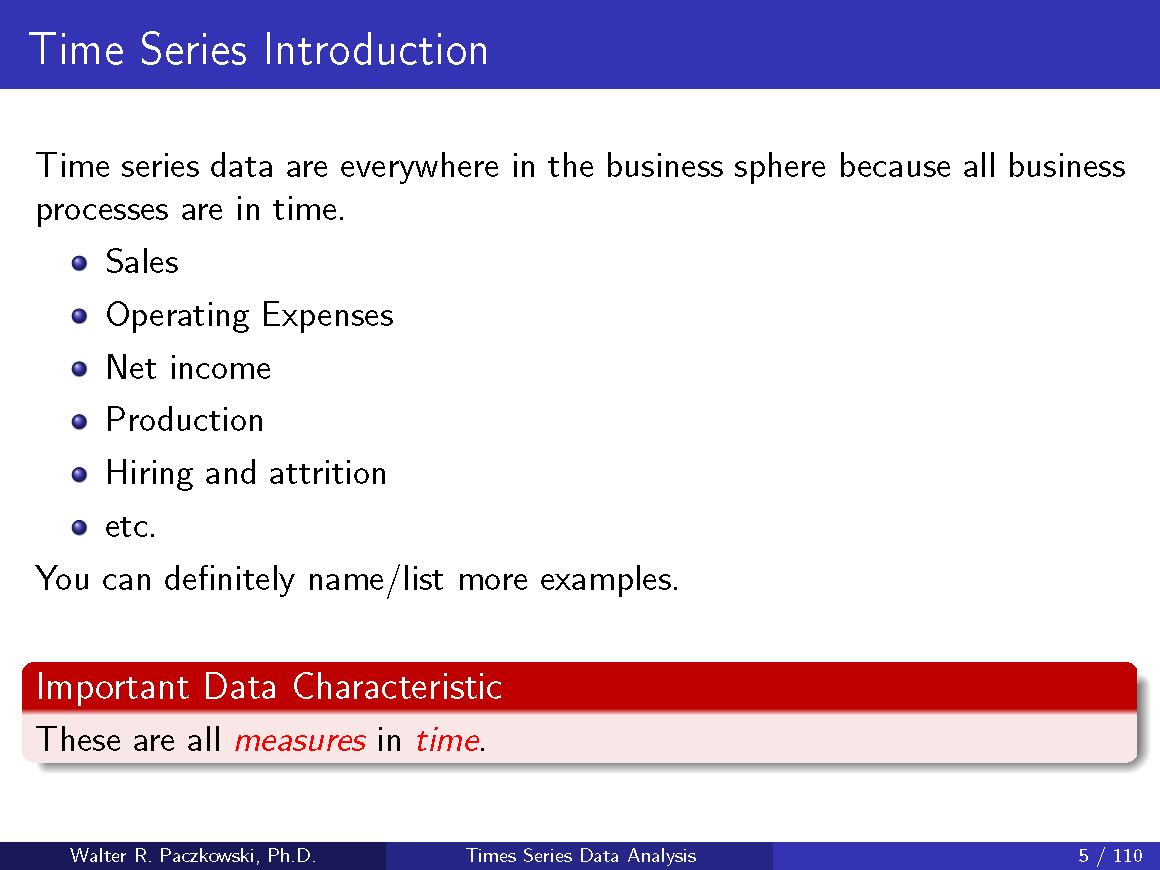

In [5]:
slide( '005' )

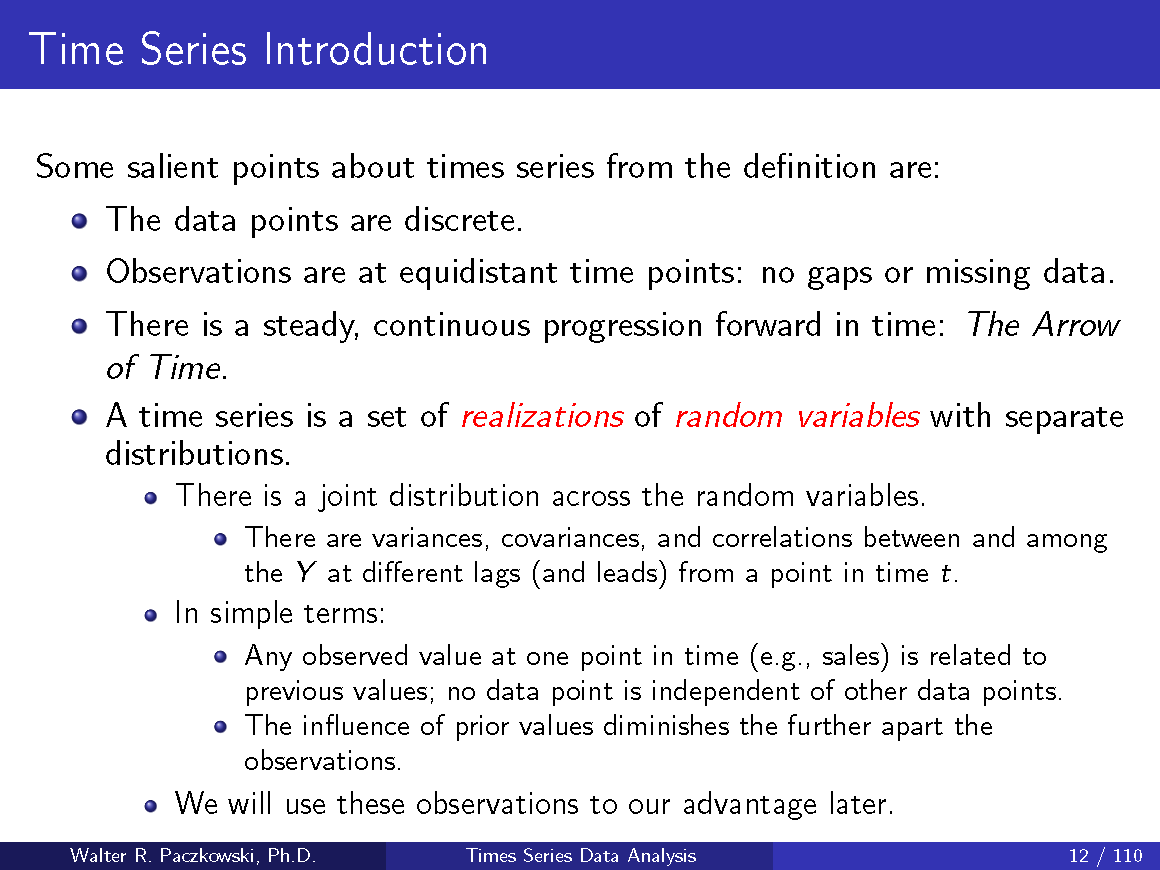

In [6]:
slide( '012' )

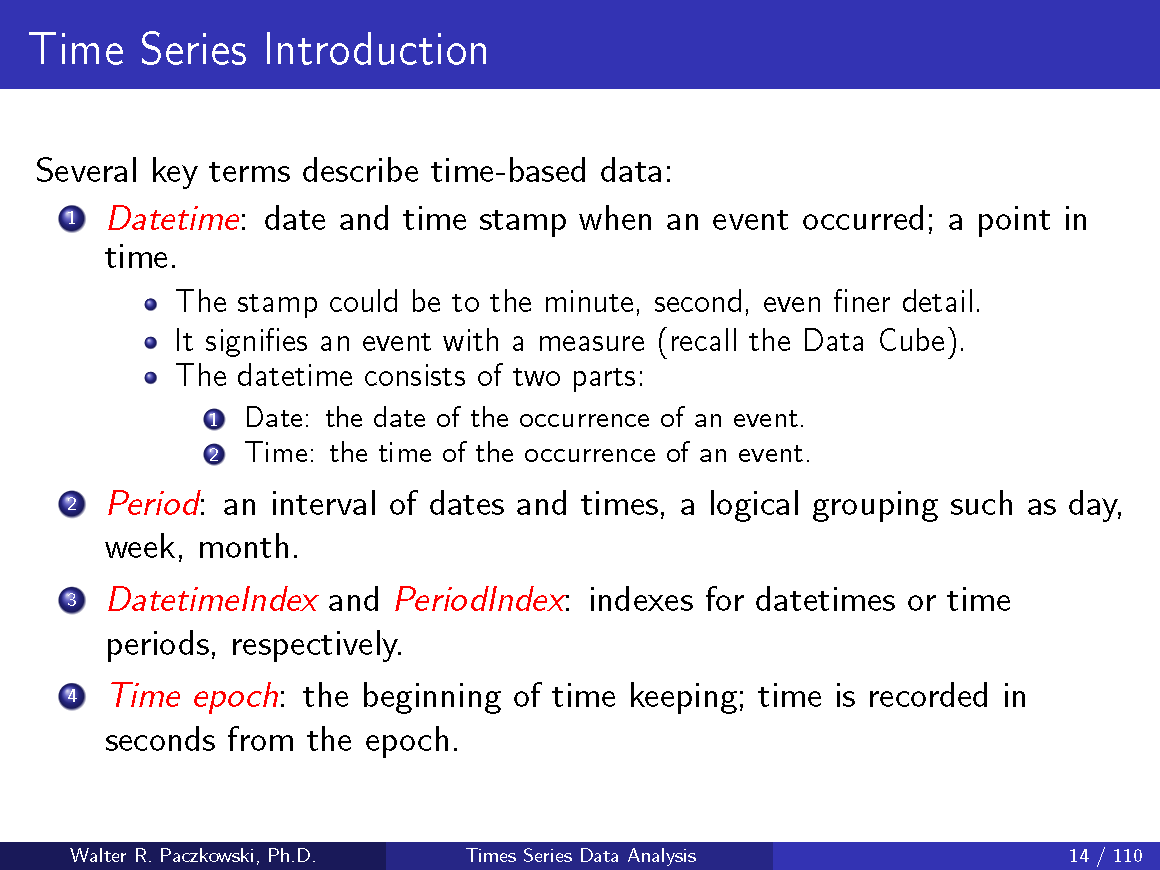

In [7]:
slide( '014' )

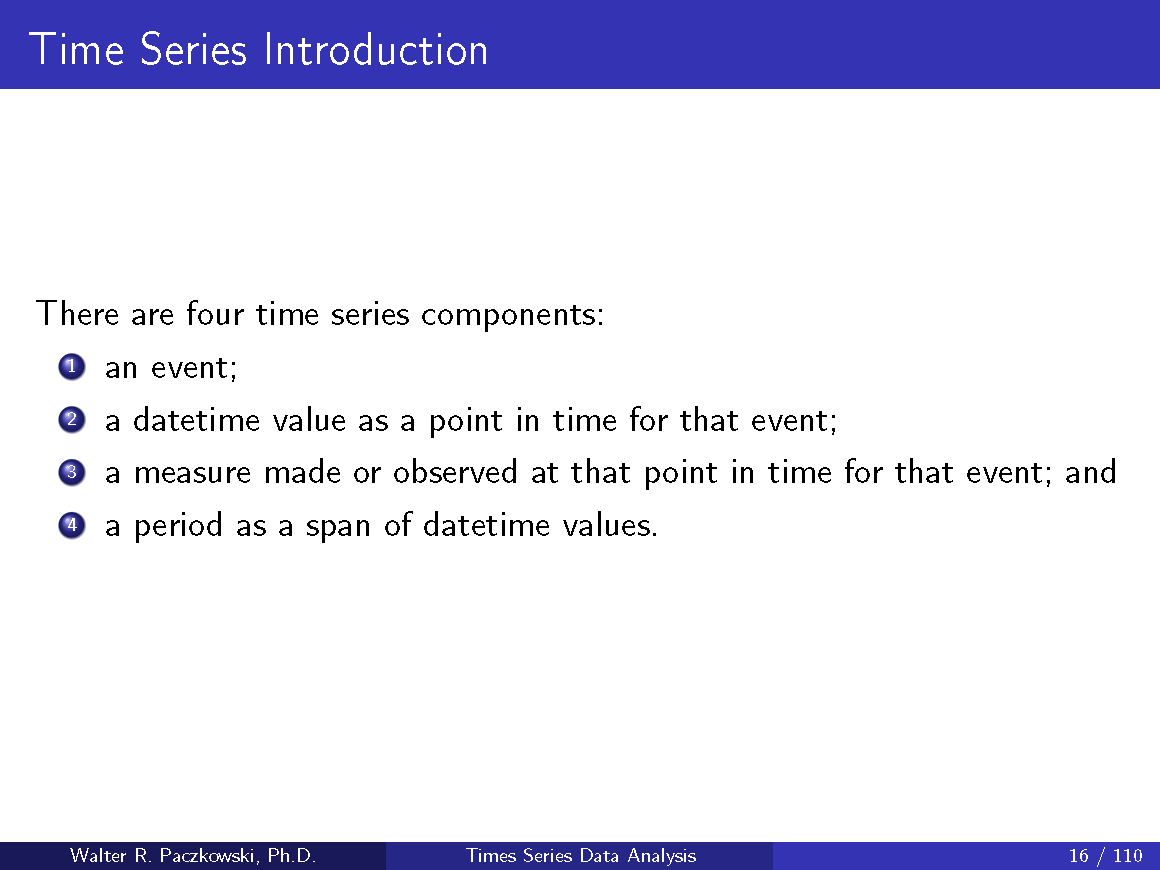

In [8]:
slide( '016' )

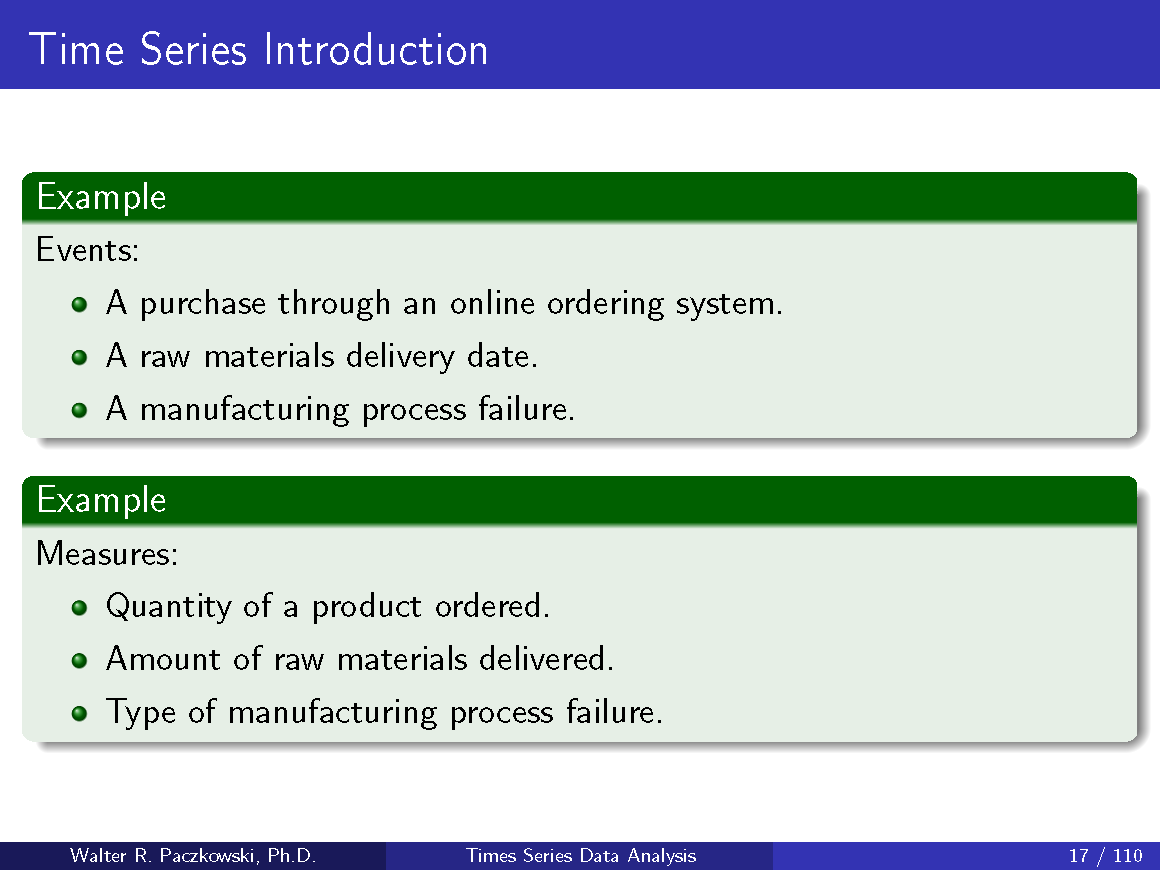

In [9]:
slide( '017' )

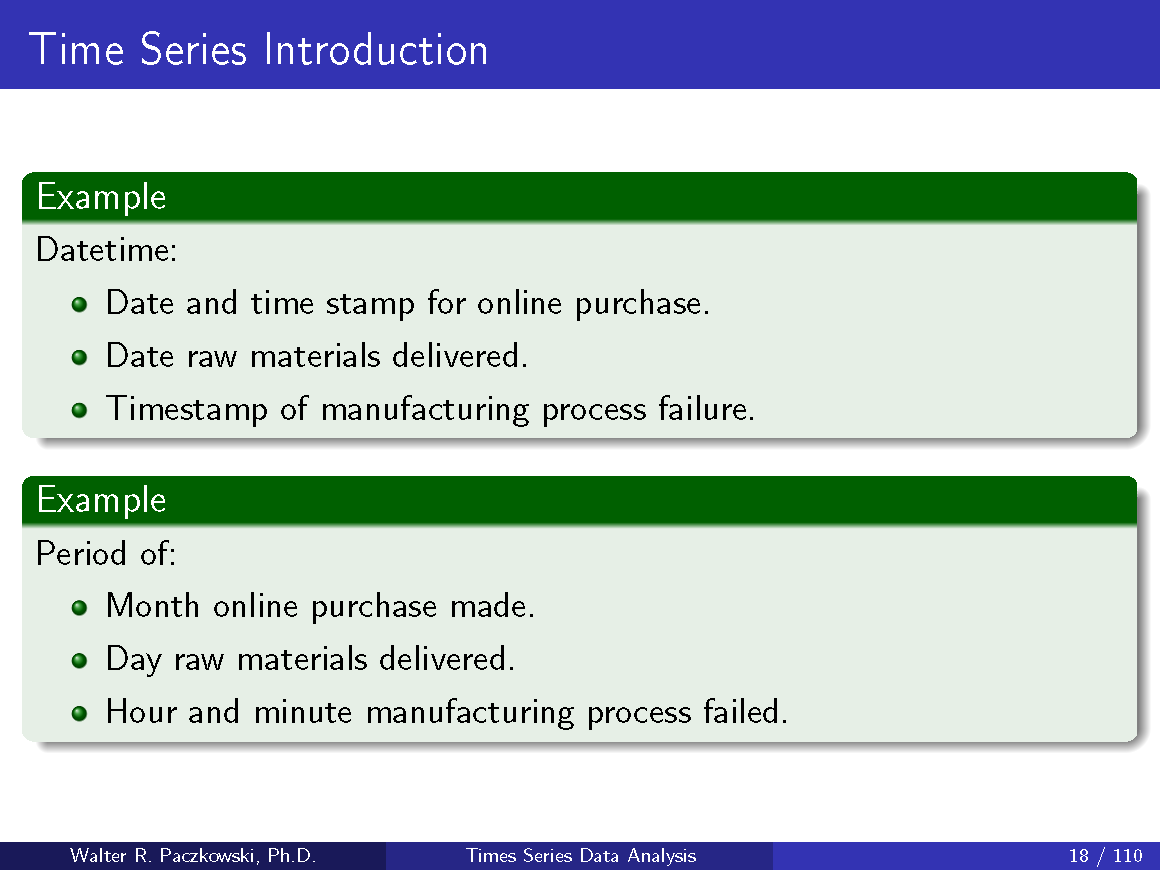

In [10]:
slide( '018' )

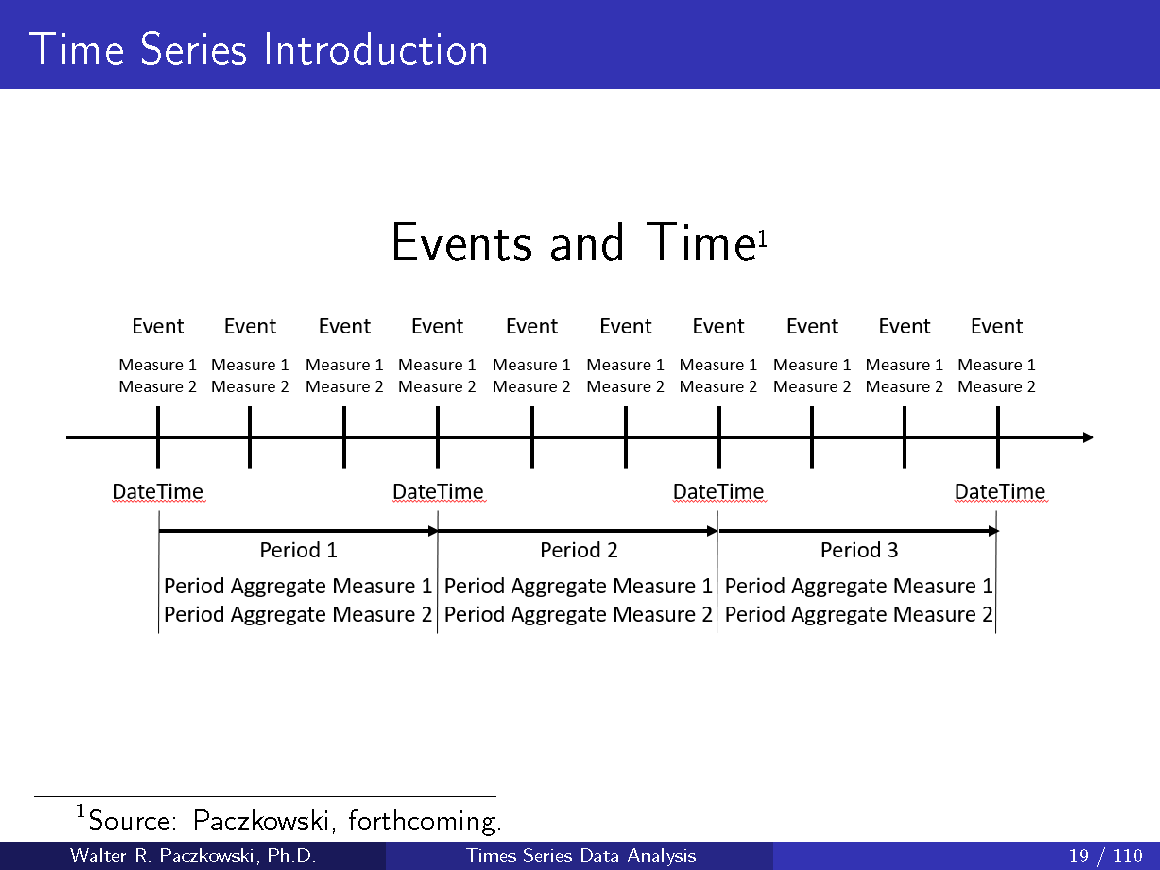

In [11]:
slide( '019' )

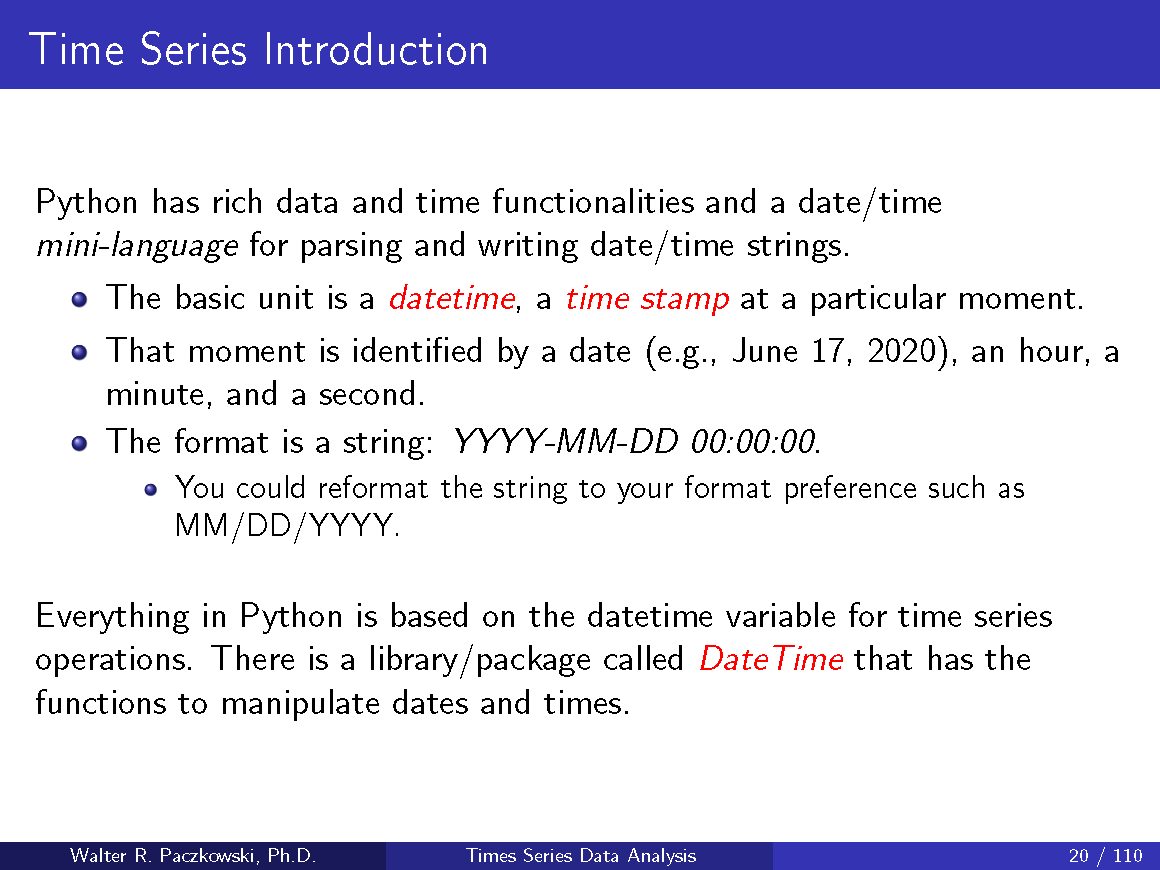

In [12]:
slide( '020' )

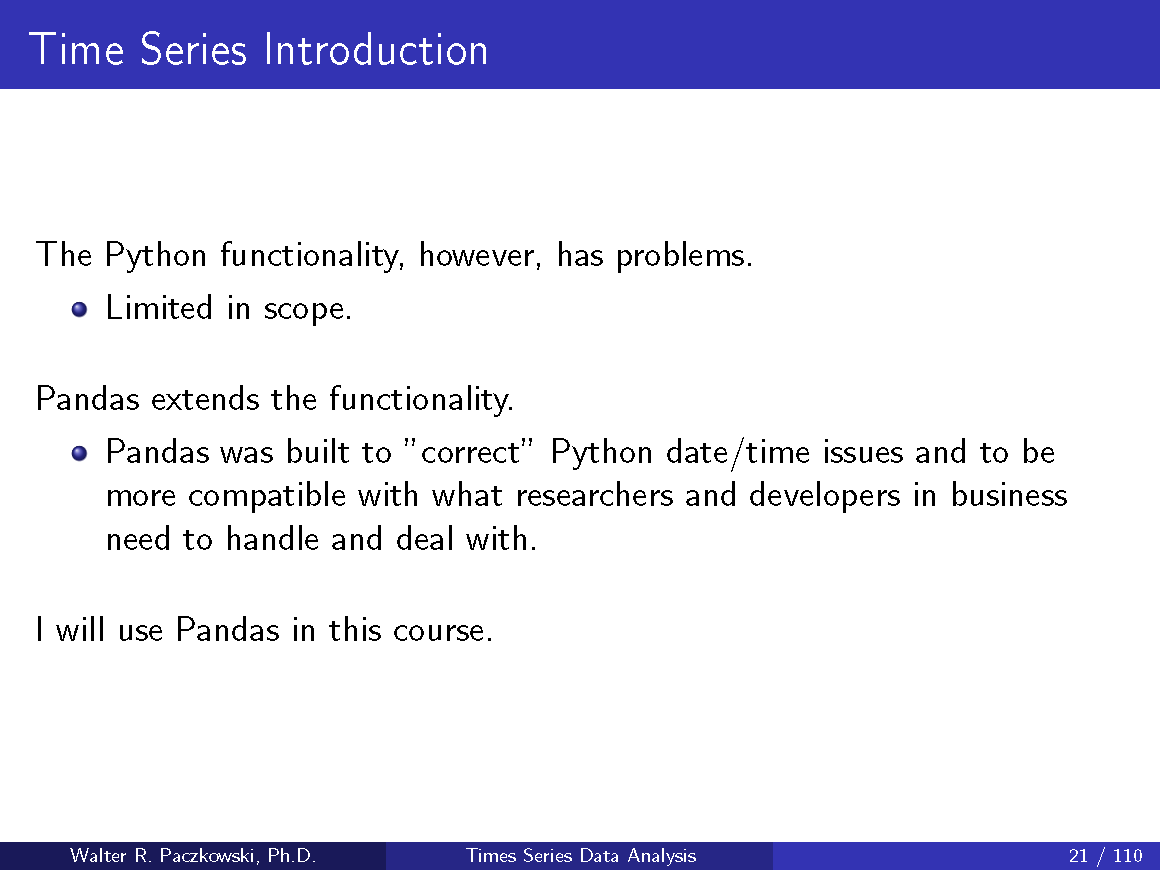

In [13]:
slide( '021' )

<div class="alert alert-warning" role="alert">
    <center><h1><strong><font color = black>Five Minute Break</font></center></h1></strong>
</div>

<div class="alert alert-info" role="alert">
    
<font color = black>Lesson II: Highlights of Pandas Time Functionality
--------------------------------------

[Back to Contents](#Contents)    
    
</div>
    
Pandas expands on the basic Python date/time functionality because it was originally designed to work with time series data.  Many of the underlying concepts and functionalities are the same, yet there are significant additional functionalities.

In this lesson, I will review Pandas date and time functionalities:

>1. datetime variable;
>2. data and time mini-language for parsing and writing data and time strings;
>3. DatetimeIndex and PeriodIndex
>4. querying DataFrames using a DatetimeIndex and PeriodIndex; and
>5. aggregating a DataFrame.

[Back to Contents](#Contents)

## How Pandas Deals with Time

[Back to Contents](#Contents)

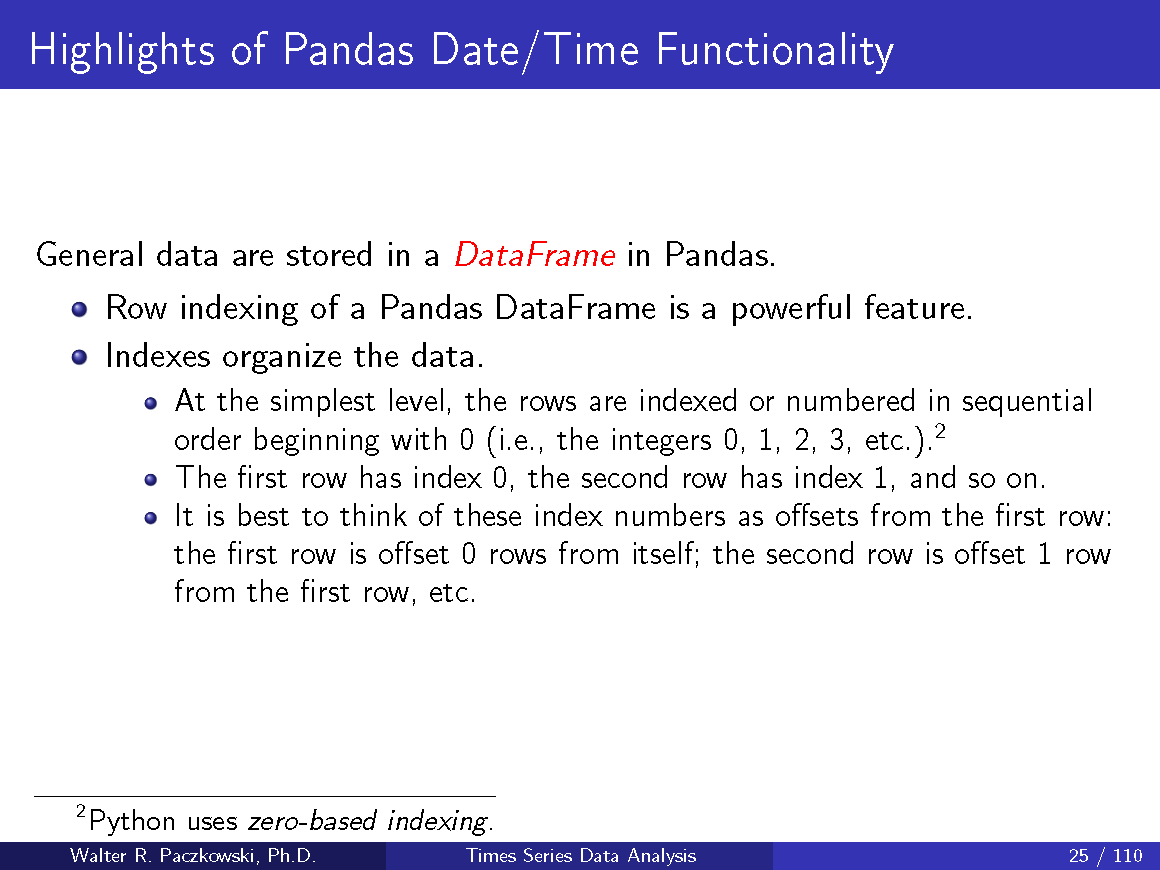

In [14]:
slide( '025' )

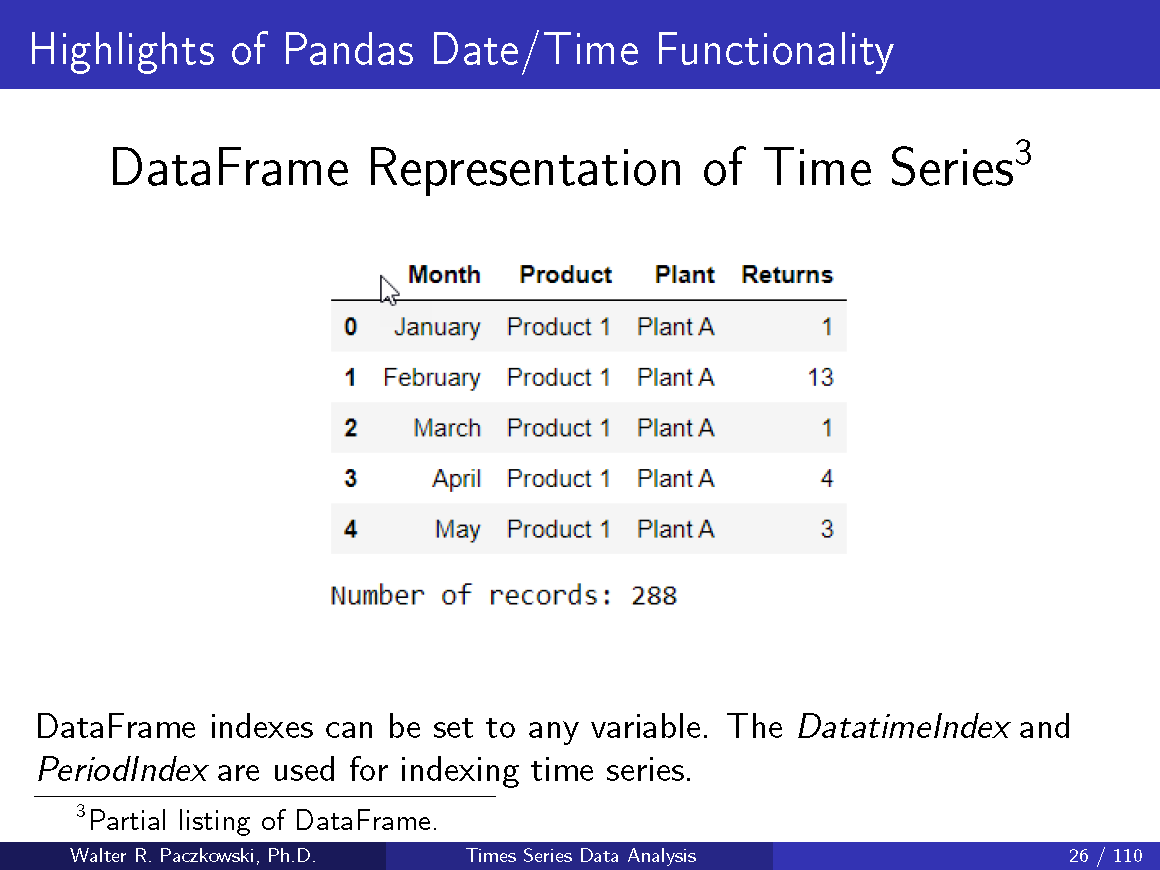

In [15]:
slide( '026' )

## Date Epoch

[Back to Contents](#Contents)

Pandas date/time functionality is based on the Unix epoch.

Use *to_datetime* function to create a *datetime* variable that has all the date and time information.  This is based on the Unix epoch.

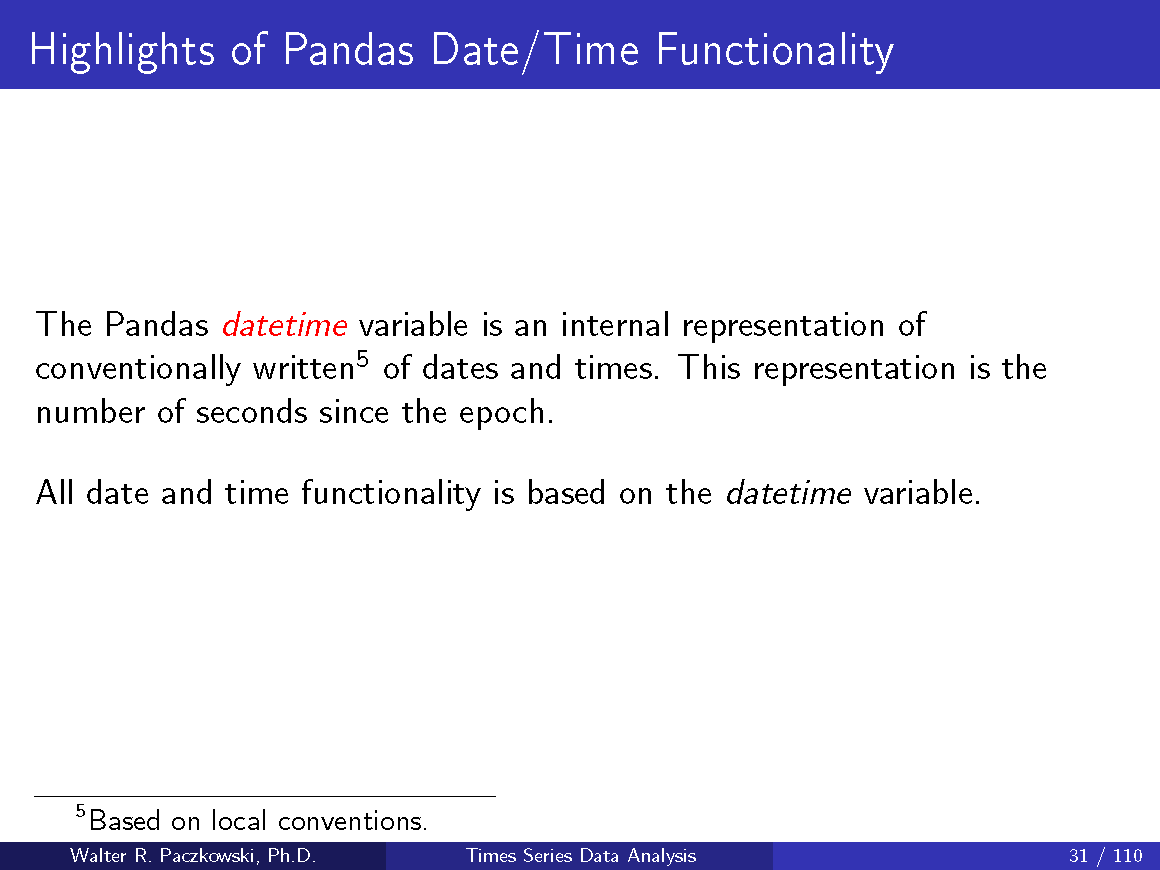

In [16]:
slide( '031' )

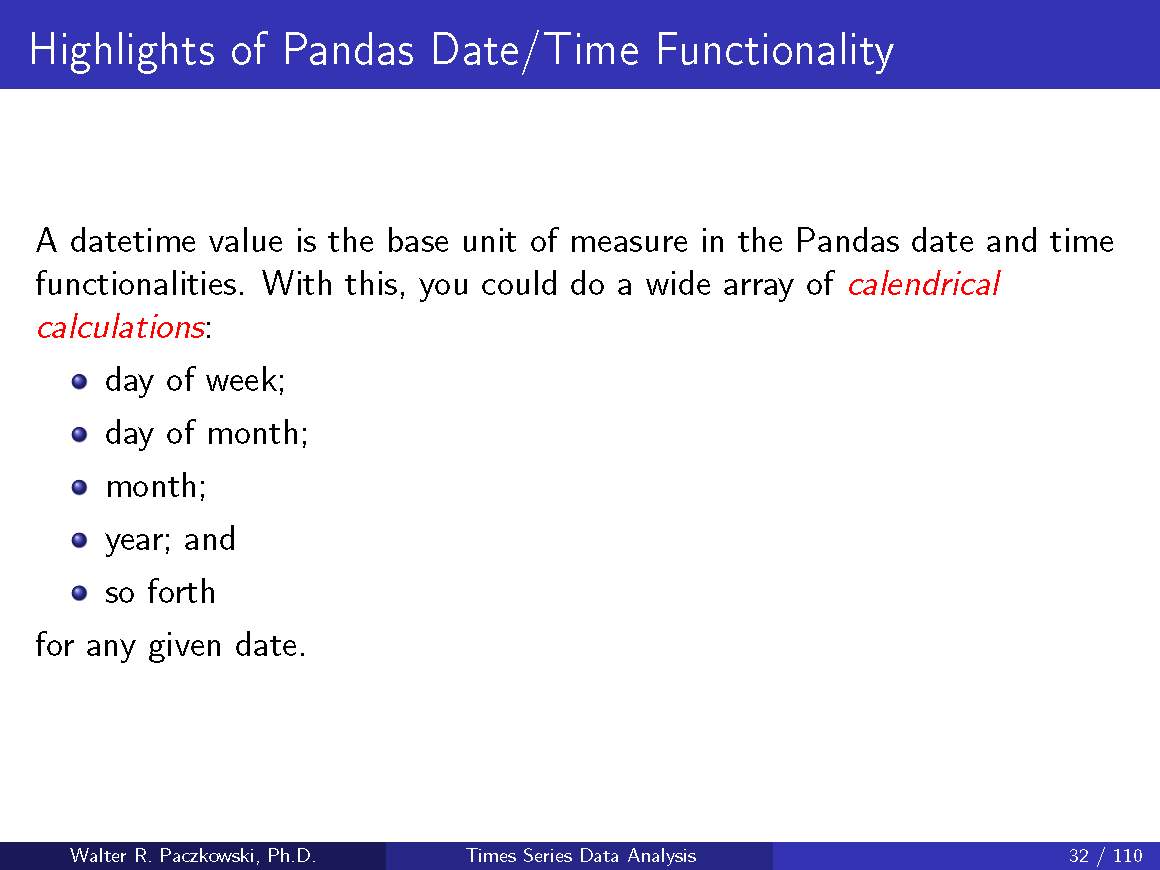

In [17]:
slide( '032' )

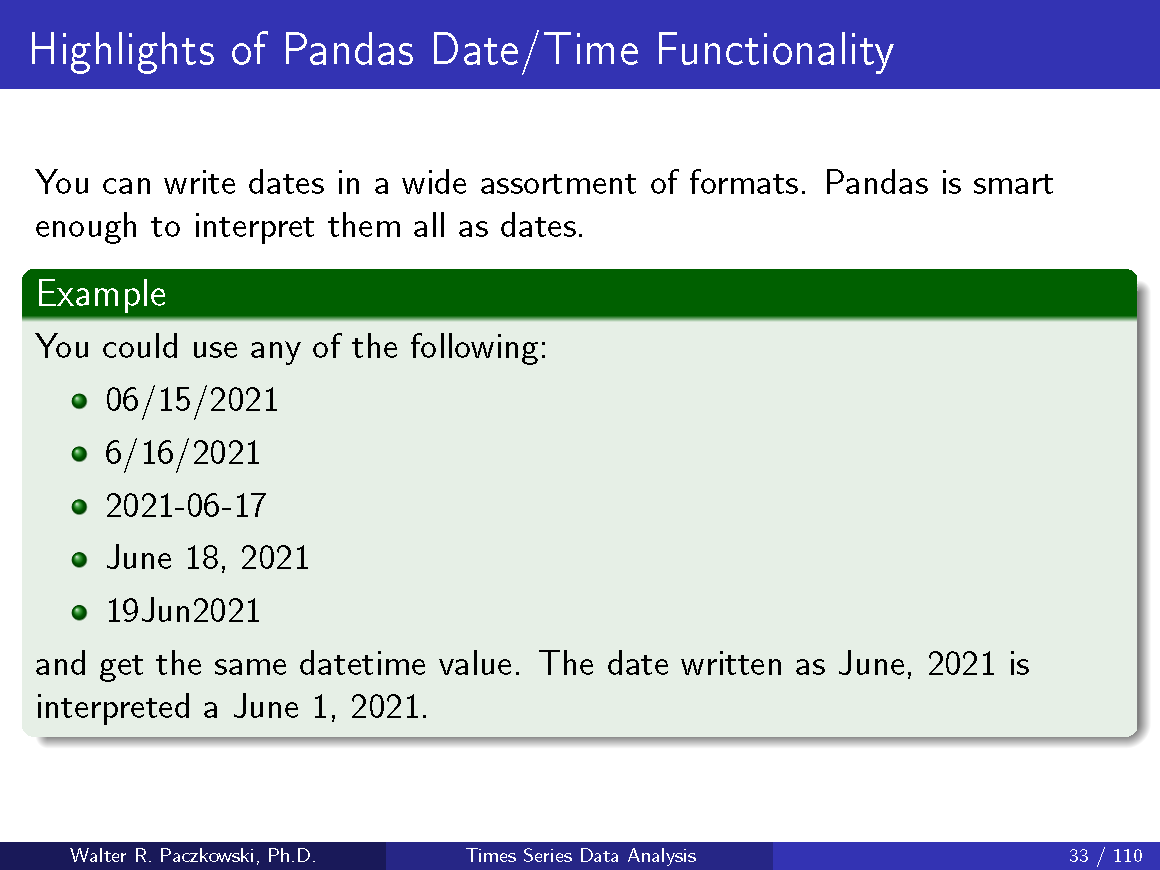

In [18]:
slide( '033' )

In [19]:
##
## Get datetime on 1/1/1970 and one day later on 1/2/1970
##
x = pd.to_datetime( pd.Series( [ "1970-01-01", "1970-01-02" ] ) )   
z = datetime_to_epoch( x )  
##
## Calculate number of seconds in one day
## 
seconds = 60   ## in a minute
minutes = 60   ## in an hour
hours = 24     ## in a day
##
one_day_sec = minutes*seconds*hours
##
## Pandas epoch: 01/01/1970
##
boldprt( 'Datetime value at Pandas Epoch:\n\t', f'{z[ 0 ]}' )
boldprt( 'Datetime value 1 day later:\n\t', f'{z[ 1 ]} seconds')
boldprt( 'One day is calculated as:\n\t', f'{one_day_sec} seconds' )


Datetime value at Pandas Epoch:
	0
Datetime value 1 day later:
	86400 seconds
One day is calculated as:
	86400 seconds


## Pandas datetime Variable Operations

[Back to Contents](#Contents)

Pandas's date/time functionality heavily relies on a *datetime* variable.  This is a variable that has the date and time intelligence "built-in" which allows you great computational flexibility.  A *datetime* variable is either a Pandas Series or part of a DataFrame.  Or it could be the basis for a *DatetimeIndex* which is a very important concept and tool. 

### Assemble datetime Variable From Individual Components

[Back to Contents](#Contents)

In [20]:
##
## Create a dictionary of dates and then create a DataFrame from the dictionary
##
data = { 'what': [ 'a', 'b' ], 'year': [ 2020, 2021 ], 'month': [ 12, 1 ], 'day': [ 4, 5 ] } 
df_ex_01 = pd.DataFrame( data )
display( df_ex_01.style.set_caption( 'DataFrame Without datetime Variable').set_table_styles( tbl_styles ).\
    hide_index() )
##
## Define columns to use for a datetime variable
## Use date/time mini-language
##
cols = [ 'month', 'day', 'year' ]
df_ex_01[ 'date' ] = pd.to_datetime( df_ex_01[ cols ], format = '%m/%d/$Y' )
display( df_ex_01.style.set_caption( 'DataFrame With datetime Variable').set_table_styles( tbl_styles ).\
    hide_index() )
##
## Display DataFrame info
##
boldprt( 'DataFrame info' )
display( df_ex_01.info() )

DataFrame info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   what    2 non-null      object        
 1   year    2 non-null      int64         
 2   month   2 non-null      int64         
 3   day     2 non-null      int64         
 4   date    2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 208.0+ bytes


None

In [21]:
##
## Create a list of consecutive dates
## Note the different date formats
##
lst = [ '06/15/2020', '6/16/2020', '2020-06-17', 'June 18, 2020', '19Jun2020' ]
##
## Display formatted datetimes
##
boldprt( 'datetime Series' )
pd.to_datetime( pd.Series( lst ) )

datetime Series


0   2020-06-15
1   2020-06-16
2   2020-06-17
3   2020-06-18
4   2020-06-19
dtype: datetime64[ns]

**_Code Explanation_**

Pandas will intelligently interpret different date formats.  The *to_datetime* method takes a series as an argument and returns the *datetime* variable.

In [22]:
##
## Create a two-element list of values for a dictionary of one key
##
data = { 'x':[ '12/31/2020', 'January 4, 2021' ] }
df_dt = pd.DataFrame( data )
display( df_dt.style.set_caption( 'DataFrame Before datetime Variable' ).set_table_styles( tbl_styles ).\
    hide_index() )
##
boldprt( 'DataFrame Info' )
display( df_dt.info() )
##
## Convert variable to datetime series
##
df_dt.x = pd.to_datetime( df_dt.x )
display( df_dt.style.set_caption( 'DataFrame After datetime Variable' ).set_table_styles( tbl_styles ).\
    hide_index() )
boldprt( 'DataFrame Info' )
display( df_dt.info() )


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


None

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   x       2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


None

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.1

[Back to Contents](#Contents)

Create a Pandas datetime variable using this list of dates:

lst = [ '01/01/2021', '7/04/2021', '2021-09-03', 'October 31, 2021', '25Dec2021' ]

[See Solution](#Solution-II.1)



In [23]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Pandas DatetimeIndex and PeriodIndex

It is more convenient and more intuitive to set the DataFrame index to the *datetime* variable.  Since the data are time series, having each row indexed by the datetime variable has advantages.  When the datetime variable is used as the index, it becomes a *DatetimeIndex*.  Similarly for periods.

[Back to Contents](#Contents)

### DatetimeIndex

[Back to Contents](#Contents)

This is a partial list of frequency aliases.  See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for a complete list.

| Alias                  | Description                                     |
|------------------------|-------------------------------------------------|
| B                      | Business day                                    |
| D                      | Calendar day                                    |
| W                      | Weekly                                          |
| M                      | Month end                                       |
| BM                     | Business month end                              |
| MS                     | Month start                                     |
| BMS                    | Business month start                            |
| Q                      | Quarter end                                     |
| BQ                     | Business quarter end                            |
| QS                     | Quarter start                                   |
| BQS                    | Business quarter start                          |
| A, Y                   | Year end                                        |
| BA, BY                 | Business year end                               |
| AS, YS                 | Year start                                      |
| BAS, BYS               | Business year start                             |


When you use the *to_datetime* function on a list of dates, a *DatetimeIndex* is automatically produced.

In [24]:
##
## A single date is returned as a timestamp
##
date = '10/05/20'
idx = pd.to_datetime( date )
idx

Timestamp('2020-10-05 00:00:00')

In [25]:
##
## A list of dates is returned as a DatetimeIndex
##
lst = [ '10/05/20', '10/06/20', 'Oct. 7, 2020', 'October 08, 2020', '10-09-20']
idx = pd.to_datetime( lst )
idx

DatetimeIndex(['2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09'],
              dtype='datetime64[ns]', freq=None)

**_Interpretation_**

The *DatetimeIndex* is an array of *datetime* values.

In [26]:
##
## Create date list
##
lst = [ '10/05/20', '10/06/20', 'Oct. 7, 2020', 'October 08, 2020', '10-09-20', '11/4/20' ]
n = len( lst )
##
## Use a dictionary comprehension
##
data = { 'X': [ x for x in range( n ) ], 'date':lst }
##
df_ex_03 = pd.DataFrame( data )
##
## Create a datetime variable
##
df_ex_03[ 'Date' ] = pd.to_datetime( df_ex_03.date )
display( df_ex_03.style.set_caption( 'DataFrame with Date String and DatetimeIndex Variables' ).set_table_styles( tbl_styles ) )
df_ex_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   X       6 non-null      int64         
 1   date    6 non-null      object        
 2   Date    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 272.0+ bytes


In [27]:
##
## Set index to the DatetimeIndex variable
##
df_ex_03.set_index( df_ex_03.Date, inplace = True )
display( df_ex_03.style.set_caption( 'DataFrame with DatetimeIndex' ).\
    set_table_styles( tbl_styles ) )
display( df_ex_03.info() )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-10-05 to 2020-11-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   X       6 non-null      int64         
 1   date    6 non-null      object        
 2   Date    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 352.0+ bytes


None

### Date Range

[Back to Contents](#Contents)

You can create a range of dates.  A range is returned as a *DatetimeIndex* which can be used as the index to a DataFrame.  You need a frequency alias to specify the frequency type.

| Frequency Alias    | Description                             |
|--------------------|-----------------------------------------|
| B                  | Business day                            | 
| D                  | Calendar day                            |
| W                  | Weekly                                  |
| M                  | Month end                               |  
| Q                  | Quarter end                             |
| A or Y             | Year end                                |

See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) for a complete list of aliases.

The format for *date_range* is *date_range( start, end, periods, freq )* but you do not need all of these.  See the following examples.


In [28]:
##
## Create a DatetimeIndex using date_range
## Day frequency is the default
##
pd.date_range( start = '1/1/2021', periods = 8 )

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', freq='D')

In [29]:
##
## Create a DatetimeIndex using date_range
## Set month as the frequency
##
pd.date_range( start = '1/1/2021', periods = 8, freq = 'M' )

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
##
## Create a DatetimeIndex using date_range
## Set month as the frequency but specify an ending date
##
pd.date_range( start = '1/1/2021', end = '8/1/2021', freq = 'M' )
 

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31'],
              dtype='datetime64[ns]', freq='M')

**_Interpretation_**

Notice the ending date -- it is one month before the specified end-date.  So, *date_range* creates a half-open interval of dates: [start, end).

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.2

[Back to Contents](#Contents)

Create a Pandas date range starting with January 1, 2021 for 5 weeks.

[See Solution](#Solution-II.2)


In [31]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


### Queries with DatetimeIndex

[Back to Contents](#Contents)

You can now query the data based on the *DatetimeIndex*.

In [32]:
##
## Query a specific date
##
display( df_ex_03.query( "index == '2020-11-04'" ).style.set_caption( 'Query Specific Date: Date Format 1' ).\
    set_table_styles( tbl_styles ) )
##
display( df_ex_03.query( "index == 'November 4, 2020'" ).style.set_caption( 'Query Specific Date: Date Format 2' ).\
    set_table_styles( tbl_styles ) )

In [33]:
##
## Query a range of dates
##
display( df_ex_03.query( "index >= '2020-10-09'" ).style.set_caption( 'Query a Range of Dates' ).\
    set_table_styles( tbl_styles ) )

In [34]:
##
## Query a specific period
##
display( df_ex_03.query( "index.dt.month == 10" ).\
    style.set_caption( 'Query Specific Period: Period Format 1' ).\
    set_table_styles( tbl_styles ) )
##
display( df_ex_03.query( "index.dt.month_name() == 'October'" ).\
    style.set_caption( 'Query Specific Period: Period Format 2' ).\
    set_table_styles( tbl_styles ) )

**_Code Explanation_**

The method *dt* is an *accessor* that enables you to access date information.  This will be explained below.

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.3

[Back to Contents](#Contents)

Create a DataFrame with a variable *X* that has five (5) values: 1, 2, 3, 4, 5.  Use a dictionary for this. Call the DataFrame *df_exercise*.  Then add a new variable, call it *days*, as a DatetimeIndex for five consequtive days beginning with January 4, 2021.  Use the character string shown for the date.  Convert this DateTimeIndex variable to the DataFrame index.  Display the final DataFrame.

[See Solution](#Solution-II.3)

In [35]:
##
## Enter code here
##


### Exercise II.4

[Back to Contents](#Contents)

Query the DataFrame from Exercise II.3 for January 6, 2021.  Use this string representation for the day.

[See Solution](#Solution-II.4)

In [36]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


### PeriodIndex

[Back to Contents](#Contents)

A *PeriodIndex* is like a *DatatimeIndex* but for periods.  A *period* is a span of time: day, month, quarter.  A *DateTimeIndex* is a specific instant in time, but this is sometimes fuzzy.  The values in a PeriodIndex are ordinal indicating regular periods in time.  The index is immutable.

Here is a list of attributes to specify a period.  See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.PeriodIndex.html) for more detail.

| Attribute                 | Description                                           |
|---------------------------|-------------------------------------------------------|
| day                       | The days of the period                                |
| dayofweek                 | The day of the week with Monday=0, Sunday=6           |
| dayofyear                 | The ordinal day of the year                           |
| days_in_month             | The number of days in the month                       |
| daysinmonth               | The number of days in the month                       |
| hour                      | The hour of the period                                |
| is_leap_year              | Logical indicating if the date belongs to a leap year |
| minute                    | The minute of the period                              |
| month                     | The month as January = 1, December = 12               |
| quarter                   | The quarter of the date                               |
| second                    | The second of the period                              |
| week                      | The week ordinal of the year                          |
| weekday                   | The day of the week with Monday = 0, Sunday = 6       |
| weekofyear                | The week ordinal of the year                          |
| year                      | The year of the period                                |

In [37]:
##
## Create a PeriodIndex
##
idx = pd.PeriodIndex( year = [ 2000, 2002 ], quarter = [ 1, 3 ] )
idx

PeriodIndex(['2000Q1', '2002Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Range

[Back to Contents](#Contents)

You can create a PeriodIndex using *period_range*. This requires: start, end, periods, and freq. Of these three parameters: start, end, and periods, exactly two must be specified. By default the freq is taken from start or end if those are Period objects. Otherwise, the default is "D" for daily frequency.

In [38]:
##
## Create a range of periods
##
pd.period_range( '2015-07', periods = 8, freq = 'M' )

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

You can convert a *DatetimeIndex* to a *PeriodIndex* with *to_period*.

In [39]:
##
## Create DataFrame with DatetimeIndex
##
df_ex_04 = pd.DataFrame( { 'X': [ 1, 2, 3, 4 ]},
                  index = pd.to_datetime( [ '01/01/2021', '02/02/2021', '03/01/2021', '04/05/2021' ] ) )
display( df_ex_04.style.set_caption( 'Using DatetimeIndex' ).\
    set_table_styles( tbl_styles ) )
boldprt( 'DataFrame Info' )
df_ex_04.info()
##
## Convert DatetimeIndex to PeriodIndex
##
df_ex_04.index = df_ex_04.index.to_period( "M" )
display( df_ex_04.style.set_caption( 'Using PeriodIndex' ).\
    set_table_styles( tbl_styles ) )
boldprt( 'DataFrame Info' )
df_ex_04.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-01 to 2021-04-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       4 non-null      int64
dtypes: int64(1)
memory usage: 224.0 bytes


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 4 entries, 2021-01 to 2021-04
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       4 non-null      int64
dtypes: int64(1)
memory usage: 224.0 bytes


In [40]:
##
## Query a specific month
##
display( df_ex_04.query( "index.dt.month == 3" ).\
    style.set_caption( 'Query Specific Month' ).\
    set_table_styles( tbl_styles ) )

**_Interpretation_**

You can query a *PeriodIndex* the same way as you would query a *DatetimeIndex*.

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.5

[Back to Contents](#Contents)

Create a PeriodIndex for five consecutive calendar quarters beginning with 1Q2021.  Use the character string '1Q2021' for the date.

[See Solution](#Solution-II.5)

In [41]:
##
## Enter code here
##


### Exercise II.6

[Back to Contents](#Contents)

Create a DataFrame named *df_exercise* using the dictionary: { 'week':pd.date_range( start = '1/1/2021', end = '3/31/2021', freq = 'W') }.  Add a variable *X* that is the row index number (i.e., 0, 1, ...).  Set the DataFrame index to *date* and make it monthly periods.  HINT: use to_period.

[See Solution](#Solution-II.6)

In [42]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Calendrical Operations

[Back to Contents](#Contents)

You can do many calendrical calculations using the *datetime* variable.

### Shifting or Lagging a Time Series

[Back to Contents](#Contents)

In [43]:
##
## Create a custom date parser using strptime and the mini-language
## Use the mini-language because the date in the file is of the form 2021M01
##    which is January, 2021.
##
custom_date_parser = lambda x: datetime.strptime( x, "%YM%m" )
##
## Import autos production data and use custom date parser
##
file = 'autos.csv'
cols = [ 'date', 'autos' ]
##
df_autos = pd.read_csv( path + file, header = 0, names = cols, \
                       parse_dates = [ 'date' ], date_parser = custom_date_parser )
df_autos.set_index( 'date', inplace = True )
##
## Set index to period M
##
df_autos.index = df_autos.index.to_period( "M" )
df_autos.head().style.set_caption( 'Auto Production Data' ).set_table_styles( tbl_styles )


In [44]:
##
## Shift (i.e., lag) one period
## Default: periods = 1
##
df_autos[ 'lag_autos_1' ] = df_autos.autos.shift( periods = 1 )
cols = [ 'autos', 'lag_autos_1' ]
df_autos[ cols ].head( ).style.set_caption( 'One Period Lag' ).set_table_styles( tbl_styles ) 

**_Interpretation_**

Notice the *nan* which is *NaN*.  This is due to the one period shift or lag.

### Differences of a Time Series

[Back to Contents](#Contents)

In [45]:
##
## Difference, one and two periods (first and second difference)
## Default: periods = 1
##
df_autos[ 'diff_autos_1' ] = df_autos.autos.diff( periods = 1 )
df_autos[ 'diff_autos_2' ] = df_autos.autos.diff( periods = 2 )
cols = [ 'autos', 'lag_autos_1', 'diff_autos_1', 'diff_autos_2'  ]
df_autos[ cols ].head().style.set_caption( 'First and Second Difference' ).set_table_styles( tbl_styles ) 

### Percent Change of a Time Series

[Back to Contents](#Contents)

In [46]:
##
## Month-month Percent change, one and two periods
## Default: periods = 1
##
df_autos[ 'pctchg_autos_1' ] = df_autos.autos.pct_change( periods = 1 )
##
df_autos[ 'pctchg_autos_2' ] = df_autos.autos.pct_change( periods = 2 )
##
cols = [ 'autos', 'lag_autos_1', 'diff_autos_1', 'diff_autos_2', 'pctchg_autos_1', 'pctchg_autos_2' ]
df_autos[ cols ].head().style.set_caption( 'One and Two Period Percent Change' ).set_table_styles( tbl_styles ) 

### Annualized Percent Change of a Time Series

[Back to Contents](#Contents)

We frequently express sub-annual percent changes on an annual basis.  For example, the *CPI* is calculated monthly and reported as month-to-month percent change and percent change at an annual rate.  The annual rate is the rate of change *as if* the one month change continued for 12 months (i.e., one year).  The annual rate is based on compounding the monthly rate and is <u>not</u> the monthly rate times 12.  The compounding formula using monthly data as an example is:

\begin{eqnarray*}
    annualRate = ( 1 + monthlyRate )^{12} - 1
\end{eqnarray*}

The *annualRate* is multiplied by 100 to get a percent rate of change.  A function, *annual_rate( )*, is defined in the function section of *Best Practices*.

For background on the calculation, see [here](https://stackoverflow.com/questions/41293677/annualized-return-in-pandas) and [here](https://v8doc.sas.com/sashtml/ets/chap2/sect48.htm)

In [47]:
##
## Make annual rate
##
data = { 'cpi': [ 258.723, 259.681, 260.209 ] }
idx = pd.date_range( start = '08/01/2020', periods = 3, freq = 'M' )
##
df_cpi = pd.DataFrame( data = data, index = idx )
df_cpi.index = df_cpi.index.to_period( "M" )
##
df_cpi[ 'pctchg_cpi'] = df_cpi.cpi.pct_change( periods = 1 )
display( df_cpi.style.set_caption( 'Monthly CPI and Monthly Percent Change' ).\
        set_table_styles( tbl_styles )  )
##
## Use function in function define section in Best Practices
##
x = annual_rate( df = df_cpi, series = 'cpi', freq = 'M' )
df_cpi[ 'annual_rate' ] = x
display( df_cpi.style.set_caption( 'Monthly CPI and Annualized Growth' ).\
        set_table_styles( tbl_styles ) )

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.7

[Back to Contents](#Contents)

Import the ice cream shipments data which are in the the *CSV* file named *iceCream.csv*.  Create a DataFrame named *df_iceCream*.  Convert the *date* variable to a *DatetimeIndex* and then set the DataFrame's index to this *date* variable.  Convert the index to a *periodIndex* using *to_period*.

[See Solution](#Solution-II.7)

In [48]:
##
## Enter code here
##


### Exercise II.8

[Back to Contents](#Contents)

Create a new variable *lag_shipments* as a one period lag of the ice cream shipments data.  Display the DataFrame head to verify the lag. 

[See Solution](#Solution-II.8)

In [49]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


<div class="alert alert-warning" role="alert">
    <center><h1><strong><font color = black>Five Minute Break</font></center></h1></strong>
</div>

<div class="alert alert-info" role="alert">
    
<font color = black>Lesson III: Digging Into Time Series Data with Pandas
--------------------------------------

[Back to Contents](#Contents)    
    
</div>
In this lesson, I will discuss:

>1. how to extract date/time information from a DatetimeIndex; and
>2. convert from high to low frequency data.

[Back to Contents](#Contents)

## Accessor Functions: Extracting Specific Periods

[Back to Contents](#Contents)

The *dt* accessor was actually used several times before.  Here is some detail on its use.

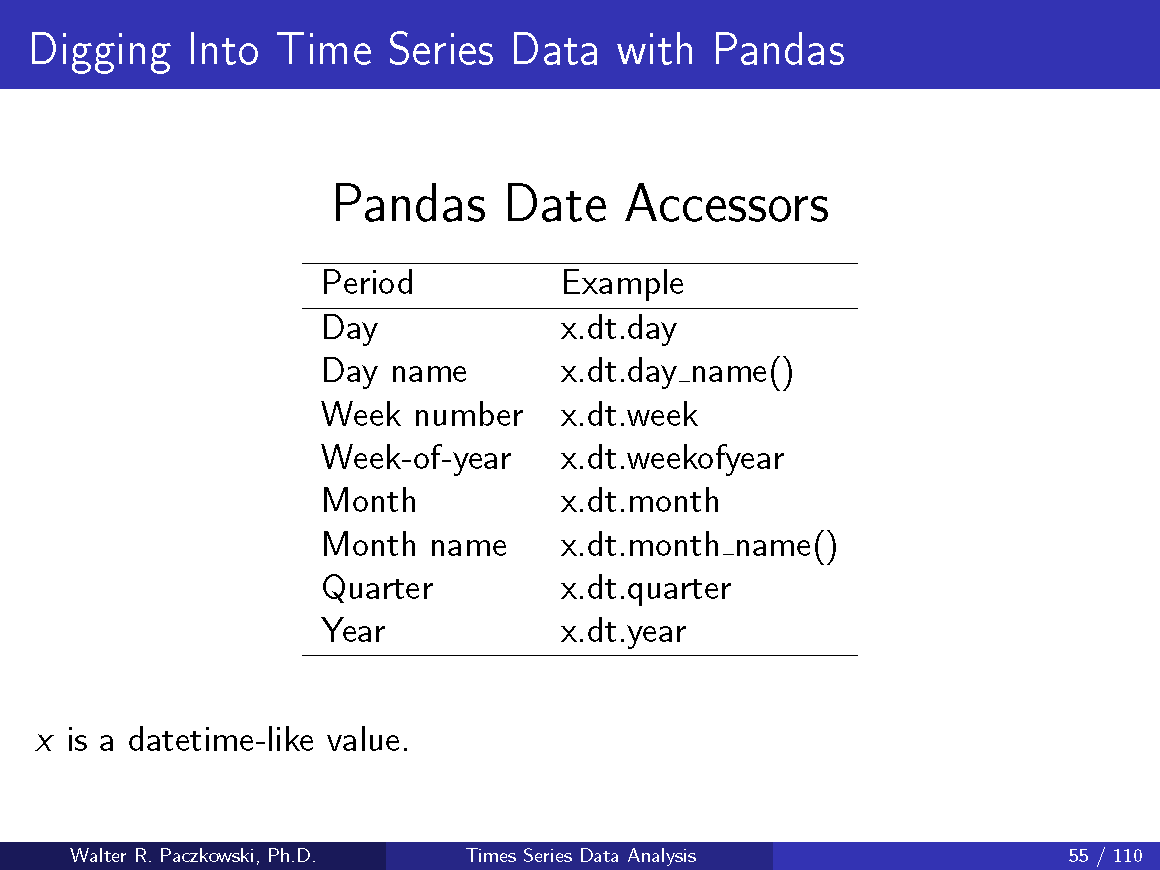

In [50]:
slide( '055' )

In [51]:
##
## Check data type of variable date
##
df_ex_01.dtypes

what             object
year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

**_Interpretation_**

The *date* variable is a *datetime* data type.

In [52]:
##
## Access periods
##
boldprt( 'The years are:',  )
print( df_ex_01.date.dt.year )
##
boldprt( '\nThe months are:' )
print( df_ex_01.date.dt.month )
##
boldprt( '\nThe days are:' )
print( df_ex_01.date.dt.day )

The years are:
0    2020
1    2021
Name: date, dtype: int64

The months are:
0    12
1     1
Name: date, dtype: int64

The days are:
0    4
1    5
Name: date, dtype: int64


Extract or get more detail, such as week of year, day of week, and leap year using the *dt* accessor. 

You can get the name of the day of the week or the name of the month of the year.  The days of the week are mapped as:

>0. Monday 
>1. Tuesday 
>2. Wednesday 
>3. Thursday 
>4. Friday
>5. Saturday 
>6. Sunday




In [53]:
##
## More examples
##
boldprt( 'Week of Year' )
print( df_ex_01.date.dt.week )
##
boldprt( '\nDay of Week' )
print( df_ex_01.date.dt.dayofweek )
##
boldprt( '\nCheck if Leap Year' )
print( df_ex_01.date.dt.is_leap_year )
##
boldprt( '\nMonth Name' )
print( df_ex_01.date.dt.month_name() )

Week of Year
0    49
1     1
Name: date, dtype: int64

Day of Week
0    4
1    1
Name: date, dtype: int64

Check if Leap Year
0     True
1    False
Name: date, dtype: bool

Month Name
0    December
1     January
Name: date, dtype: object


You can access date/time information directly from a DatetimeIndex without using the *dt* accessor.

In [54]:
##
## Set index to datetime variable
##
df_ex_01.set_index( 'date', inplace = True )
df_ex_01.head()

what  year  month  day
date                             
2020-12-04    a  2020     12    4
2021-01-05    b  2021      1    5

In [55]:
##
## Check index using info()
##
df_ex_01.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-12-04 to 2021-01-05
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   what    2 non-null      object
 1   year    2 non-null      int64 
 2   month   2 non-null      int64 
 3   day     2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 80.0+ bytes


**_Interpretation_**

The index is a *DatetimeIndex*

In [56]:
##
## Extract week from the index
##
df_ex_01[ 'week' ] = df_ex_01.index.week
df_ex_01

what  year  month  day  week
date                                   
2020-12-04    a  2020     12    4    49
2021-01-05    b  2021      1    5     1

**_Interpretation_**

Using *dt* with the *DatetimeIndex* produces an error message. 

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise III.1

[Back to Contents](#Contents)

Import the ice cream data again as a new DataFrame named *df_ice*.  Convert the *date* variable to a *datetime variable*.  Use the accessor method, *dt*, to extract the year from the DataFrame's *date* variable.  Add this year data to the DataFrame as a new variable named *year*.

[See Solution](#Solution-III.1)

In [57]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Resampling to Change Time Series Frequencies

[Back to Contents](#Contents)

You can change a high frequency DataFrame to a lower frequency one by *resampling* the data.  For example, you can convert daily data (high frequency) to monthly data (lower frequency).  The *resample* method is described as a *convenience method* for frequency conversion of time series. Objects must have a datetime-like index (*DatetimeIndex*, *PeriodIndex*), or pass datetime-like values.
<br><br>
Resampling requires an aggregation of the data.  Specify the aggregation using a dictionary passed as an argument to the *agg( )* method.

In [58]:
##
## Create a DataFrame
##
data = dict( { 'price': [ 10, 11, 9, 13, 14, 18, 17, 19 ],
          'volume': [ 50, 60, 40, 100, 50, 100, 40, 50 ] } )
df_ex_05 = pd.DataFrame( data )
##
## Add date variable
##
df_ex_05[ 'week' ] = pd.date_range( '01/01/2020', periods = 8, freq = 'W' )
##
## Set index
##
df_ex_05.set_index( 'week', inplace = True )
##
boldprt( 'DataFrame Info Before to_period' )
display( df_ex_05.info() )
##
df_ex_05.index = df_ex_05.index.to_period( 'W' )
display( df_ex_05.head().style.set_caption( 'DataFrame of Weekly Data' ).set_table_styles( tbl_styles ) )
##
boldprt( 'DataFrame Info After to_period' )
display( df_ex_05.info() )
##
## Convert from weekly to month data
## Specify an aggregation dictionary
##
aggregation = { 'price':'mean', 'volume':'sum' }
df_ex_05_resmpl = df_ex_05.resample( 'M' ).agg( aggregation )
display( df_ex_05_resmpl.style.set_caption( 'DataFrame Resampled to Monthly Data' ).set_table_styles( tbl_styles )  )

DataFrame Info Before to_period
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-01-05 to 2020-02-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   8 non-null      int64
 1   volume  8 non-null      int64
dtypes: int64(2)
memory usage: 192.0 bytes


None

DataFrame Info After to_period
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 8 entries, 2019-12-30/2020-01-05 to 2020-02-17/2020-02-23
Freq: W-SUN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   8 non-null      int64
 1   volume  8 non-null      int64
dtypes: int64(2)
memory usage: 192.0 bytes


None

**_Interpretation_**

Notice how the weekly periods are denoted: *start-of-week/end-of-week*.

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise III.2

[Back to Contents](#Contents)

Using the ice cream DataFrame from Exerecise IV.1, *df_ice*, resample the monthly data to quarterly data.  For the shipments variable, aggregate to total quarter (i.e., sum the monthly data).

[See Solution](#Solution-III.2)

In [59]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Getting Decade Data

[Back to Contents](#Contents)

Sometimes it is good to know the decade in which events occur.  This is obviously for a long-term perspective, so your data series should span decades.

### Pinkham Data Example

[Back to Contents](#Contents)

This is an annual sales revenue (*sales*) and advertising expenditures (*advertising*) for the Lydia Pinkham Company from 1907 through 1960, expressed in thousands of dollars per year ($000).  The company's sole product was an alcohol-based elixir that was supposed to cure vaguely defined "ailments" (before the *FDA* and *FTC* limited the scope of their claims).  This data are used in many example studies.
<br><br>

| Variable                 | Values  | Source                                                                 | Mnemonic     |
|--------------------------|---------|------------------------------------------------------------------------|--------------|
| Advertising Expenditures | \$000   | Pankratz, A. (1991) Forecasting With Dynamic Regression Models, Wiley. | advertising  |
| Sales                    | \$000   | IBID.                                                                  | sales        |

In [60]:
##
## Import the data
##
file = 'pinkham.csv'
df_pink = pd.read_csv( path + file )
##
## Create and set DateTimeIndex
## The CSV file does not have a date column, just advertisement and sales; see the Data Dictionary above.
##
rng = pd.date_range( start = '01/01/1907', periods = 54, freq = 'A' )
df_pink.index = rng
df_pink.index = df_pink.index.to_period( 'A' )
##
## Display the Data
##
base = 'Base: All data'
display( df_pink.head().style.set_caption( 'Lydia Pinkham Data' ).set_table_styles( tbl_styles ) )
display( df_size( df_pink ) )

None

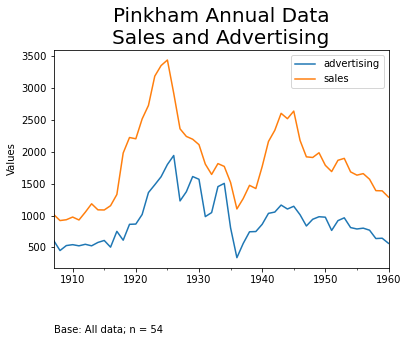

In [61]:
##
## Plot the Pinkham time series
##
base = 'Base: All data; n = ' + str( df_pink.shape[ 0 ] )
ax = df_pink.plot( )
ax.set_title( 'Pinkham Annual Data\nSales and Advertising', fontsize = font_title )
ax.set( ylabel = 'Values' )
footer( ax );

In [62]:
##
## Extract decades using the floor divide function "//"
##
df_pink[ 'decade' ] = ( df_pink.index.year//10 )*10
display( df_pink.head().style.set_caption( 'Pinkham Data with Decade' ).set_table_styles( tbl_styles ) ) 
##
## Aggregate sales and advertising by decade
##
aggregation = { 'advertising':'mean', 'sales':'mean' }
grp = df_pink.groupby( 'decade' )
size = grp.size()
df_pink_agg = grp.agg( aggregation )
df_pink_agg[ 'decade_years' ] = size
df_pink_agg.style.set_caption( 'Decade Aggregated Pinkham Data' ).set_table_styles( tbl_styles )

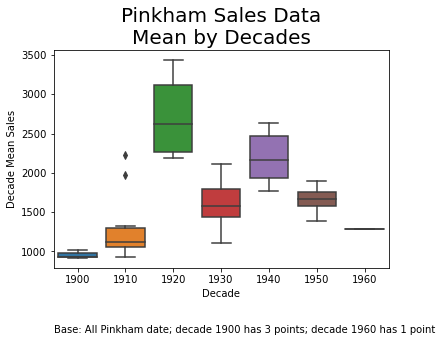

In [63]:
##
## Decade boxplots
##
base = 'Base: All Pinkham date; decade 1900 has 3 points; decade 1960 has 1 point'
ax = sns.boxplot( x = 'decade', y = 'sales', data = df_pink )
ax.set_title( 'Pinkham Sales Data\nMean by Decades', fontsize = font_title )
ax.set( xlabel = 'Decade', ylabel = 'Decade Mean Sales' )
footer( ax );

<div class="alert alert-warning" role="alert">
    <center><h1><strong><font color = black>Five Minute Break</font></center></h1></strong>
</div>

<div class="alert alert-info" role="alert">
    
<font color = black>Lesson IV: Time Series Structure and Analysis
--------------------------------------

[Back to Contents](#Contents)    
    
</div>

The first step in any data analytic process is to understand your data.
	
In this lesson, I will describe:

>1. the general time series structure.
>2. how to develop simple descriptive statistics of time series data; and
>3. illustrate how to visualize time series data.

[Back to Contents](#Contents)

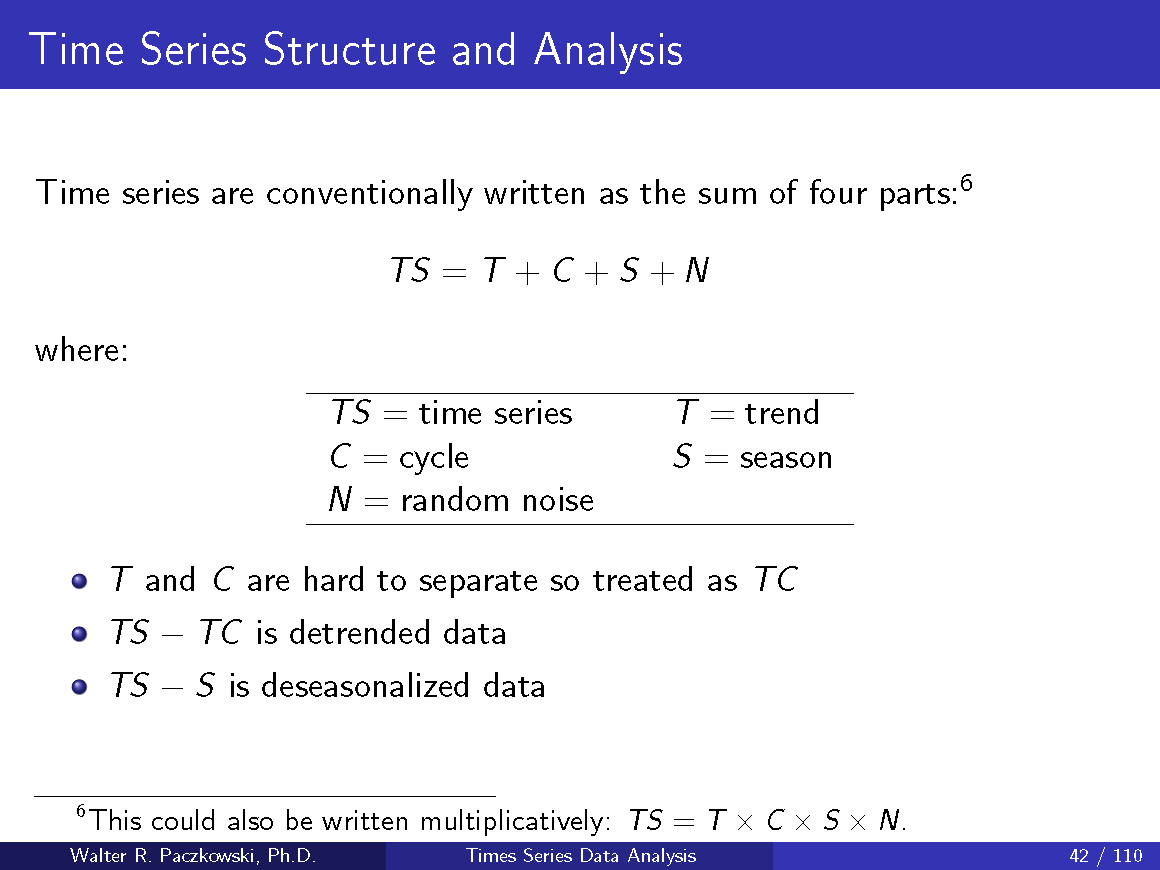

In [64]:
slide( '042' )

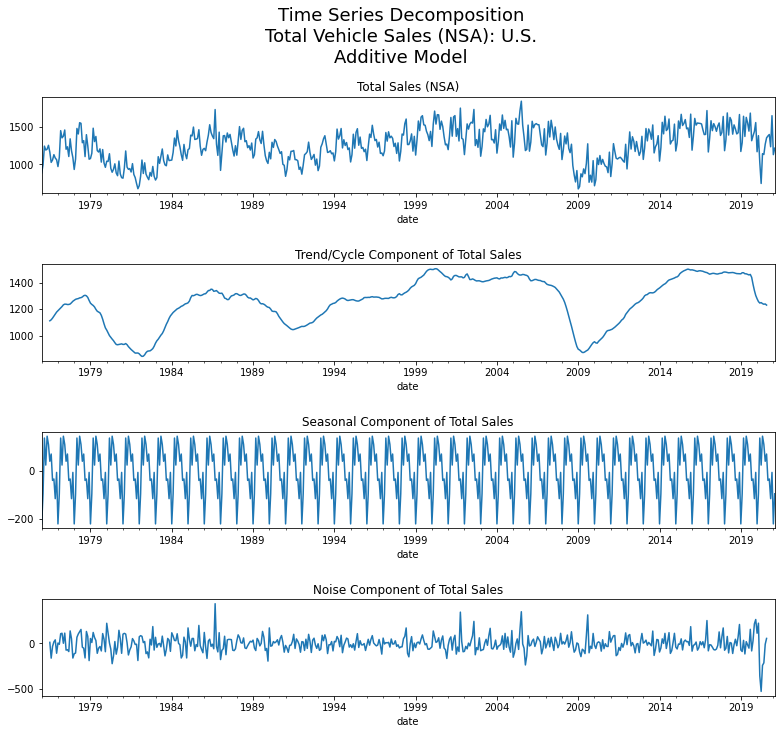

In [65]:
## Import total vehicle production data and set index
## Source: FRED: https://fred.stlouisfed.org/series/TOTALNSA
##
file = 'totalAutos.csv'
df_totalAutos = pd.read_csv( path + file, parse_dates = [ 'date' ] )
df_totalAutos.set_index( 'date', inplace = True )
##
## Decompose auto production data
##
series = df_totalAutos.sales
##
decomp = sm.tsa.seasonal_decompose( series )
fig, (ax1,ax2,ax3,ax4) = plt.subplots( 4, 1, figsize = ( 12, 10 ) )
fig.tight_layout( pad = 5.0 )
decomp.observed.plot( ax = ax1, title = 'Total Sales (NSA)')
decomp.trend.plot( ax = ax2, title = 'Trend/Cycle Component of Total Sales' )
decomp.seasonal.plot( ax = ax3, title = 'Seasonal Component of Total Sales' )
decomp.resid.plot( ax = ax4, title = 'Noise Component of Total Sales' )
plt.suptitle( 'Time Series Decomposition\nTotal Vehicle Sales (NSA): U.S.\nAdditive Model', fontsize = 18, y = 1.05 );

## Simple Statistics

[Back to Contents](#Contents)

The simplist stats are the descriptive stats from Stat 101.

In [66]:
##
## Reindex
##
df_totalAutos.head()
df_totalAutos.index = df_totalAutos.index.to_period( 'M' )
##
## Add month and year from the DatetimeIndex
##
df_totalAutos[ 'month' ] = df_totalAutos.index.month
df_totalAutos[ 'year' ] = df_totalAutos.index.year
##
df_totalAutos.head().style.set_caption( 'Total Autos Production Data' ).set_table_styles( tbl_styles )

In [67]:
##
## Get simple descriptive statistics
##
df_totalAutos.describe().T.style.set_caption( 'Simple Descriptive Statistics' ).set_table_styles( tbl_styles )

**_Interpretation_**

These statistics are over all the data.  What about mean monthly or mean annual statistics?

Do a regression of the data on month and year and then run a 2-way *ANOVA* with month and year to check for seasonality and trend.

>
> *Seasonality Hypotheses*
    >- $H_O$: No Seasonality
    >- $H_A$: Seasonality
>    
> *Tread Hypotheses*
    >- $H_O$: No Trend
    >- $H_A$: Trend
>

In [68]:
##
## Do regression to get ANOVA pieces
## This will be explained later
##
formula = 'sales ~ C(month) + C(year)'
mod = smf.ols( formula, data = df_totalAutos )
reg01 = mod.fit()
##
## Do ANOVA using regression output
## Highlight p-values
##
aov = anova_lm( reg01 )
aov.index = [ 'Seasonality', 'Trend', 'Irregularity' ]
subsets = pd.IndexSlice[ ( [ 'Seasonality', 'Trend' ] ), 'PR(>F)' ]
aov.style.set_caption( 'ANOVA for Seasonality and Trend' ).set_table_styles( tbl_styles ).\
    applymap( lambda x: "background-color: yellow", subset = subsets )

**_Code Explanation_**

The regression is run by first specifying a formula.  Month and Year are categorical with labels (e.g., Jan, Feb, etc.) so they must be dummified.  The *C( )* function does this.  The regression results are saved in the variable *reg01* which is then passed to the *anova_lm* function.  See the *Best Practices* section for the relevant functions.

**_Interpretation_**

The month and year factors both have p-values $<$ 0.05.  The two Null Hypotheses are rejected so there is evidence for seasonality and trend.

In [69]:
##
## ANOVA Decomposition Contribution
##
x = aov.sum_sq/aov.sum_sq.sum()
aov_decomp = pd.DataFrame( x )
aov_decomp.rename( columns = {'sum_sq':'Percent'}, inplace = True )
aov_decomp.style.set_caption( 'ANOVA Decomposition' ).set_table_styles( tbl_styles ).format( format ).\
    bar( align = 'zero' )

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise IV.1

[Back to Contents](#Contents)

Use the ice cream shipments DataFrame to do an *ANOVA* check for trend and seasonality.  What is the contribution of each part to the time series?

[See Solution](#Solution-IV.1)

In [70]:
## 
## Enter code here for the ANOVA
##


In [71]:
## 
## Enter code here for the contribution
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Time Series Data Visualization

[Back to Contents](#Contents)

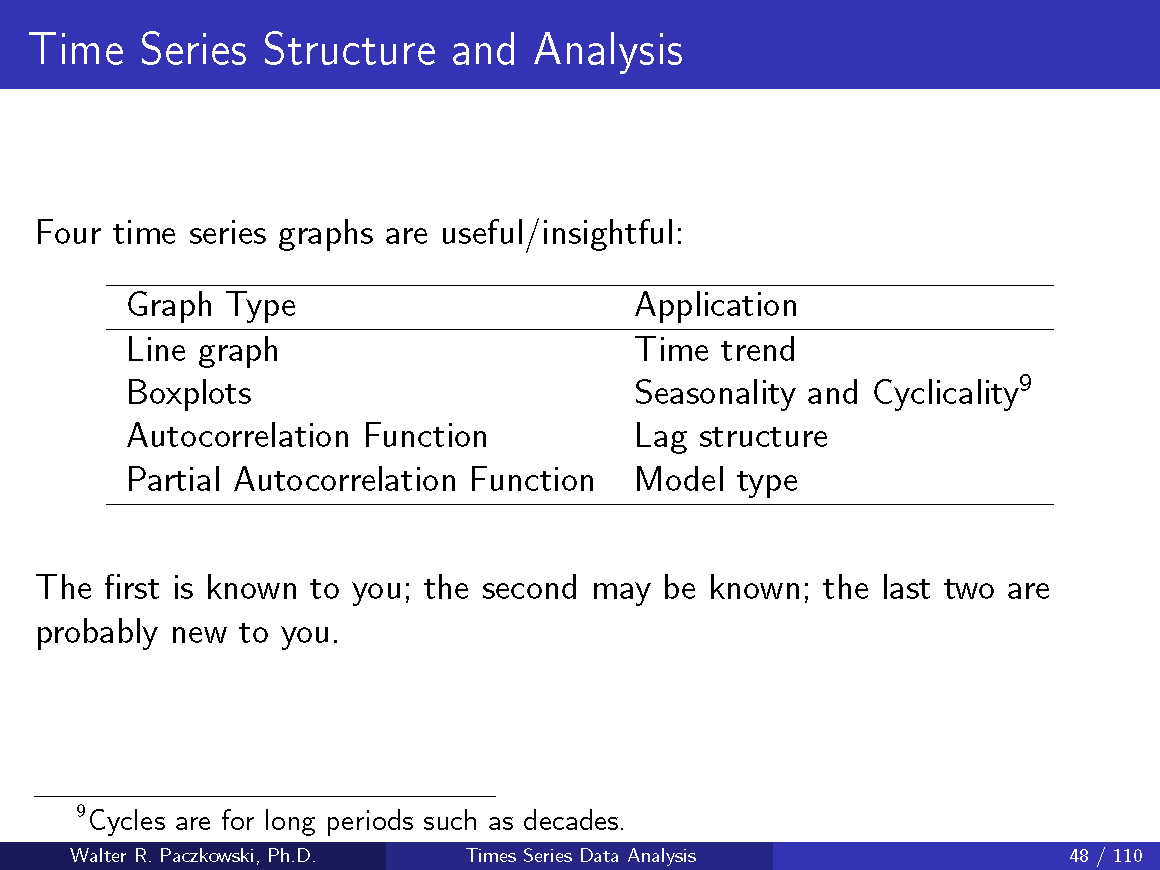

In [72]:
slide( '048' )

### Time Series Plots

[Back to Contents](#Contents)

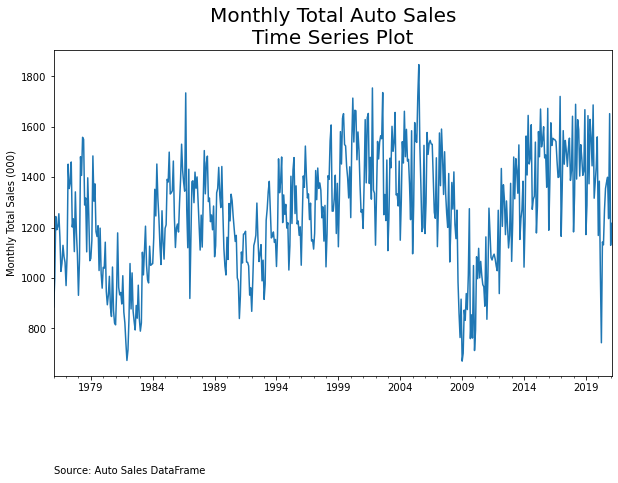

In [73]:
##
## Simple time series plot
##
base = 'Source: Auto Sales DataFrame'
ax = df_totalAutos.sales.plot( figsize = ( 10, 6 ) )
ax.set_title( 'Monthly Total Auto Sales\nTime Series Plot', fontsize = font_title )
ax.set( ylabel = 'Monthly Total Sales (000)', xlabel = "" )
footer( ax );

### Boxplots for Seasonality

[Back to Contents](#Contents)

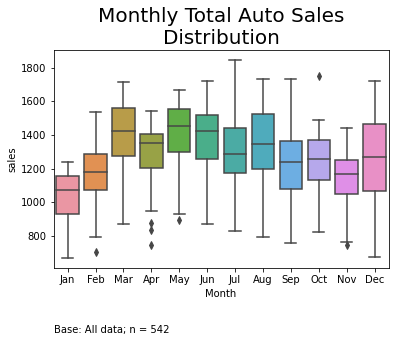

In [74]:
##
## Plot the times series monthly
##
## Get index
##
idx = df_totalAutos.index
##
## dt returns a numpy array, so coerse it to a list
##
df_totalAutos[ 'Month' ] = list( pd.Series( idx ).dt.month )
df_totalAutos.Month.replace( month_dict, inplace = True )
##
ax = sns.boxplot( x = 'Month', y = 'sales', data = df_totalAutos )
ax.set_title( 'Monthly Total Auto Sales\nDistribution', fontsize = font_title )
base = 'Base: All data; n = ' + str( df_totalAutos.shape[ 0 ] )
footer( ax );

### Autocorrelation Plot

[Back to Contents](#Contents)

The *autocorrelation function plot* (also referred to as a *correlogram*) displays the correlation of a series with itself lagged 1 period, 2 periods, etc.  This is useful for stationarity (to be explained later).

### Partial Autocorrelation Plot

The *partial autocorrelation plot* is like the autocorrelation plot except that it partials out or nets out the effect of intermediate periods in the lags.  For example, for a three period lag, the effects of one period and two period lags are netted out.  Only the "pure" correlation between the current period and three periods ago are used.  This function is useful for determining a model for a stochastic process (to be explained later).

[Back to Contents](#Contents)

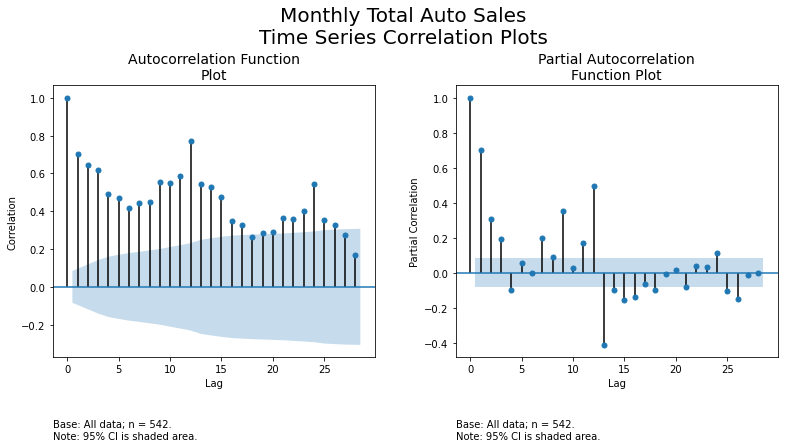

In [75]:
##
## Side-by-side display of autocorrelation and partial autocorrelation function graphs
##
base = 'Base: All data; n = ' + str( df_totalAutos.sales.shape[ 0 ] ) + '. \nNote: 95% CI is shaded area.'
fig, ( ax1, ax2 ) = plt.subplots( nrows=1, ncols=2, figsize = format_fig )
plt.subplots_adjust( wspace = 0.25 )
##
plot_acf( df_totalAutos.sales, ax = ax1  )
ax1.set_title( 'Autocorrelation Function\nPlot', fontsize = 14 )
ax1.set( ylabel = 'Correlation', xlabel = 'Lag' )
footer( ax1 )
##
plot_pacf( df_totalAutos.sales, ax = ax2 )
ax2.set_title( 'Partial Autocorrelation\nFunction Plot', fontsize = 14 )
ax2.set( ylabel = 'Partial Correlation', xlabel = 'Lag' )
footer( ax2 )
##
fig.suptitle( 'Monthly Total Auto Sales\nTime Series Correlation Plots', y = 1.1, fontsize = font_title );

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise IV.2

[Back to Contents](#Contents)

Create a time series plot of the ice cream shipment data.  What do you conclude?  How does this conclusion compare with your conclusion from the *ANOVA* test in Exercise IV.1?

[See Solution](#Solution-IV.2)

In [76]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


<div class="alert alert-warning" role="alert">
    <center><h1><strong><font color = black>Five Minute Break</font></center></h1></strong>
</div>

<div class="alert alert-info" role="alert">
    
<font color = black>Lesson V: Time Series Modeling
--------------------------------------

[Back to Contents](#Contents)    
    
</div>
In this lesson, I will:

>1. summarize basic econometric time series modeling; and
>2. introduce stochastic time series models.

[Back to Contents](#Contents)

## Overview of Time Series Models

[Back to Contents](#Contents)

>1. Econometric Models
>2. Stochastic Time Series Models

## Econometric Models and Autocorrelation Issues

[Back to Contents](#Contents)

We will use the Pinkham data for this section.

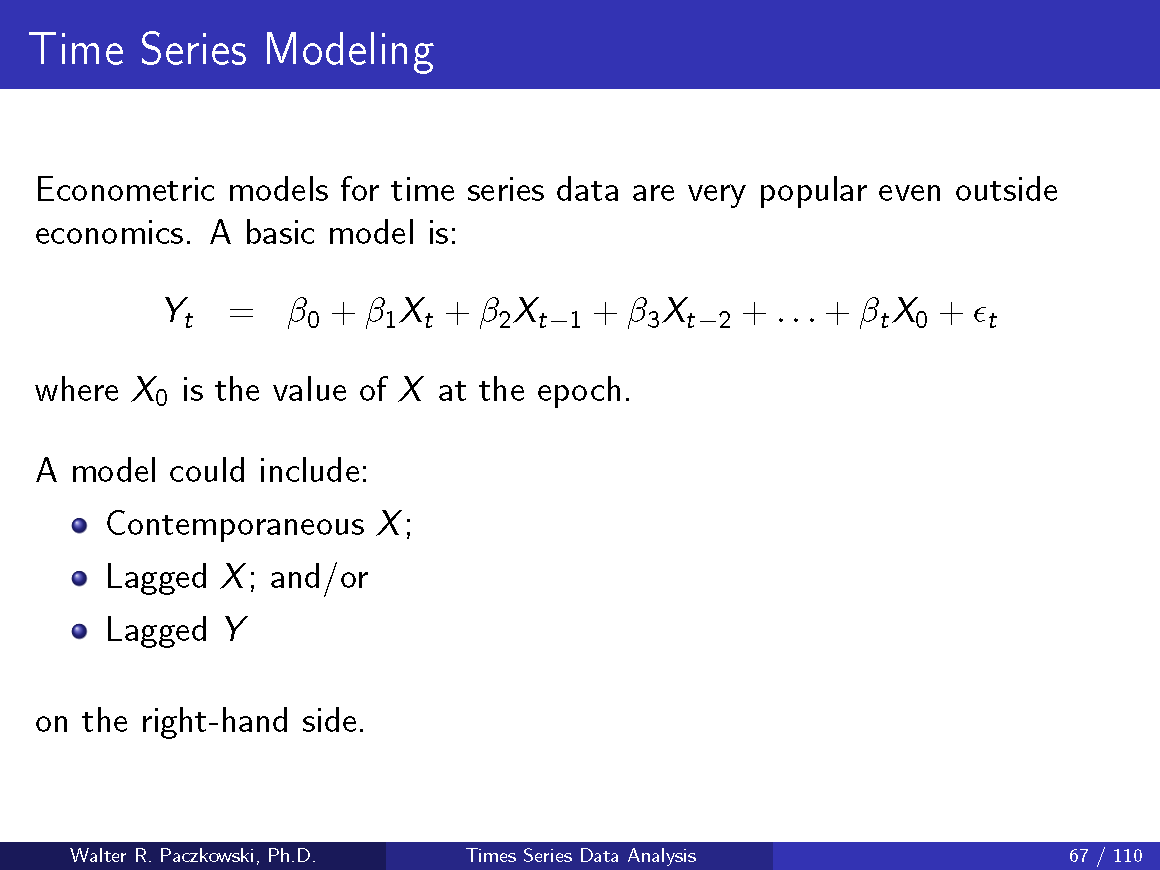

In [77]:
slide( '067' )

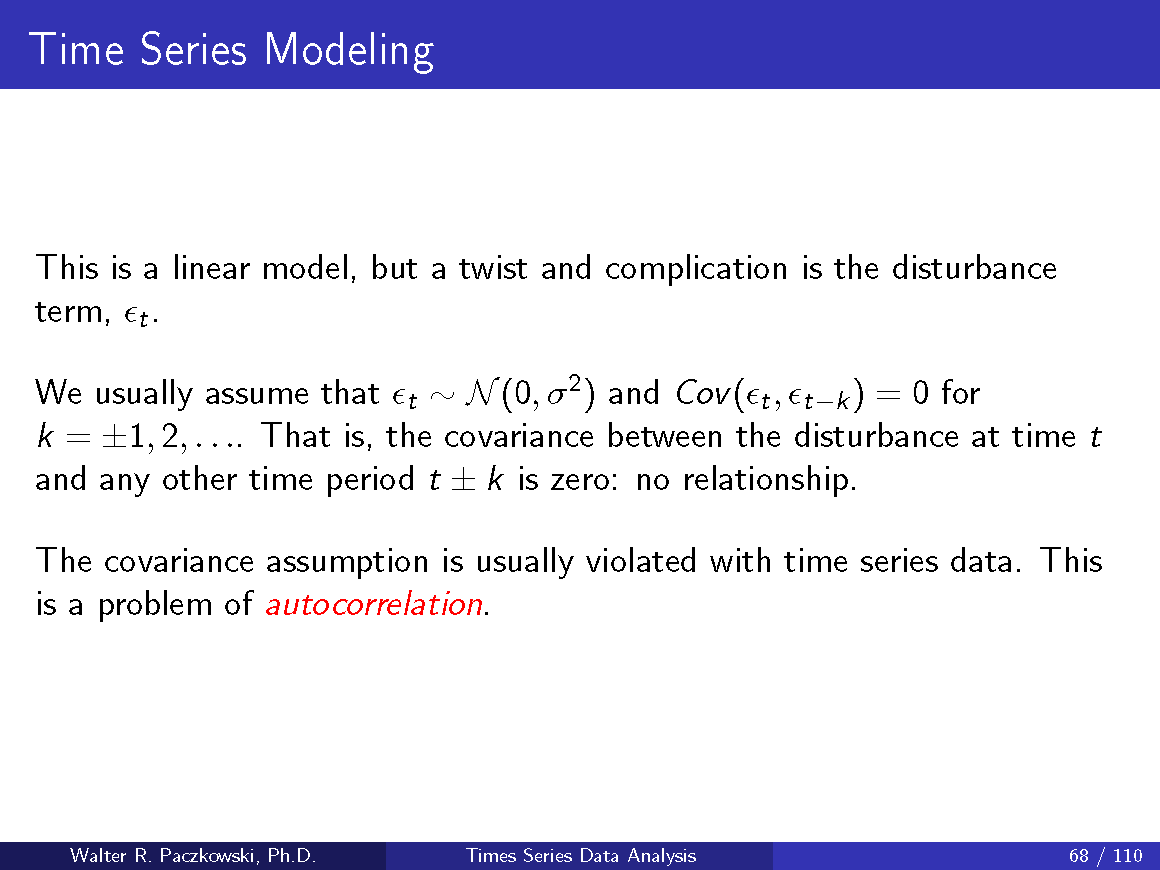

In [78]:
slide( '068' )

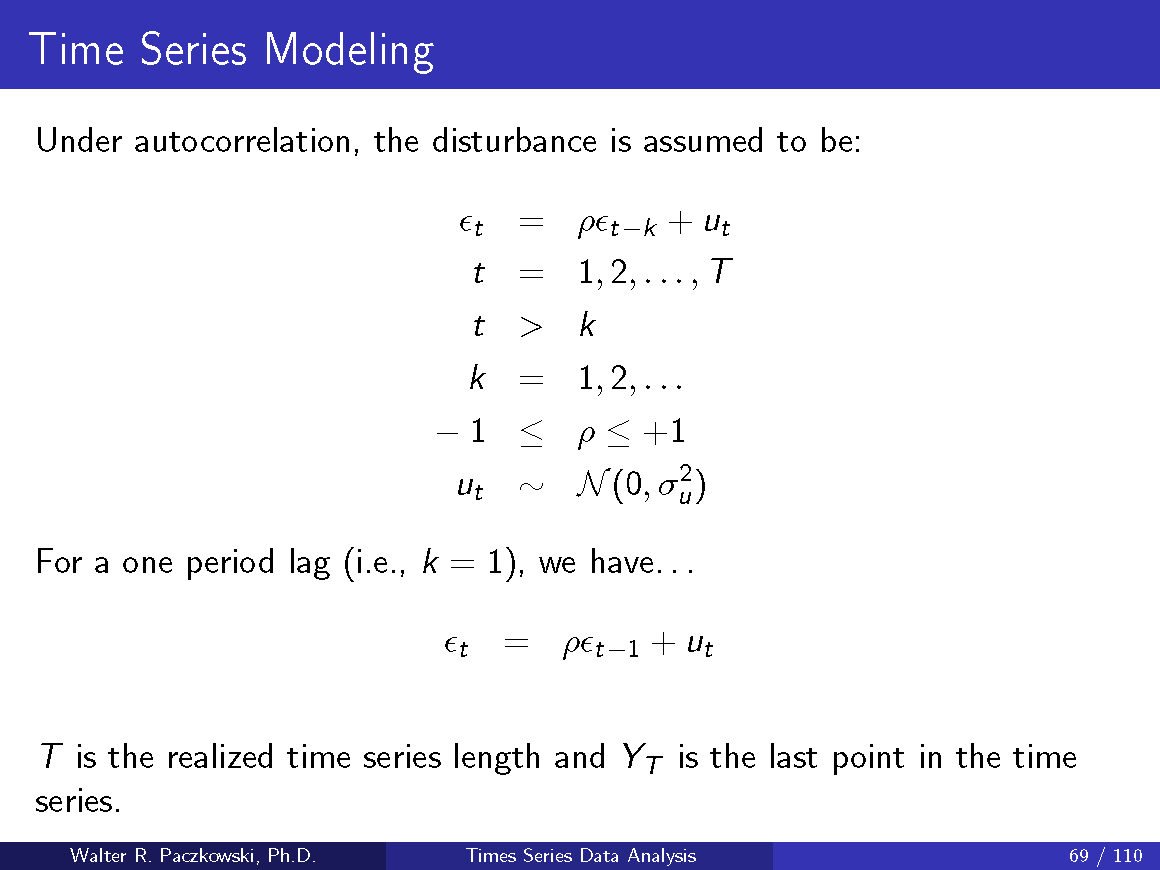

In [79]:
slide( '069' )

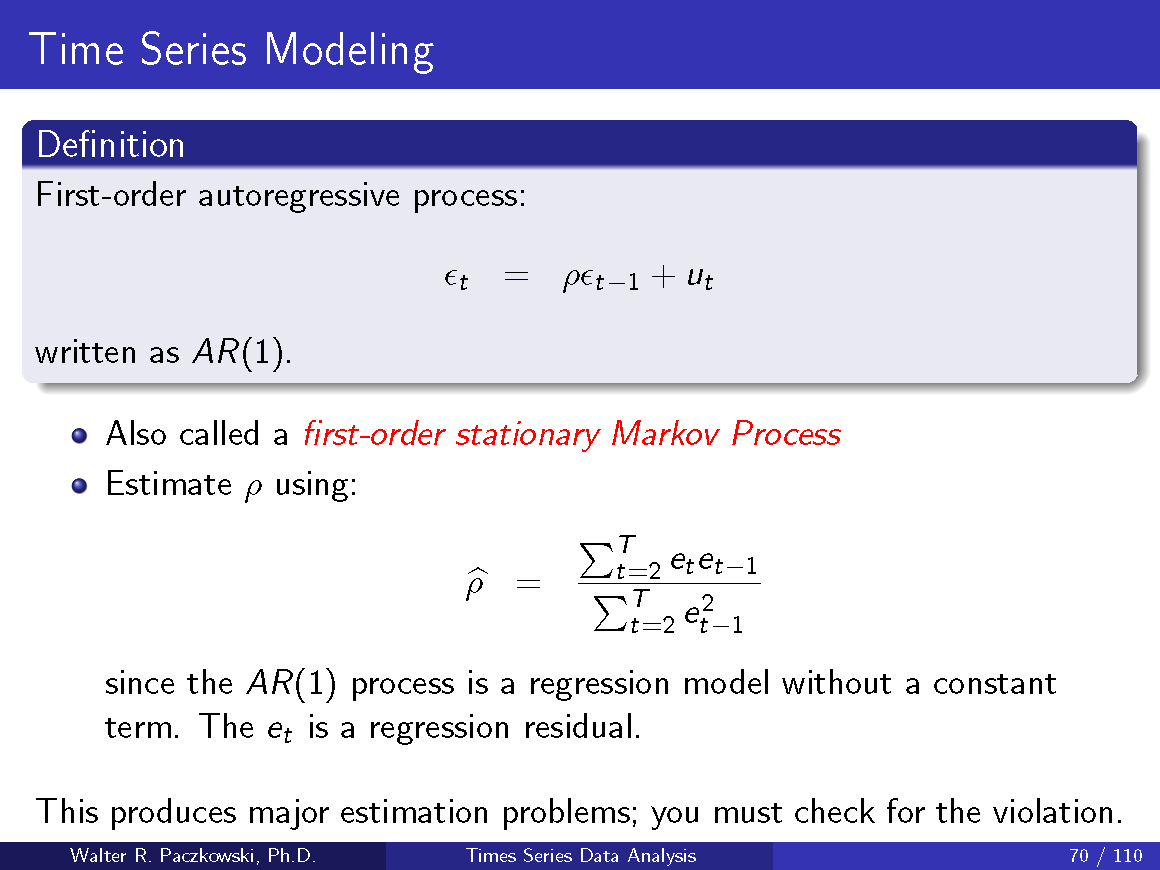

In [80]:
slide( '070' )

### Detecting Autocorrelation

[Back to Contents](#Contents)

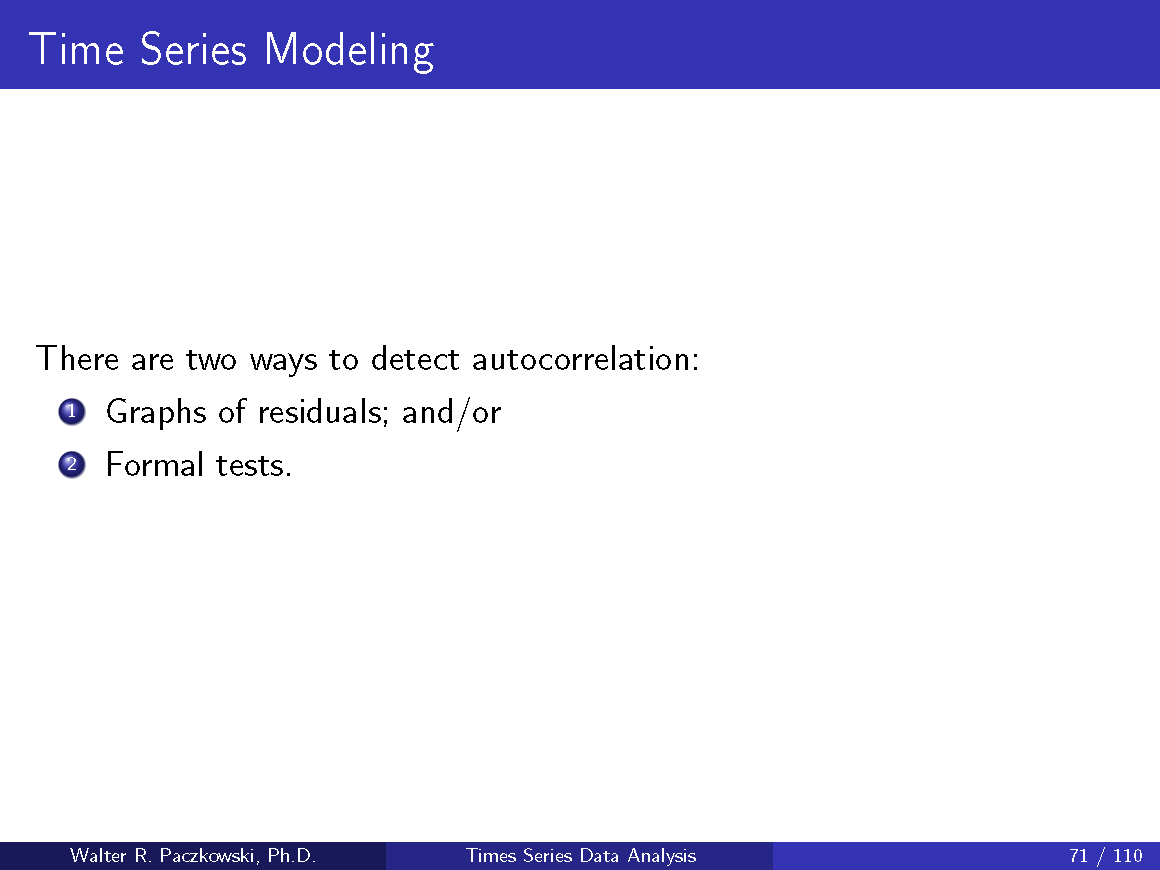

In [81]:
slide( '071' )

#### Graphs of Residuals

[Back to Contents](#Contents)

First estimate an *OLS* model and then retrieve the residuals.

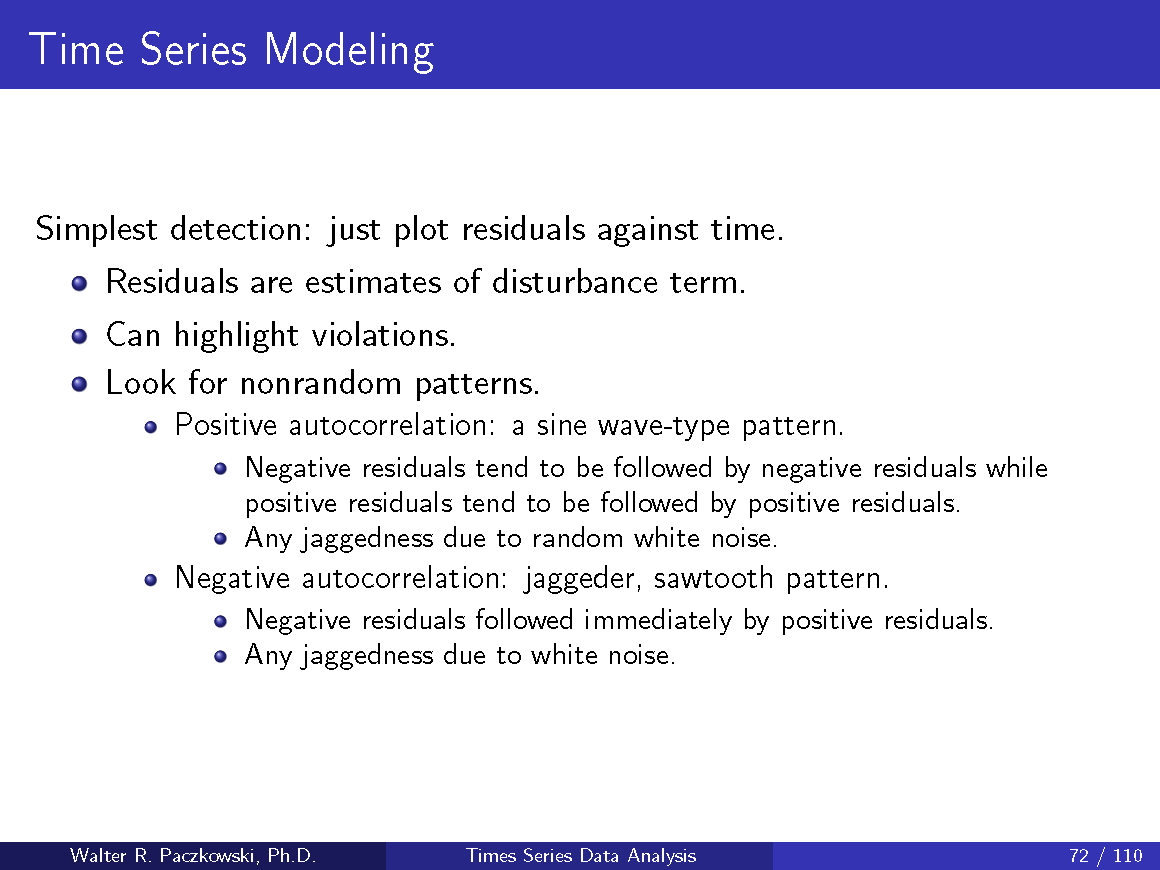

In [82]:
slide( '072' )

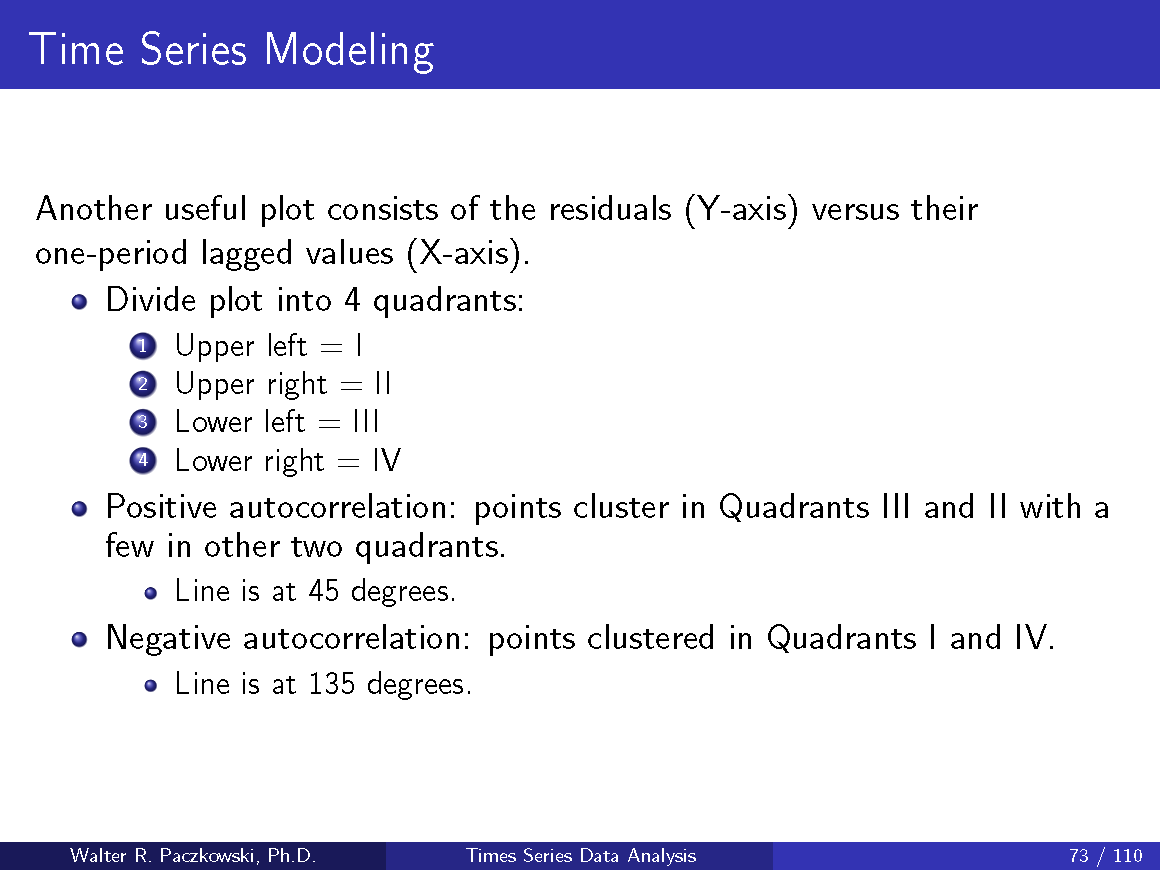

In [83]:
slide( '073' )

In [84]:
## 
## OLS
##
## There are four steps for estimatng a model:
##
##   1. define a formula (i.e., the specific model to estimate)
##   2. instantiate the model (i.e., specify it)
##   3. fit the model
##   4. summarize the fitted model
##
## ===> Step 1: Define a formula <===
##
## The formula uses a “~” to separate the left-hand side from the right-hand side
## of a model and a “+” to add columns to the right-hand side.  A “-” sign (not 
## used here) can be used to remove columns from the right-hand side (e.g.,
## remove or omit the constant term which is always included by default). 
##
formula = 'sales ~ advertising'
##
## Since Region is categorical, you must create dummies for the regions.  You
## do this using 'C( Region )' to indicate that Region is categorical.
##
## ===> Step 2: Instantiate the OLS model <===
##
mod = smf.ols( formula, data = df_pink )
##
## ===> Step 3: Fit the instantiated model <===
##      Recommendation: number your fitted models
##
reg01 = mod.fit() 
##
## ===> Step 4: Summarize the fitted model <===
##
display( reg01.summary() )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.26e-15
Time:                        13:08:51   Log-Likelihood:                -390.91
No. Observations:                  54   AIC:                             785.8
Df Residuals:                      52   BIC:                             789.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     488.8327    127.439      3.836      0.000     233.108     744.558
advertising     1.4346      0.127     11.308      0.000       1.180       1.689
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.391
Skew:                          -0.206   Prob(JB):                        0.822
Kurtosis:                       2.936   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
##
## Retrieve residuals
##
resid = reg01.resid.to_frame( name = 'Residual' )
resid.head().style.set_caption( 'Regression Residual for Pinkham Data' ).\
    set_table_styles( tbl_styles )

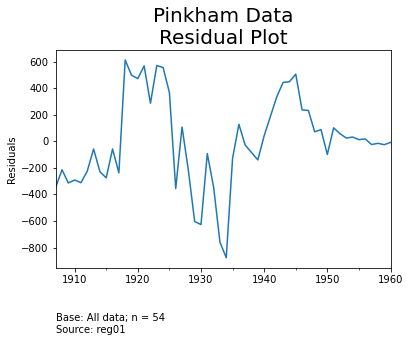

In [86]:
##
## Residual Plot: Against time
## Sine wave pattern
##
base = 'Base: All data; n = ' + str( df_pink.shape[ 0 ] ) + '\nSource: reg01'
ax = resid.plot( y = 'Residual', legend = False )
ax.set_title( 'Pinkham Data\nResidual Plot', fontsize = font_title )
ax.set( xlabel = '', ylabel = 'Residuals' )
footer( ax );

**_Interpretation_**

A characteristic of positive autocorrelation is a sine wave appearance in a graph of the time series.  A sine wave is very evident here, strongly suggesting positive autocorrelation.  This agrees with the Durbin-Watson statistc.

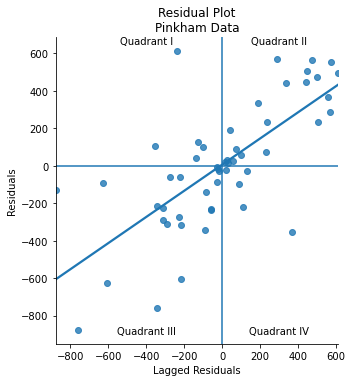

In [87]:
##
## Residual Plot: Lagged residual plot
##
## Lag the residuals one period
##
resid[ 'lag_Residual' ] = resid.Residual.shift()
##
## Residual Plot: Against Lagged Value
##
## Drop first observation which has lagged value at nan
##
tmp = resid.dropna( )
##
## Plot lagged and unlagged residuals
##
base = 'Base: All data; n = ' + str( tmp.shape[ 0 ] ) + '\nSource:\
    reg01\nNote: First observation dropped due to lag'
ax = sns.lmplot( y = 'Residual', x = 'lag_Residual', data = tmp, ci = False )
##
plt.annotate( 'Quadrant I', xy = ( -400, 650 ), ha = 'center' )
plt.annotate( 'Quadrant II', xy = ( 300, 650 ), ha = 'center' )
plt.annotate( 'Quadrant III', xy = ( -400, -900 ), ha = 'center' )
plt.annotate( 'Quadrant IV', xy = ( 300, -900 ), ha = 'center' )
##
ax.set( title = 'Residual Plot\nPinkham Data' )
ax.set( xlabel = 'Lagged Residuals', ylabel = 'Residuals' )
plt.axvline( x = 0 )
plt.axhline( y = 0 );
##footer( ax );


**_Interpretation_**

Poistive autocorrleation is indicated by the majority of points lying in Quadrants II and III.

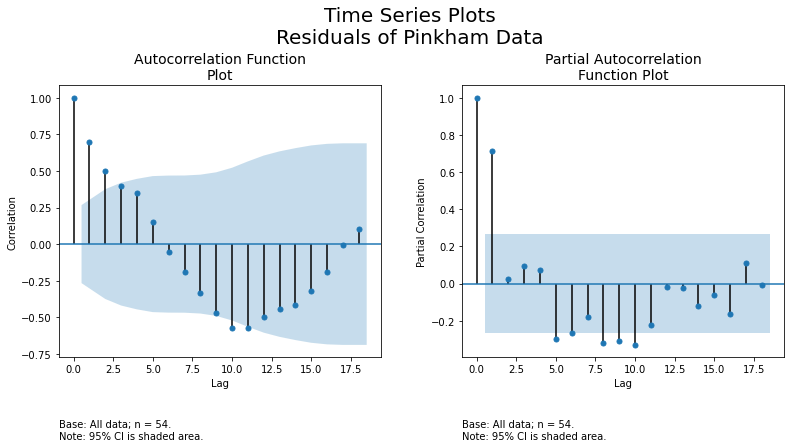

In [88]:
##
## Side-by-side display of autocorrelation and partial autocorrelation function graphs
##
base = 'Base: All data; n = ' + str( resid.Residual.shape[ 0 ] ) + '. \nNote: 95% CI is shaded area.'
##
fig, ( ax1, ax2 ) = plt.subplots( nrows=1, ncols=2, figsize = format_fig )
plt.subplots_adjust( wspace = 0.25 )
##
plot_acf( resid.Residual, ax = ax1  )
ax1.set_title( 'Autocorrelation Function\nPlot', fontsize = 14 )
ax1.set( ylabel = 'Correlation', xlabel = 'Lag' )
footer( ax1 )
##
plot_pacf( resid.Residual, ax = ax2 )
ax2.set_title( 'Partial Autocorrelation\nFunction Plot', fontsize = 14 )
ax2.set( ylabel = 'Partial Correlation', xlabel = 'Lag' )
footer( ax2 )
##
fig.suptitle( 'Time Series Plots\nResiduals of Pinkham Data', y = 1.1, fontsize = font_title );

#### Formal Tests

[Back to Contents](#Contents)

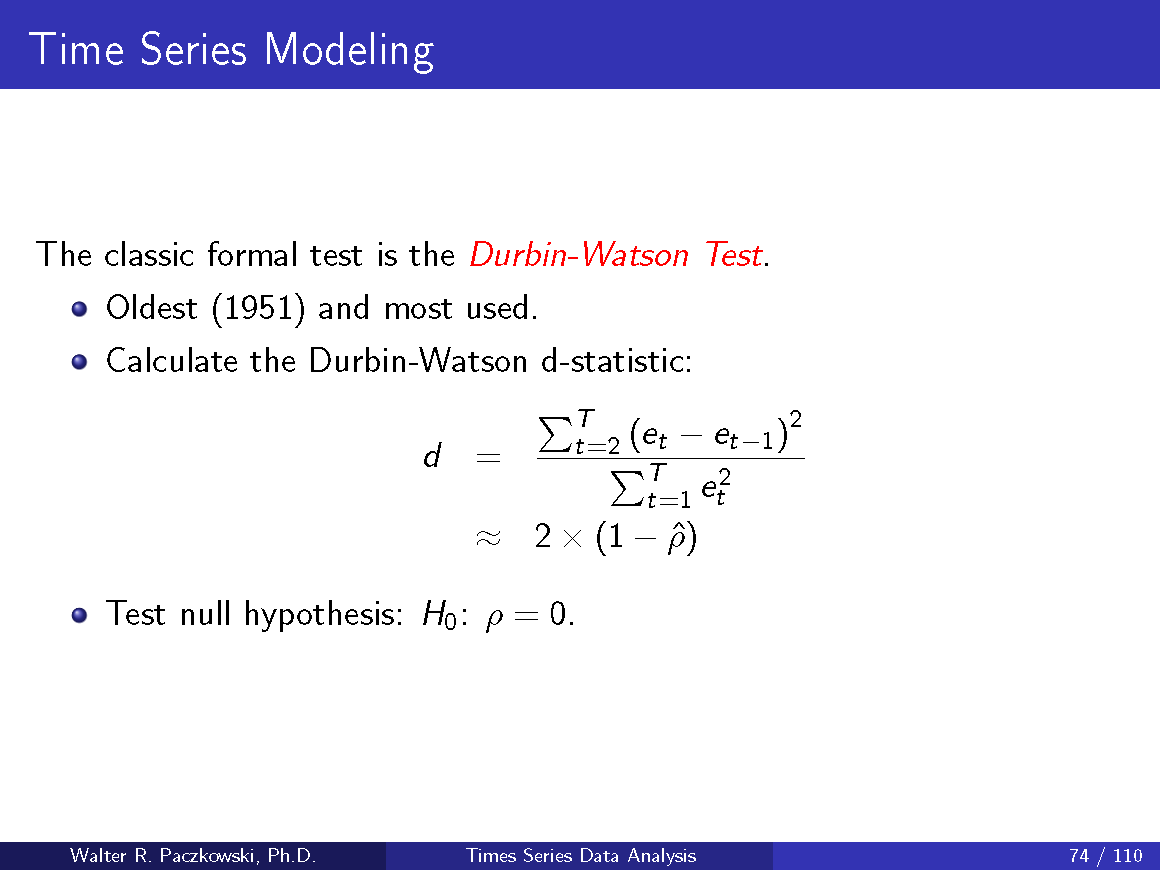

In [89]:
slide( '074' )

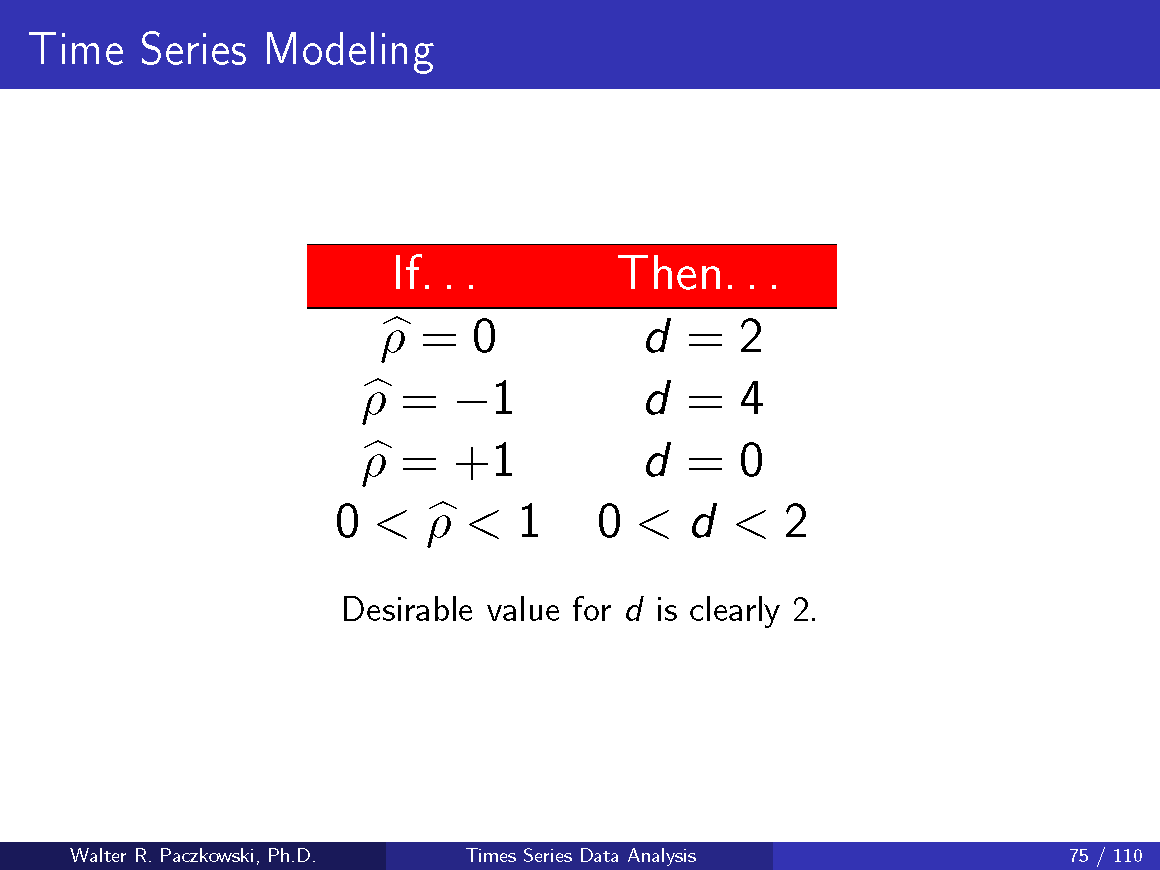

In [90]:
slide( '075' )

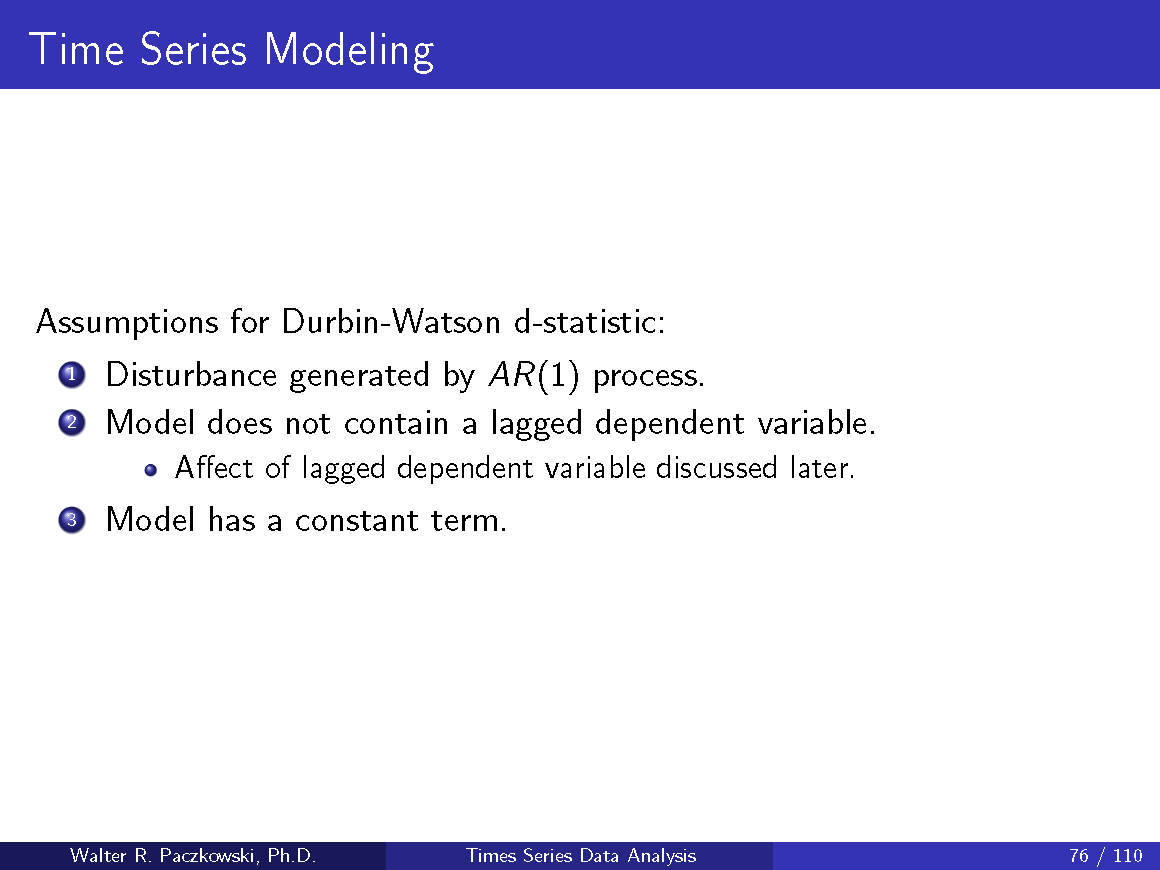

In [91]:
slide( '076' )

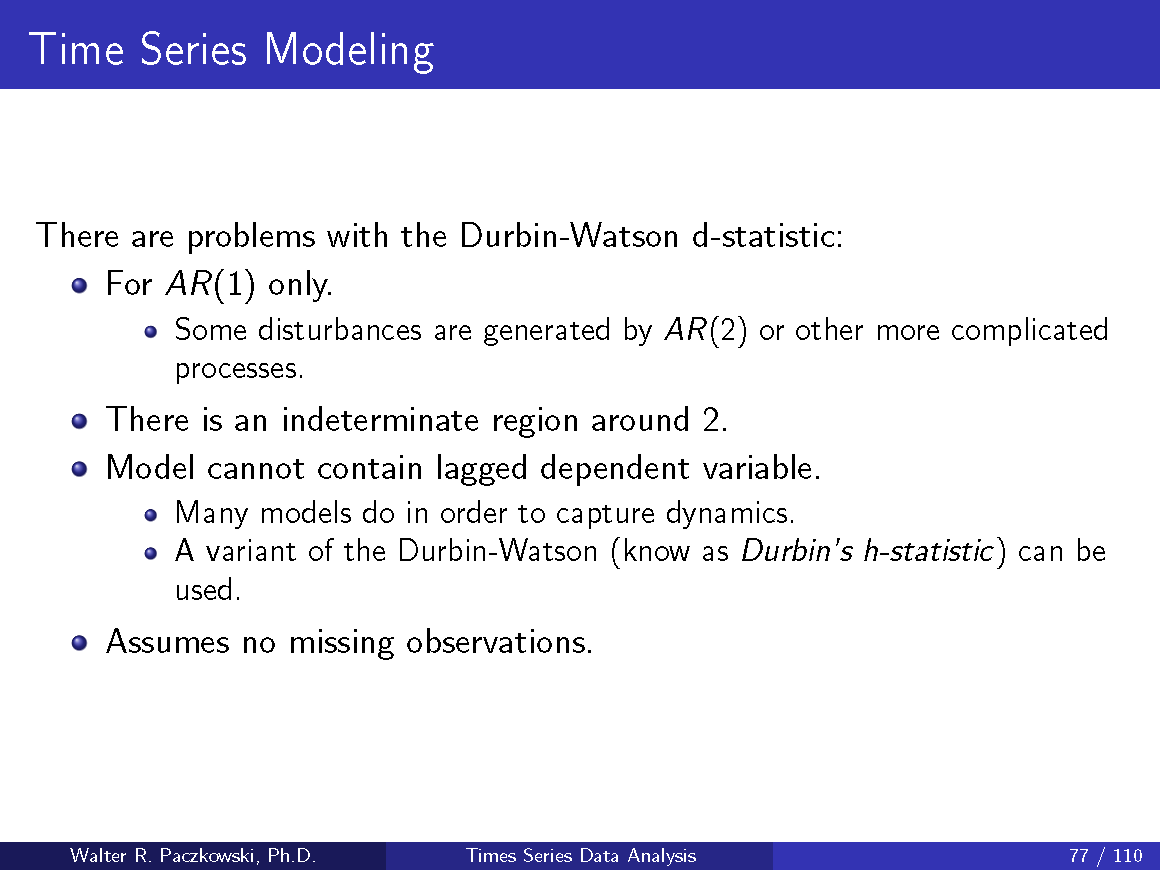

In [92]:
slide( '077' )

For our regression example, the Durbin-Watson is very low at 0.582.

> $H_0$: There is no correlation among the residuals.
>
> $H_A$: The residuals are autocorrelated.

The test statistic is approximately equal to $2 \times (1 - \hat{\rho})$ where $\hat{\rho}$ is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:

>1. A test statistic of 2 indicates no serial correlation.
>2. The closer the test statistics is to 0, the more the evidence of **_positive_** serial correlation.
>3. The closer the test statistics is to 4, the more the evidence of **_negative_** serial correlation.

As a rule of thumb, test statistic values in the range 1.5 -- 2.5 are considered normal. However, values outside this range could indicate that autocorrelation is a problem.

The value 0.582 definitely indicates positive autocorrelation.

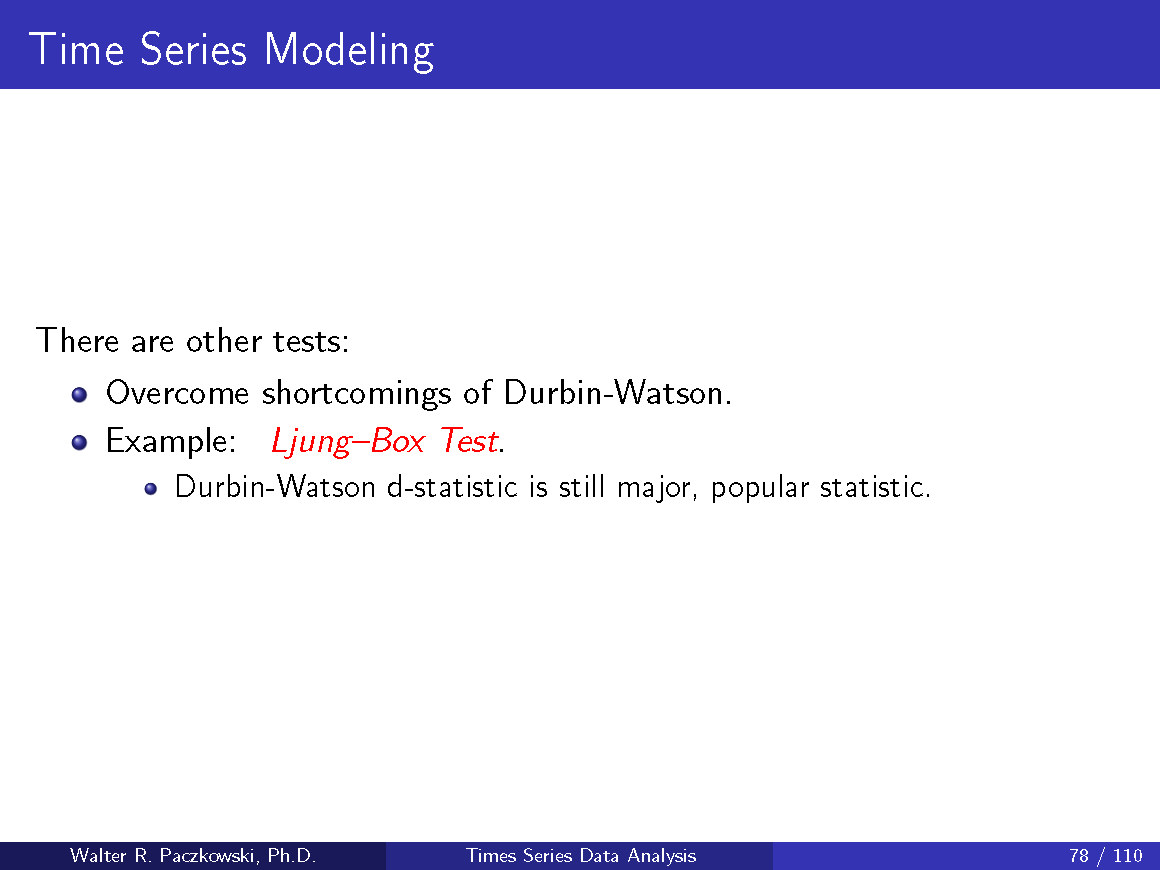

In [93]:
slide( '078')

### Correcting for Autocorrelation

[Back to Contents](#Contents)

In [94]:
##
## Adjust for autocorrelation
## Notice the rho is set to 1 for a one period lag: AR(1)
## Also notice the new command: GLSAR.from_formula
##
formula = 'sales ~ advertising'
reg02 = sm.GLSAR.from_formula( formula, rho = 1, data = df_pink )
##
## Iterate several times and print the results
##
result = reg02.iterative_fit( maxiter = 10 )
display( result.summary() )


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.354
Model:                          GLSAR   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     27.95
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.62e-06
Time:                        13:08:51   Log-Likelihood:                -351.40
No. Observations:                  53   AIC:                             706.8
Df Residuals:                      51   BIC:                             710.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1297.6495    299.799      4.328      0.000     695.777    1899.522
advertising     0.6410      0.121      5.286      0.000       0.398       0.884
==============================================================================
Omnibus:                       16.298   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.767
Skew:                           0.853   Prob(JB):                     1.26e-07
Kurtosis:                       6.387   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**_Interpetation_**

Notice the new Durbin-Watson.

In [95]:
##
## Do GLSAR with AR(2)
##
CORC = sm.GLSAR( reg02.endog, reg02.exog,  rho = 2 )
CORC_fit = CORC.iterative_fit( maxiter = 100 )
display( CORC_fit.summary2() )

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Results: Generalized least squares with AR(p)
=================================================================
Model:              GLSAR            Adj. R-squared:     0.222   
Dependent Variable: y                AIC:                689.5501
Date:               2021-03-17 13:08 BIC:                693.4526
No. Observations:   52               Log-Likelihood:     -342.78 
Df Model:           1                F-statistic:        15.59   
Df Residuals:       50               Prob (F-statistic): 0.000247
R-squared:          0.238            Scale:              32370.  
------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
------------------------------------------------------------------
const     1459.9808  254.6140  5.7341  0.0000  948.5735  1971.3881
x1           0.4519    0.1145  3.9481  0.0002    0.2220     0.6818
-----------------------------------------------------------------
Omnibus:              13.860       Durbin-Watson:          2.216 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       23.750
Skew:                 0.766        Prob(JB):               0.000 
Kurtosis:             5.935        Condition No.:          2469  
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

**_Note_**

The AR( 2 ) model for the disturbance is $\epsilon_t = \phi_1 \times \epsilon_{t - 1} + \phi_2 \times \epsilon_{t - 2}$.

## Stochastic Time Series Models (*a.k.a*., Box-Jenkins)

[Back to Contents](#Contents)

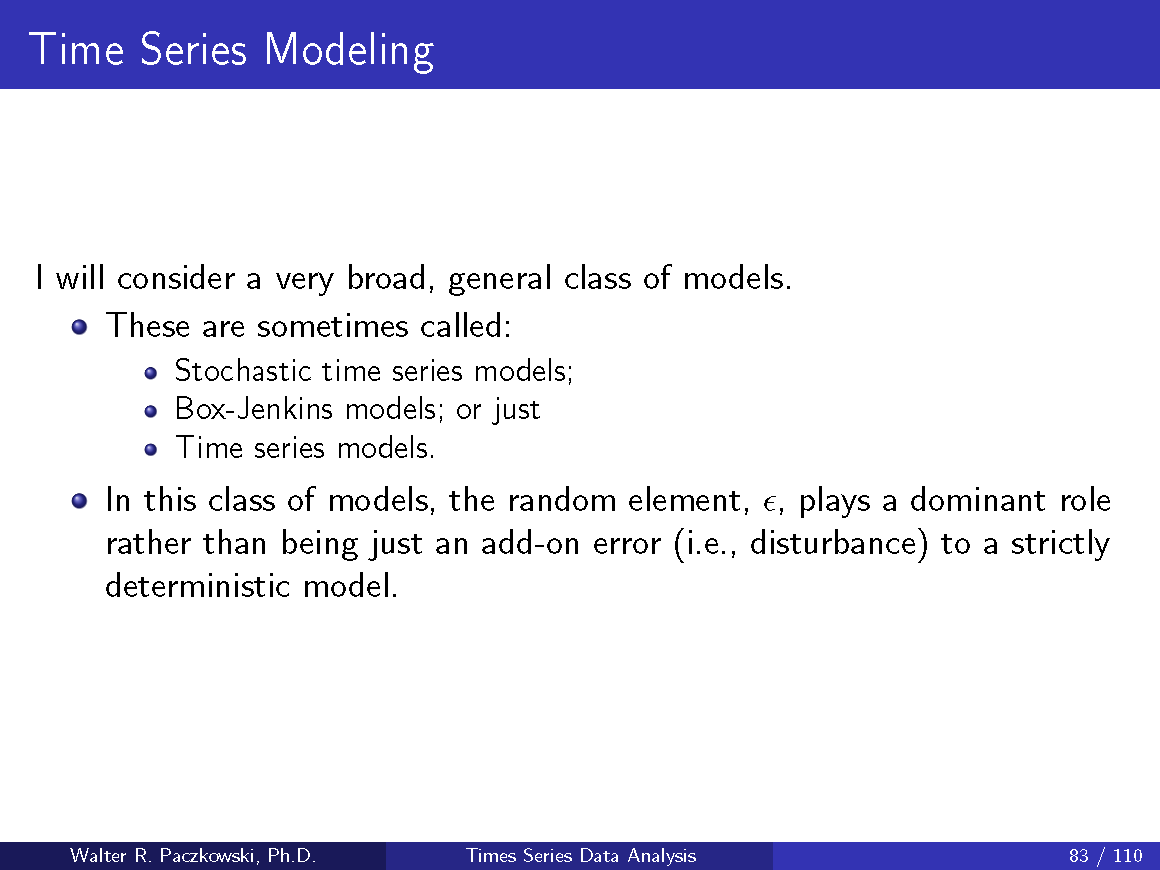

In [96]:
slide( '083' )

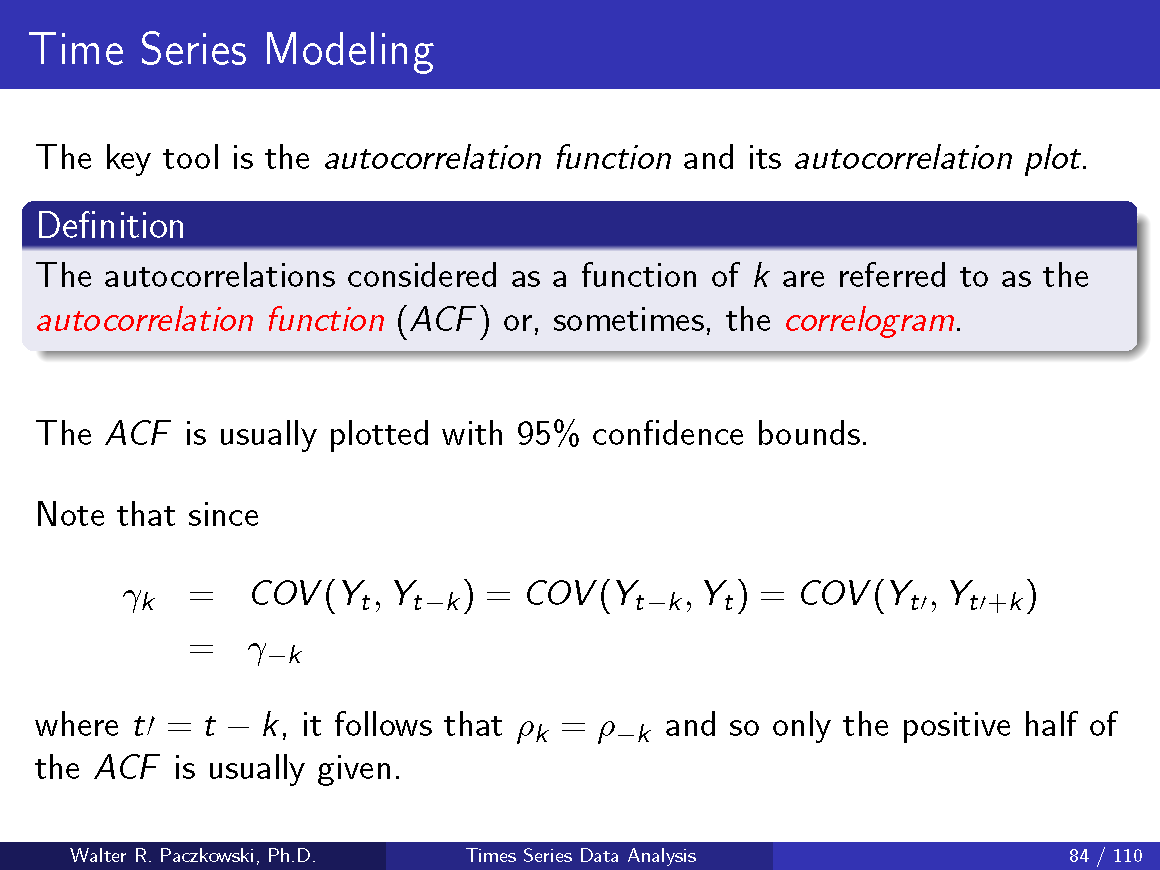

In [97]:
slide( '084' )

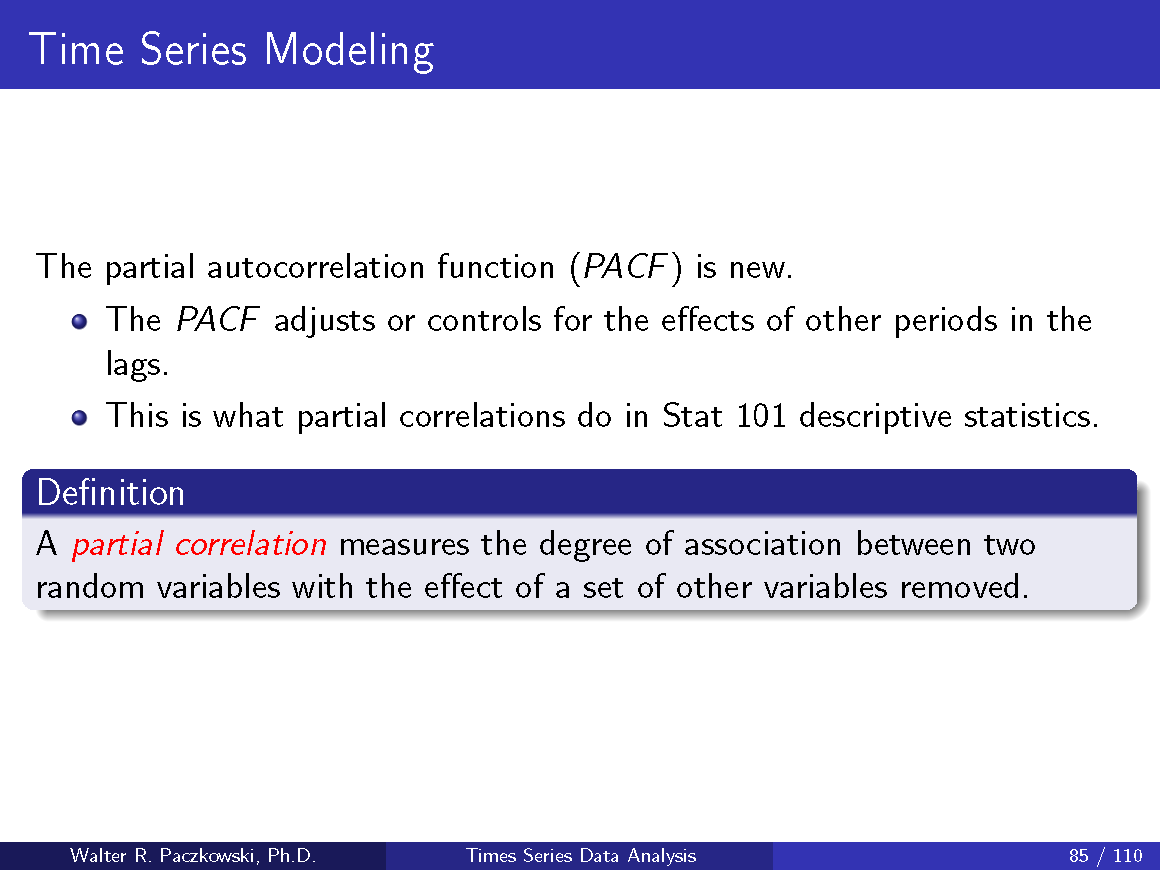

In [98]:
slide( '085' )

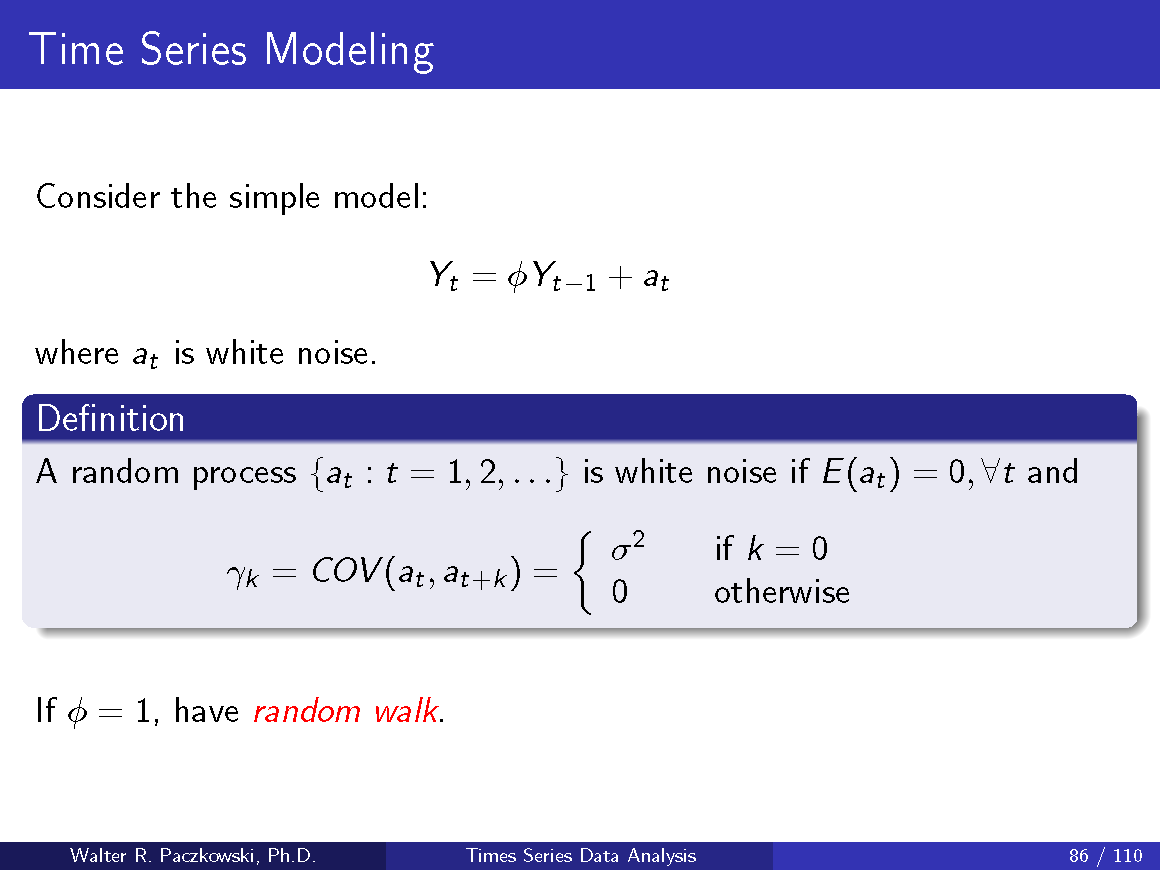

In [99]:
slide( '086' )

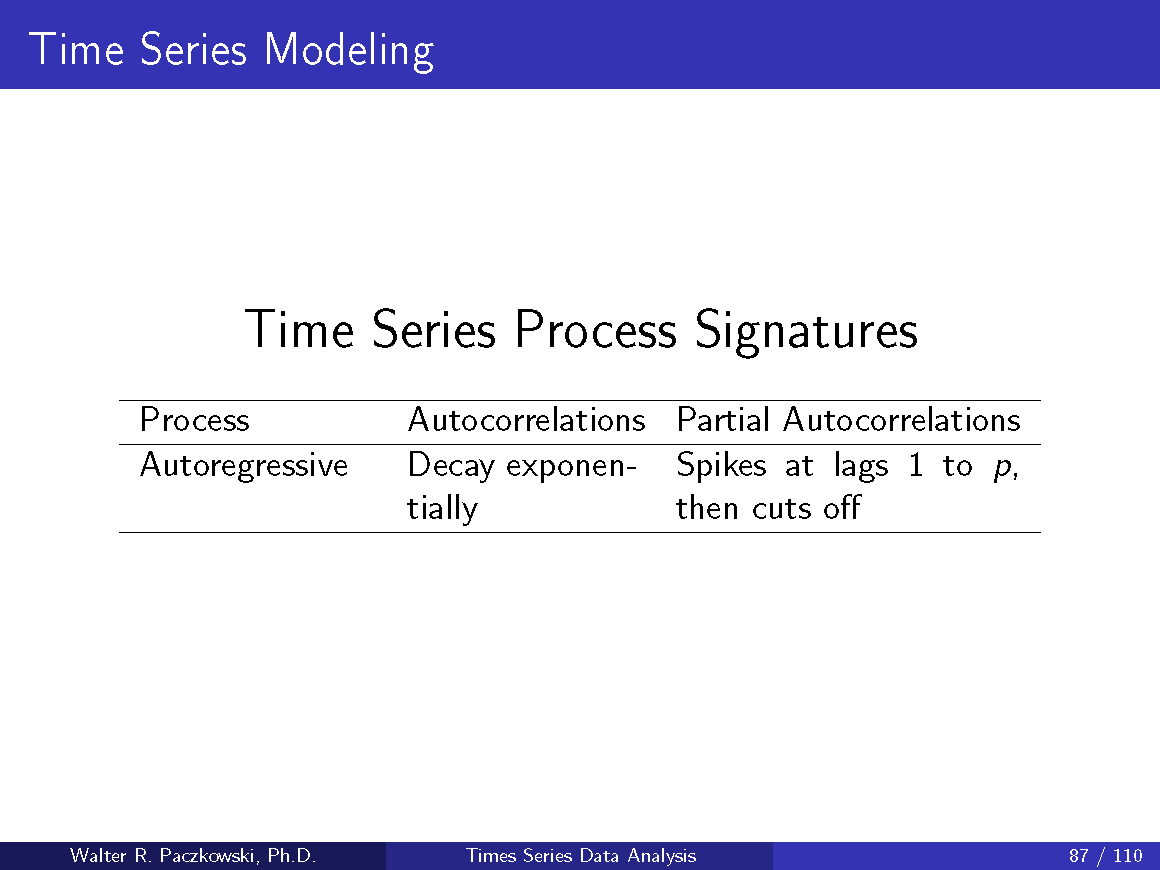

In [100]:
slide( '087' )

### The AR(1) Model and Random Walks

[Back to Contents](#Contents)

Simplist model is AR(1): $Y_t = \phi \times Y_{t - 1} + a_t$.  If $\phi = 1$, then $Y_t = Y_{t - 1} + a_t$ is a *random walk*.  It is also a *random walk without drift*.

#### Random Walk without Drift

[Back to Contents](#Contents)

count      mean       std       min       25%       50%       75%  \
RW_wod  100.0  3.698664  4.670147 -2.246656  0.209103  1.868103  6.131586   

              max  
RW_wod  14.480611

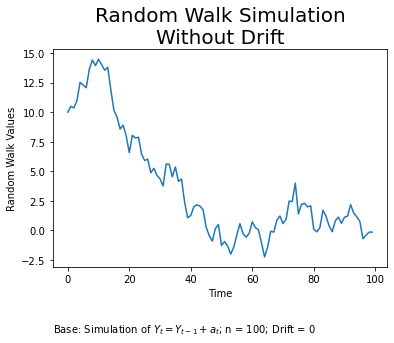

In [101]:
## 
## Generate a random walk without drift
##
## Set random seed for reproducibility
##
np.random.seed( 42 )
##
## Set parameters
##
n = 100
start = 10
drift = 0
##
## Create random walk
##
rw = [ start ]
for i in range( 1, n ):
    walk = drift + rw[ i - 1 ] + np.random.normal()
    rw.append( walk )
##  
df_rw = pd.DataFrame( { 'RW_wod': rw } )   ## wod = without drift
##
## Plot
##
ax = df_rw.plot( legend = False )
ax.set_title( 'Random Walk Simulation\nWithout Drift', fontsize = font_title )
ax.set( ylabel = 'Random Walk Values', xlabel = 'Time' )
base = 'Base: Simulation of $Y_t = Y_{t - 1} + a_t$; n = ' + str( n ) + '; Drift = ' + str( drift )
footer( ax );
##
display( df_rw.describe().T )

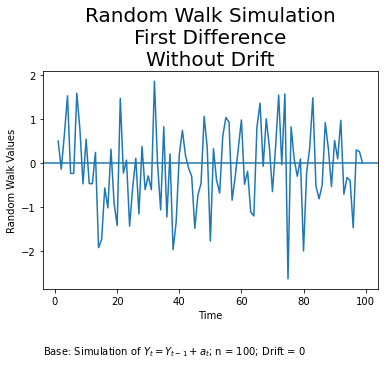

In [102]:
##
## Take first difference of the random walk
##
df_rw[ 'RW_wod_diff' ] = df_rw.RW_wod.diff( )
##
## Plot first difference
##
ax = df_rw.RW_wod_diff.plot( legend = False )
ax.set_title( 'Random Walk Simulation\nFirst Difference\nWithout Drift', fontsize = font_title )
ax.set( ylabel = 'Random Walk Values', xlabel = 'Time' )
base = 'Base: Simulation of $Y_t = Y_{t - 1} + a_t$; n = ' + str( n ) + '; Drift = ' + str( drift )
plt.axhline( y = 0 )
footer( ax );

#### Random Walk with Drift

[Back to Contents](#Contents)

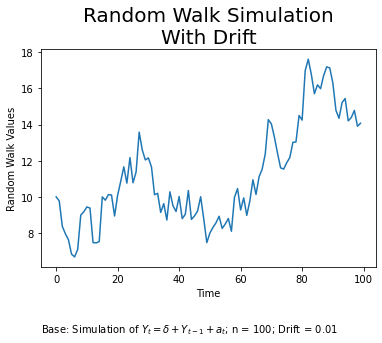

In [103]:
## 
## Generate a random walk with drift
##
## Set parameters -- same as above but reset drift
##
drift = 0.01
##
## Create random walk
##
rw = [ start ]
for i in range( 1, n ):
    walk = drift + rw[ i - 1 ] + np.random.normal()
    rw.append( walk )
df_rw[ 'RW_wd' ] = rw   ## wd = with drift
##
## Plot
##
ax = df_rw.RW_wd.plot( )
ax.set_title( 'Random Walk Simulation\nWith Drift', fontsize = font_title )
ax.set( ylabel = 'Random Walk Values', xlabel = 'Time' )
base = 'Base: Simulation of $Y_t = \delta + Y_{t - 1} + a_t$; n = ' + str( n ) + '; Drift = ' + str( drift )
footer( ax );
##
display( df_rw.describe().T.style.set_caption( 'Descriptive Statistics for\nRandom Walk Simulation\n\
    With Drift' ).set_table_styles( tbl_styles ) )

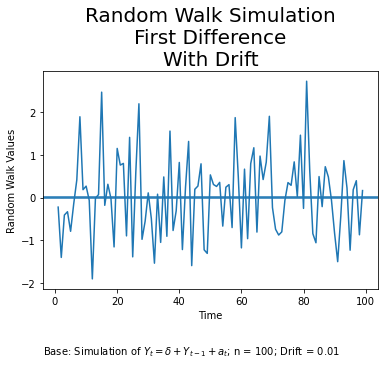

In [104]:
##
## Take first difference of the random walk
##
df_rw[ 'RW_wd_diff' ] = df_rw.RW_wd.diff( )
##
## Plot first difference
##
ax = df_rw.RW_wd_diff.plot()
ax.set_title( 'Random Walk Simulation\nFirst Difference\nWith Drift', fontsize = font_title )
ax.set( ylabel = 'Random Walk Values', xlabel = 'Time' )
base = 'Base: Simulation of $Y_t = \delta + Y_{t - 1} + a_t$; n = ' + str( n ) + '; Drift = ' + str( drift )
plt.axhline( y = 0 )
plt.axhline( y = drift )
footer( ax );
##
display( df_rw.describe().T.style.set_caption( 'Descriptive Statistics for\nRandom Walk Simulation\n\
    First Difference\nWith Drift' ).set_table_styles( tbl_styles ) )

#### Digression: Monte Carlo Simulation of Random Walk

[Back to Contents](#Contents)

Random Walk models are very important and well studied.  What is the general pattern for them?  A *Monte Carlo Simulation* helps to answer this question.

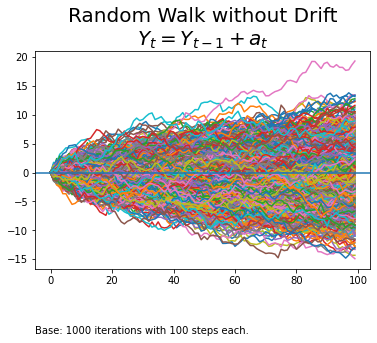

In [105]:
##
## Import the random package
##
import random
##
random.seed( 42 )
initial_value = 0
mu, std = 0, 0.5
iter = 1000
steps = 100
##
## Simulate RW without drift
##
random_walks = pd.DataFrame()
for walk_number in range( iter ):
    walk = [ initial_value ]
    for step in range( 1, steps ):
        walk.append( walk[ step - 1 ] + random.gauss( mu, std ) )
    random_walks[ 'Walk ' + str( walk_number) ] = walk
##
## Plot the RW
##
base = 'Base: ' + str( iter ) + ' iterations with ' + str( steps ) + ' steps each.'
ax = random_walks.plot( legend = False )
ax.set_title( 'Random Walk without Drift\n$Y_t = Y_{t - 1} + a_t$', fontsize = font_title  )
plt.axhline( y = 0 )
footer( ax );


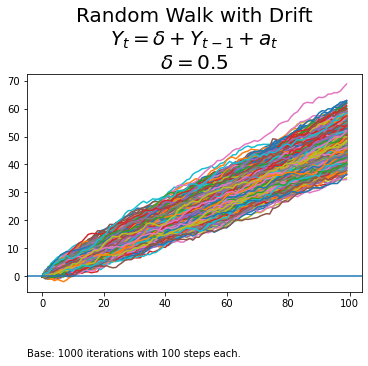

In [106]:
##
## Set the random seed
##
random.seed( 42 )
##
## Simulate RW with drift
##
drift = 0.5
random_walk = pd.DataFrame()
for walk_number in range( iter ):
    walk = [ initial_value ]
    for step in range( 1, steps ):
        walk.append( drift + walk[ step - 1 ] + random.gauss( mu, std ) )
    random_walk[ 'Walk ' + str( walk_number) ] = walk
##
## Plot the RW
##
base = 'Base: ' + str( iter ) + ' iterations with ' + str( steps ) + ' steps each.'
ax = random_walk.plot( legend = False )
ax.set_title( 'Random Walk with Drift\n$Y_t = \delta + Y_{t - 1} + a_t$\n$\delta = 0.5$', fontsize = font_title )
plt.axhline( y = 0 )
footer( ax );

## Quick Introduction to Stationarity

[Back to Contents](#Contents)

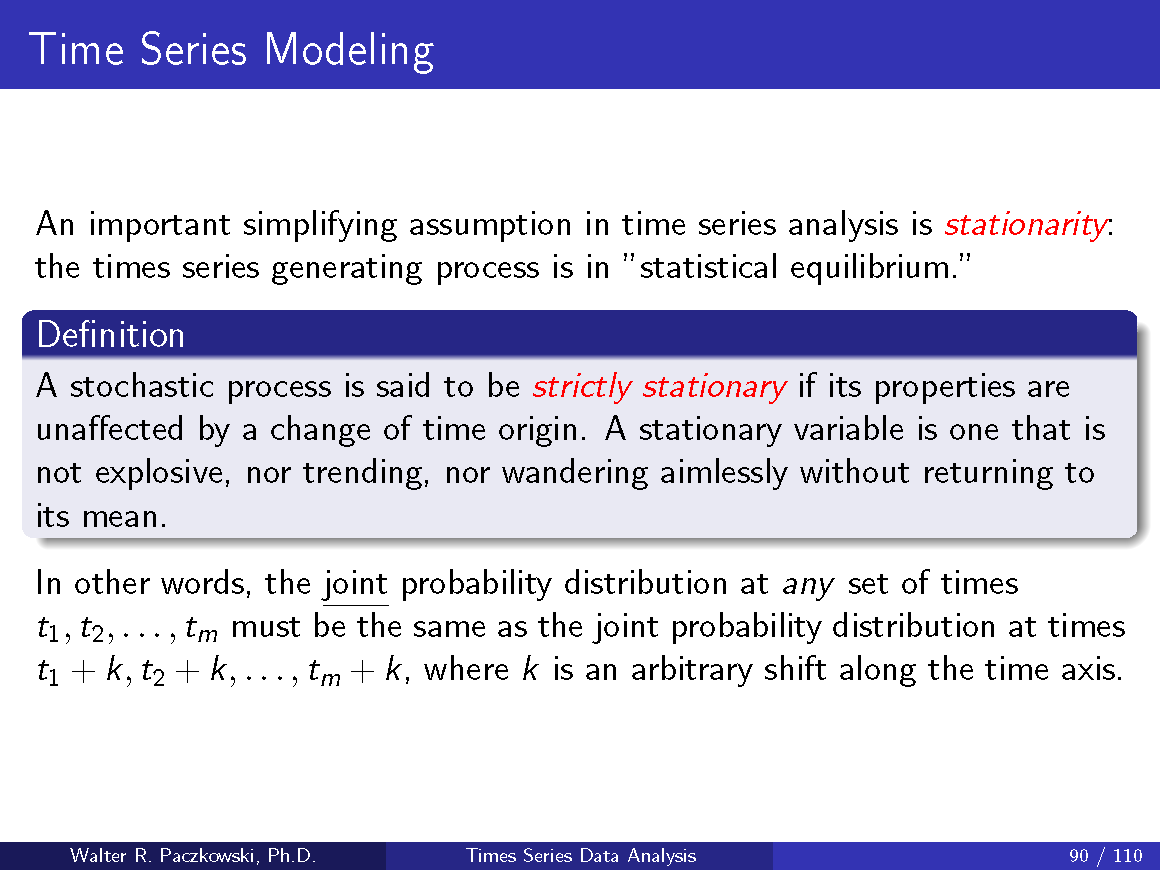

In [107]:
slide( '090' )

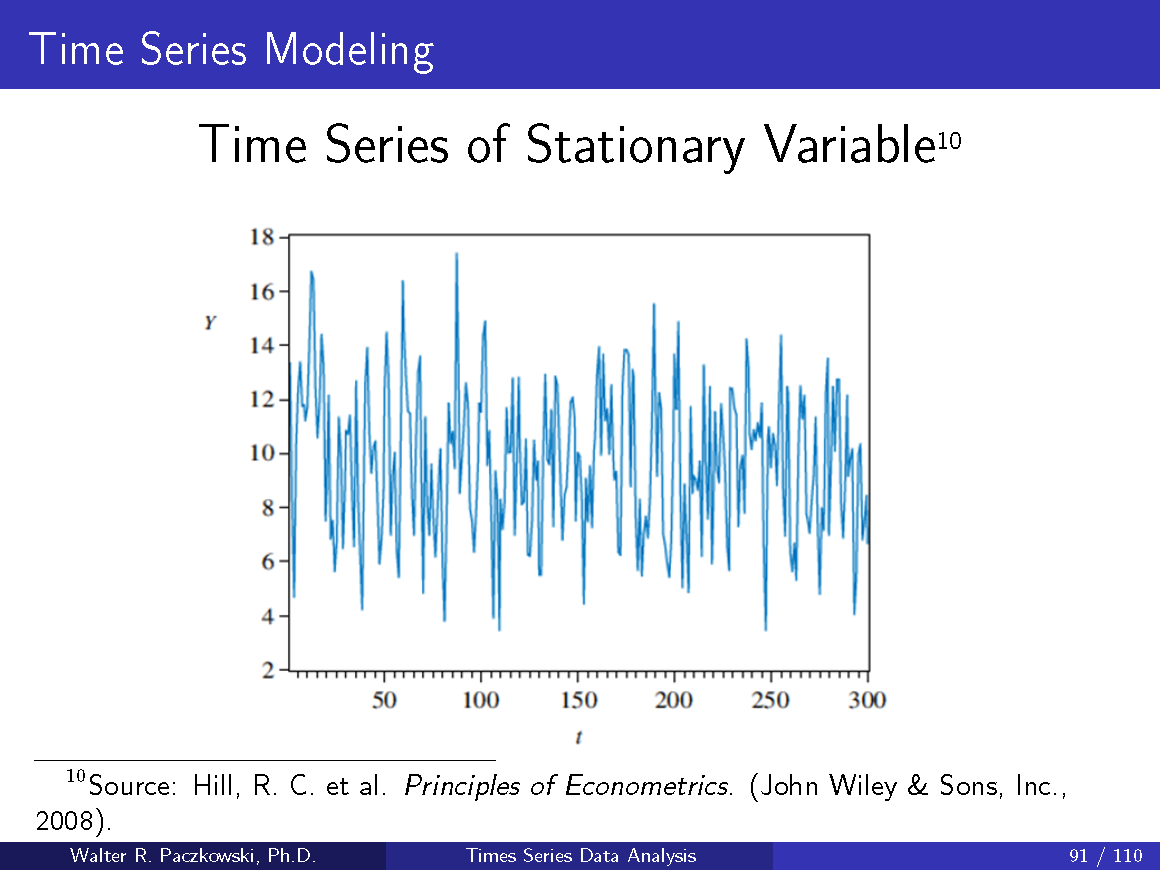

In [108]:
slide( '091' )

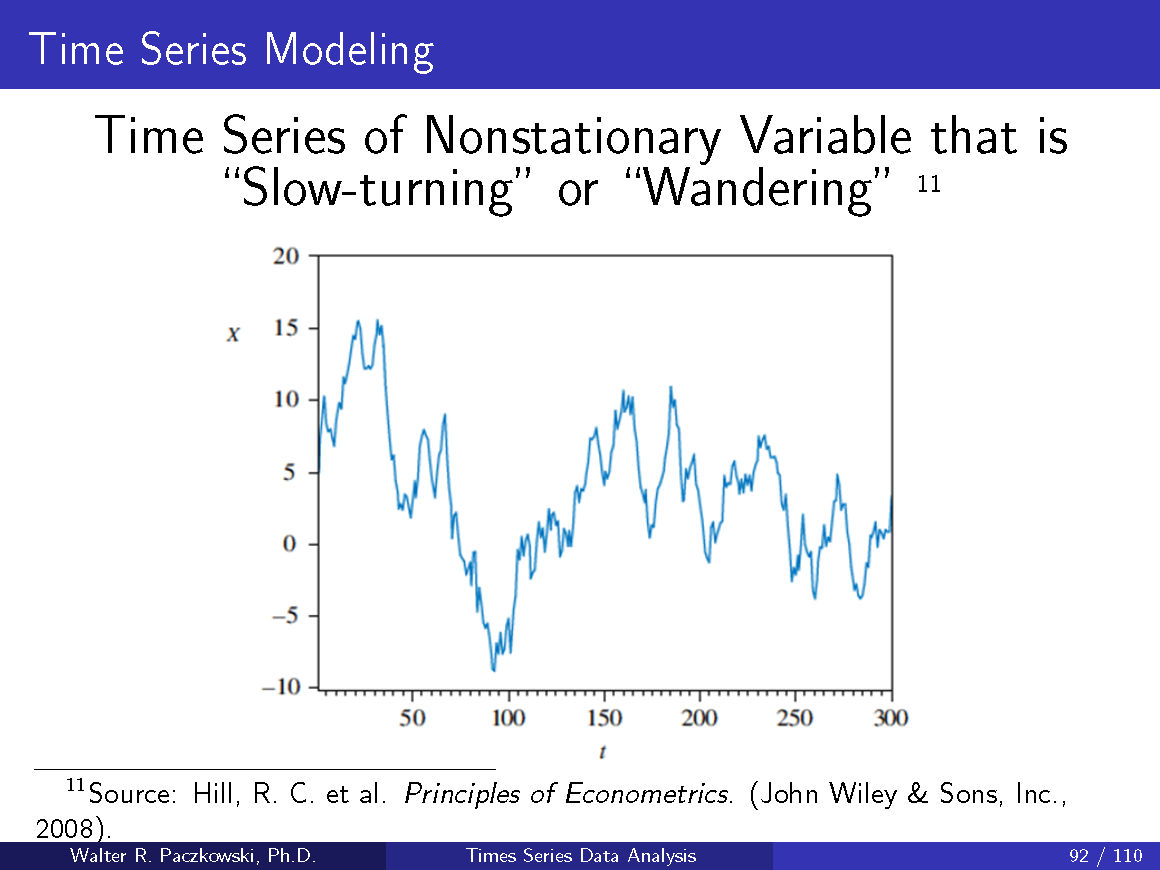

In [109]:
slide( '092' )

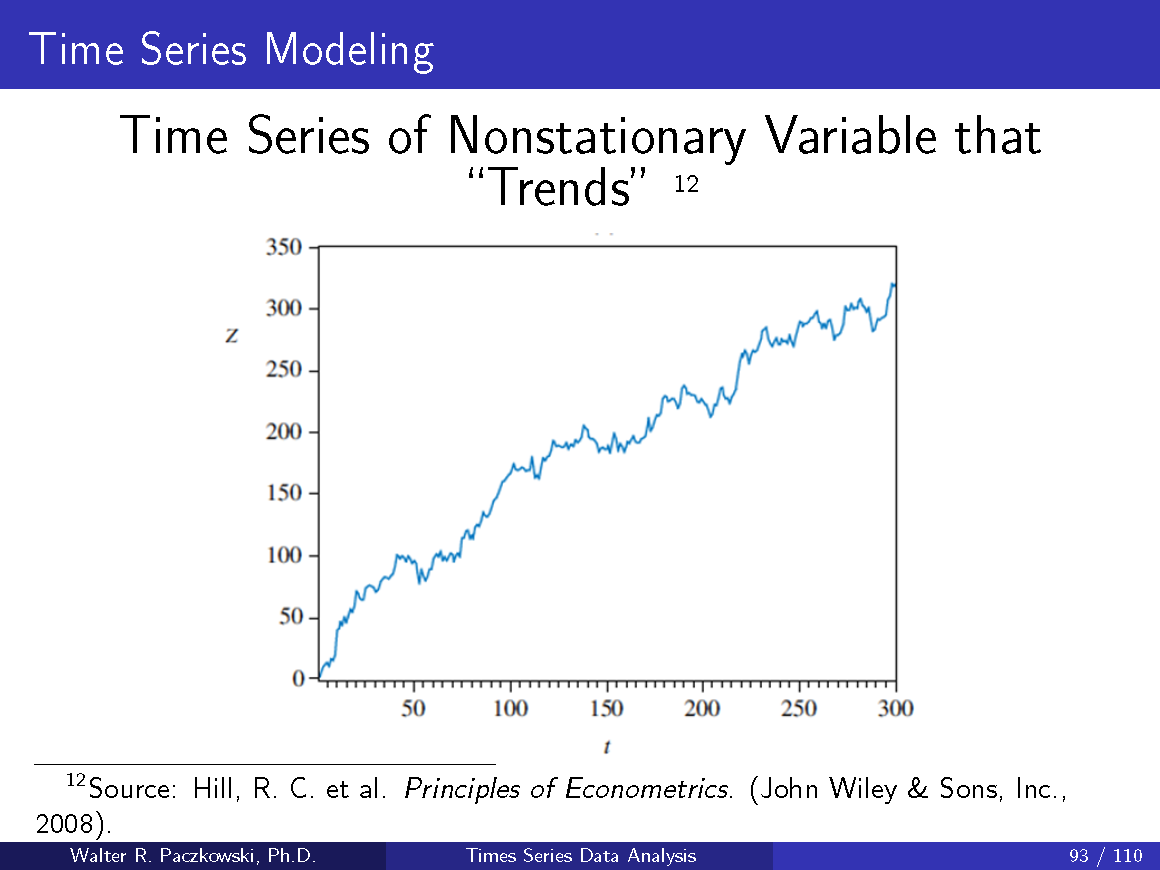

In [110]:
slide( '093' )

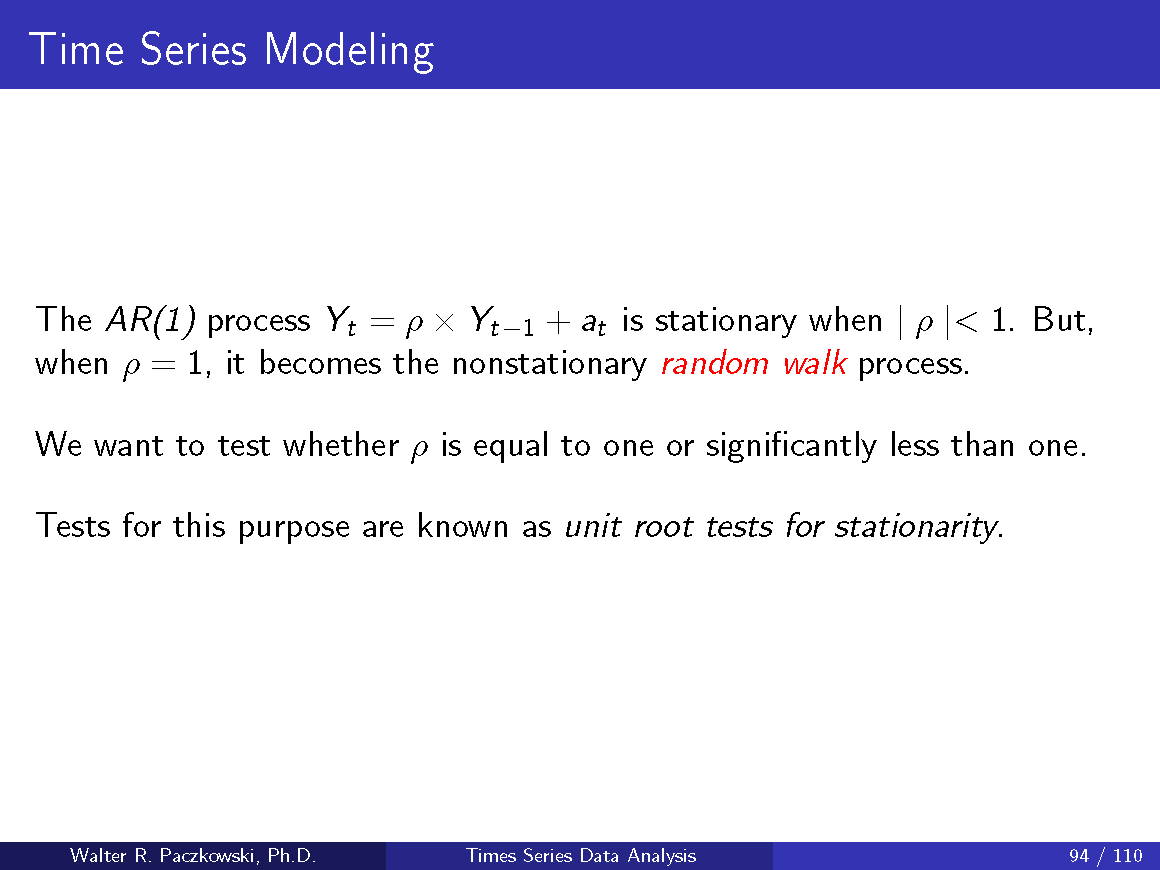

In [111]:
slide( '094' )

### Simulated Data to Illustrate Stationarity

[Back to Contents](#Contents)

#### Example A

[Back to Contents](#Contents)

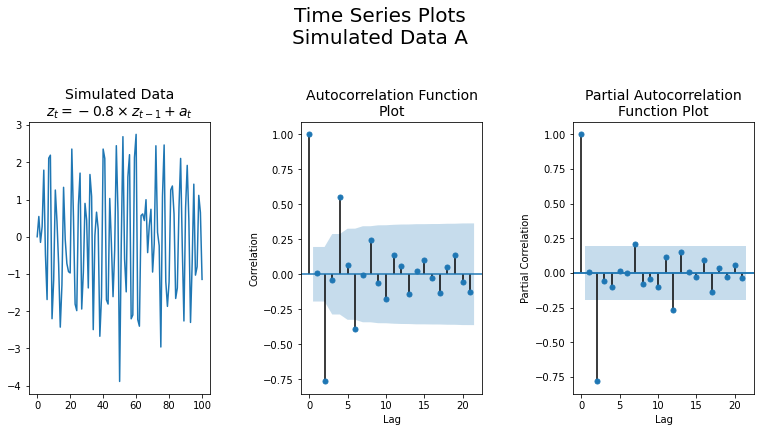

In [112]:
##
## Set plotting parameters
##
fig, ( ax1, ax2, ax3 ) = plt.subplots( nrows=1, ncols=3, figsize = format_fig )
plt.subplots_adjust( wspace = 0.5 )
##
np.random.seed( 42 )
##
## Generate random series
##
n = 100
z = [ 0 ]
a = np.random.normal( 0, np.sqrt( 1.2 ), n )
for t in range( 0, n ):
    x = -0.8 * z[ t - 1 ] + a[ t ] 
    z.append( x ) 
df_z = pd.DataFrame( z )
df_z.rename( columns = { df_z.columns[ 0 ]: "X" }, inplace = True )
##
## Plot series
##
df_z.plot( ax = ax1, legend = False )
ax1.set_title( 'Simulated Data\n$z_t = -0.8 \\times z_{t - 1} + a_t$', fontsize = 14 )
plt.axhline( y = 0 );
##
plot_acf( df_z, ax = ax2  )
ax2.set_title( 'Autocorrelation Function\nPlot', fontsize = 14 )
ax2.set( ylabel = 'Correlation', xlabel = 'Lag' )
##
plot_pacf( df_z, ax = ax3 )
ax3.set_title( 'Partial Autocorrelation\nFunction Plot', fontsize = 14 )
ax3.set( ylabel = 'Partial Correlation', xlabel = 'Lag' )
##
fig.suptitle( 'Time Series Plots\nSimulated Data A', y = 1.2, fontsize = font_title );

#### Example B

[Back to Contents](#Contents)

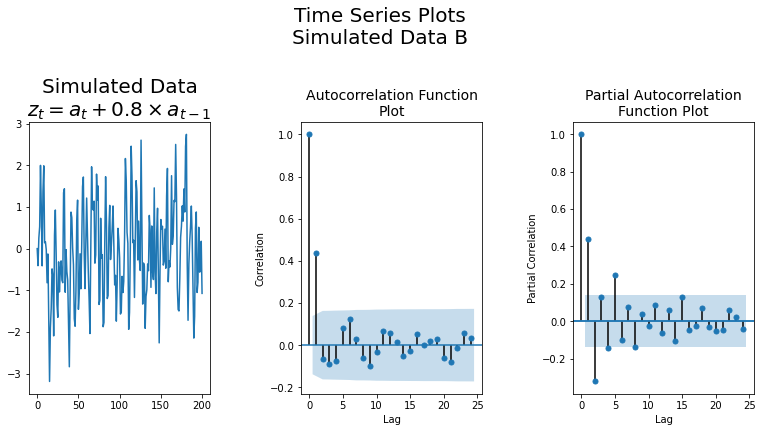

In [113]:
##
## Set plotting parameters
##
fig, ( ax1, ax2, ax3 ) = plt.subplots( nrows=1, ncols=3, figsize = format_fig )
plt.subplots_adjust( wspace = 0.5 )
##
np.random.seed( 42 )
##
## Generate random series
##
n = 200
z = [ 0 ]
a = np.random.normal( 0, np.sqrt( 0.96 ), n )
for i in range( n ):
    x = a[ i ] + 0.8 * a[ i - 1 ] 
    z.append( x ) 
df_z = pd.DataFrame( z )
##
## Plot series
##
df_z.plot( ax = ax1, legend = False )
ax1.set_title( 'Simulated Data\n$z_t = a_t + 0.8 \\times a_{t - 1}$', fontsize = font_title )
plt.axhline( y = 0 );
##
plot_acf( df_z, ax = ax2  )
ax2.set_title( 'Autocorrelation Function\nPlot', fontsize = 14 )
ax2.set( ylabel = 'Correlation', xlabel = 'Lag' )
##
plot_pacf( df_z, ax = ax3 )
ax3.set_title( 'Partial Autocorrelation\nFunction Plot', fontsize = 14 )
ax3.set( ylabel = 'Partial Correlation', xlabel = 'Lag' )
##
fig.suptitle( 'Time Series Plots\nSimulated Data B', y = 1.2, fontsize = font_title );

#### Example C

[Back to Contents](#Contents)

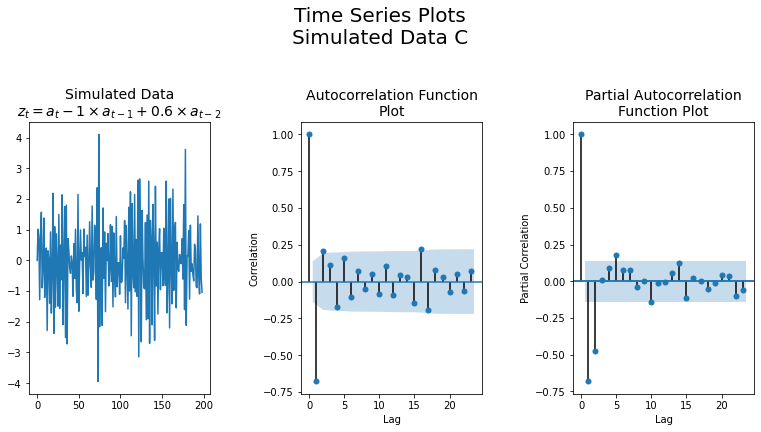

In [114]:
##
## Set plotting parameters
##
fig, ( ax1, ax2, ax3 ) = plt.subplots( nrows=1, ncols=3, figsize = format_fig )
plt.subplots_adjust( wspace = 0.5 )
##
np.random.seed( 42 )
##
## Generate random series
##
n = 200
z = [ 0 ]
a = np.random.normal( 0, np.sqrt( 0.88 ), n )
for t in range( 2, n ):
    x = a[ t ] - 1 * a[ t - 1 ] + 0.6 * a[ t - 2 ]
    z.append( x ) 
df_z = pd.DataFrame( z )
##
## Plot series
##
df_z.plot( ax = ax1, legend = False )
ax1.set_title( 'Simulated Data\n$z_t = a_t - 1 \\times a_{t - 1} + 0.6 \\times a_{t - 2}$', fontsize = 14 )
plt.axhline( y = 0 );
##
plot_acf( df_z, ax = ax2  )
ax2.set_title( 'Autocorrelation Function\nPlot', fontsize = 14 )
ax2.set( ylabel = 'Correlation', xlabel = 'Lag' )
##
plot_pacf( df_z, ax = ax3 )
ax3.set_title( 'Partial Autocorrelation\nFunction Plot', fontsize = 14 )
ax3.set( ylabel = 'Partial Correlation', xlabel = 'Lag' )
##
fig.suptitle( 'Time Series Plots\nSimulated Data C', y = 1.2, fontsize = font_title );

### Stationarity Tests

[Back to Contents](#Contents)

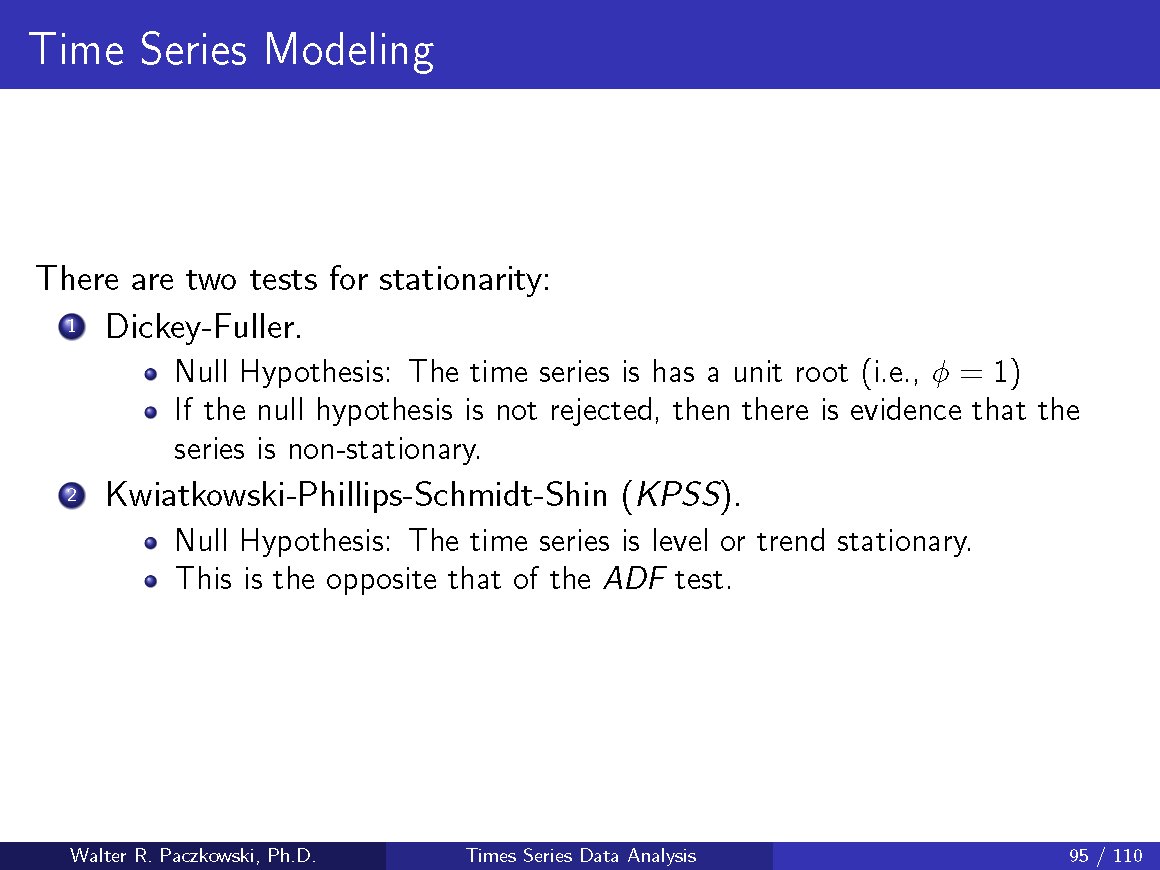

In [115]:
slide( '095' )

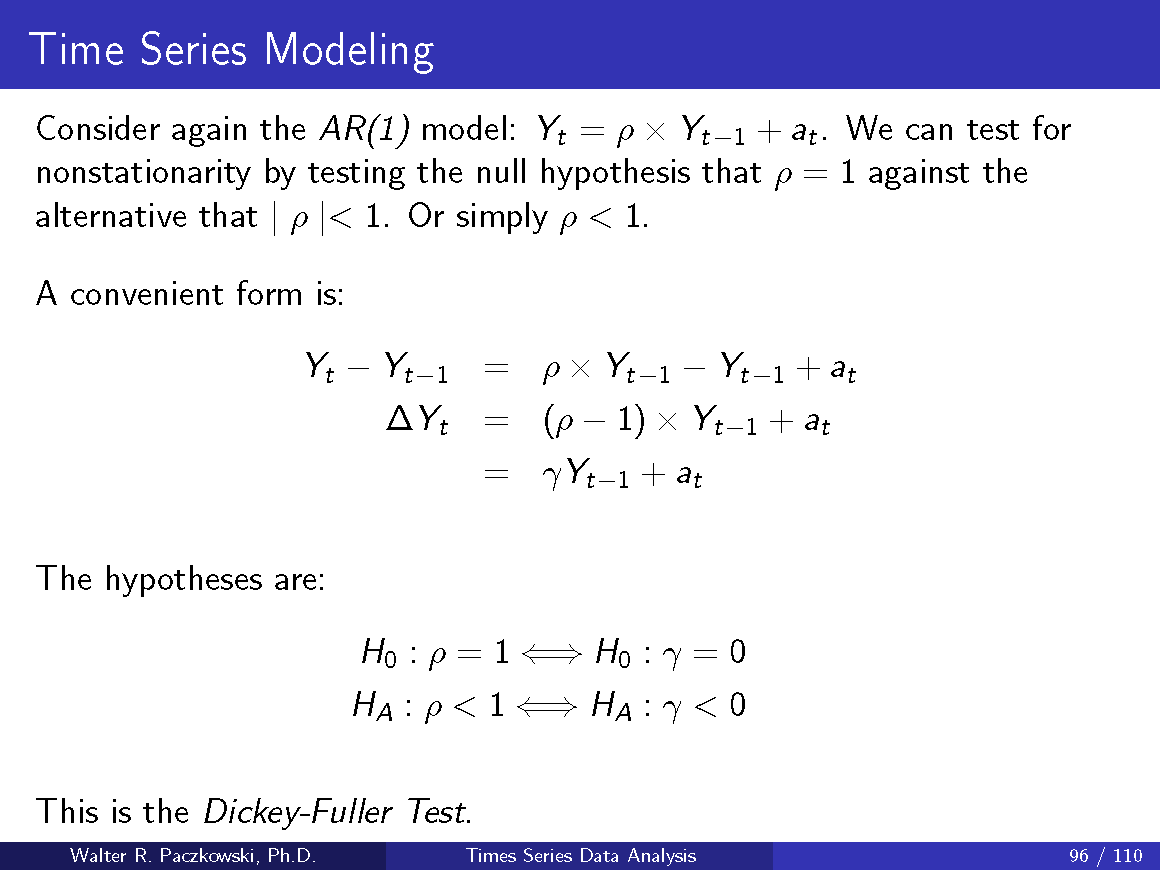

In [116]:
slide( '096' )

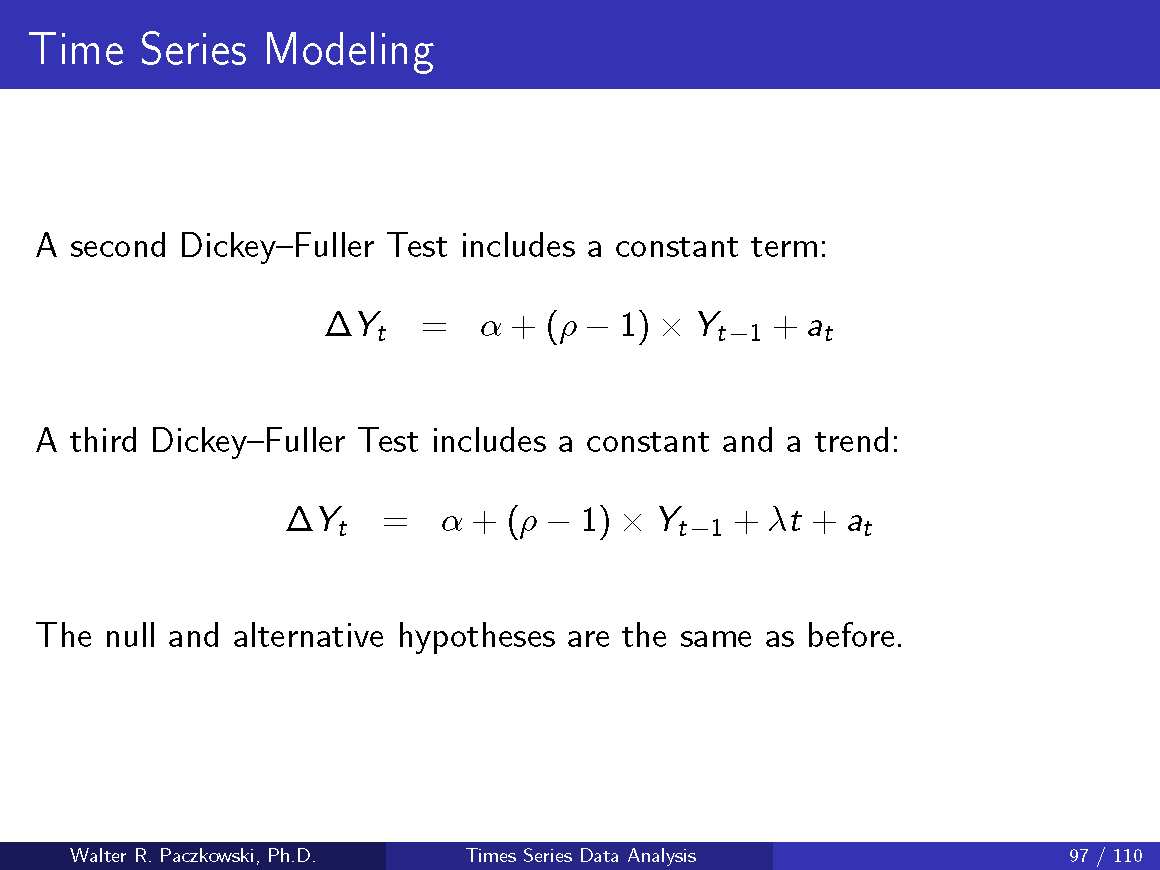

In [117]:
slide( '097' )

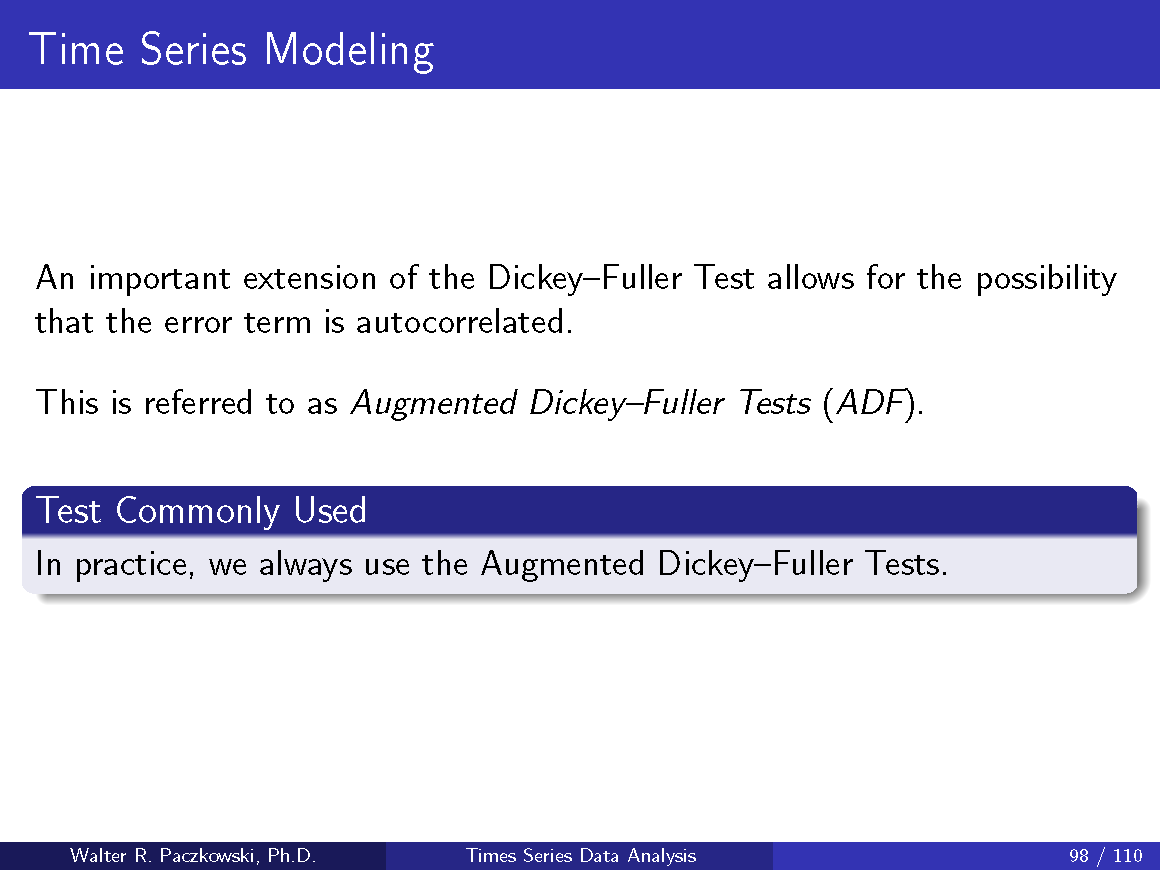

In [118]:
slide( '098' )

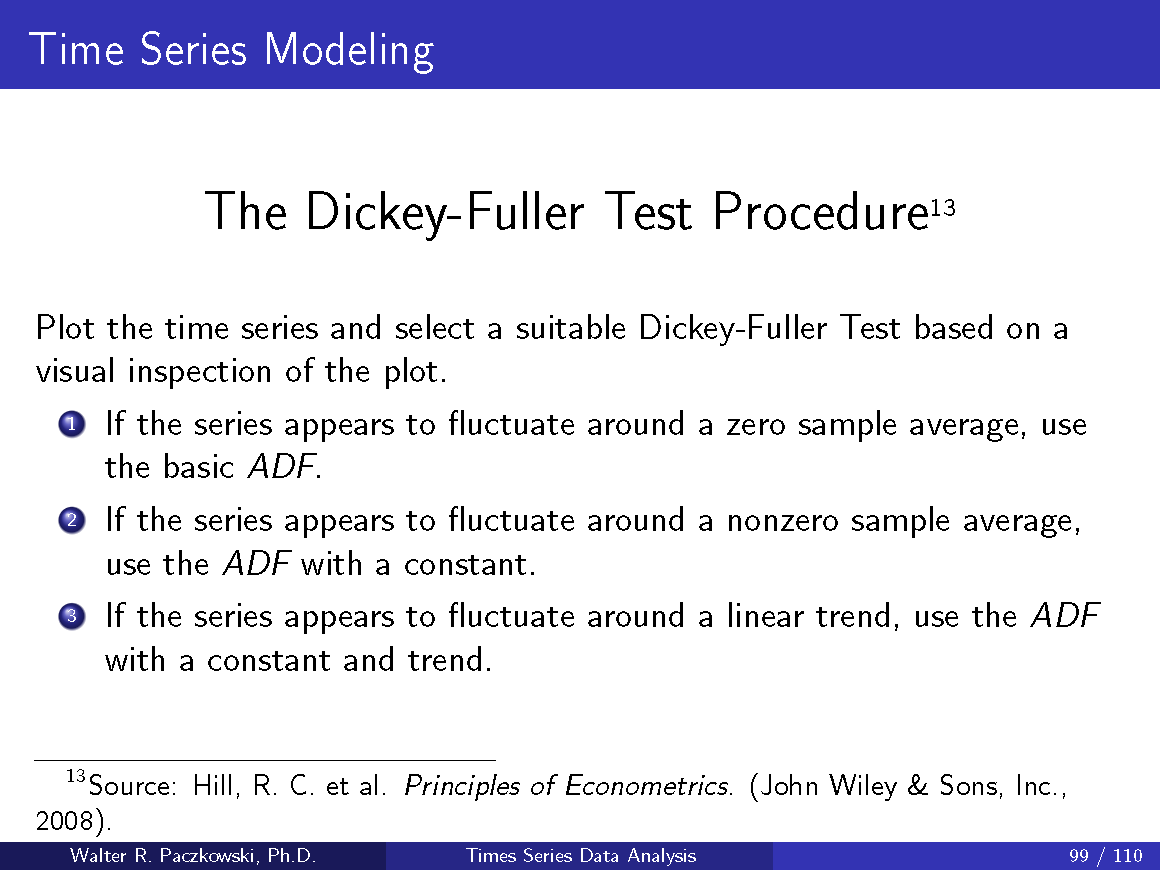

In [119]:
slide( '099' )

### Tesing for Stationarity: Augmented Dickey-Fuller Test

[Back to Contents](#Contents)

> $H_0$: Unit root (Time series is non-stationary).
>
> $H_A$: No unit root (Time series is stationary).

The *Augmented Dickey-Fuller Test* requires a parameter to specify the type: no constant/trend, constant, trend, constant \& trend:

| Model Type                               | Parameter Setting  |
|------------------------------------------|--------------------|
| Constant only (default)                  | regression = 'c'   |
| Constant and trend                       | regression = 'ct'  |
| Constant, and linear and quadratic trend | regression = 'ctt' |
| No constant, no trend                    | regression = 'nc'  |

In [120]:
##
## Augmented Dickey-Fuller Test
## Case II: Constant
## Undifferenced series
##
adf, pval, lags, obs, crit, icbest = adfuller( df_rw.RW_wod, regression = 'c' )
##
## Report Results
##
print( f'ADF Statistic: {adf:.3f}' )
print('Critical Values:')
for key, value in crit.items():
    print( f'\t{key}: {value}' )
##
print( f'p-value: {pval:.3f}' )
if pval > 0.05:
    boldprt( '\tConclusion: Reject Null Hypothesis; Series is Stationary' )
else:
    boldprt( '\tConclusion: Do Not Reject Null Hypothesis; Series is Non-Stationary' )

ADF Statistic: -1.267
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
p-value: 0.644
	Conclusion: Reject Null Hypothesis; Series is Stationary


In [121]:
##
## Augmented Dickey-Fuller Test
## Case II: Constant
## Differenced series
##
## Remove NaN
##
x = df_rw.RW_wod_diff
x.dropna( inplace = True )
##
adf, pval, lags, obs, crit, icbest = adfuller( x, regression = 'c' )
##
## Report Results
##
boldprt( f'ADF Statistic: {adf:.3f}' )
boldprt('Critical Values:')
for key, value in crit.items():
    print( f'\t{key}: {value}' )
##
print( f'p-value: {pval:.3f}' )
if pval > 0.05:
    boldprt( '\tConclusion: Reject Null Hypothesis; Series is Stationary' )
else:
    boldprt( '\tConclusion: Do Not Reject Null Hypothesis; Series is Non-Stationary' )

ADF Statistic: -10.031
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
p-value: 0.000
	Conclusion: Do Not Reject Null Hypothesis; Series is Non-Stationary


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise V.1

[Back to Contents](#Contents)

Do an Augmented Dickey-Fuller Test, without a constant or trend, on the last simulated series.  The DataFrame is *df_z*.

[See Solution](#Solution-V.1)

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


### Estimating an AR(1) Model

[Back to Contents](#Contents)

Use the Pinkham sales data.  We will look at an AR(1).  So a model is:

\begin{eqnarray*}
    Y_t = \phi_1 \times Y_{t - 1} + a_t
\end{eqnarray*}

In [122]:
##
## Copy DataFrame and set parameters
##
## Do autoreg -- see Best Practices package loading for function
##
mod = AutoReg( df_pink.sales, 1 )
reg_ar1 = mod.fit()
display( reg_ar1.summary() )

C:\Users\walt\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                   54
Model:                     AutoReg(1)   Log Likelihood                -362.935
Method:               Conditional MLE   S.D. of innovations            227.896
Date:                Wed, 17 Mar 2021   AIC                             10.971
Time:                        13:08:57   BIC                             11.083
Sample:                    12-31-1908   HQIC                            11.014
                         - 12-31-1960                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    148.3032     96.859      1.531      0.126     -41.537     338.144
sales.L1       0.9222      0.050     18.509      0.000       0.825       1.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0844           +0.0000j            1.0844            0.0000
-----------------------------------------------------------------------------
"""

### Forecasting with the AR(1) Model

[Back to Contents](#Contents)


In [123]:
##
## Copy DataFrame and set parameters
##
tmp = df_pink.copy()
tmp.reset_index( inplace = True )
T = len( tmp )   ## Length of history
h = 5            ## steps ahead forecast
##
## Do autoreg -- see Best Practices package loading for function
##
mod = AutoReg( tmp.sales, 1 )
reg_ar1 = mod.fit()
display( reg_ar1.summary() )
##
## Set forecast range
##
forecast_index = pd.period_range( 1961, freq = 'Y', periods = h )
fct = reg_ar1.predict( start = T, end = T + h, dynamic = False )
##
## Build DataFrame of history and forecast
##
data = { 'index':pd.period_range( 1961, freq = 'Y', periods = h + 1 ), 'sales':fct }
junk = pd.DataFrame( data )
tmp = tmp.append( junk )
tmp.set_index( 'index', inplace = True )
tmp.drop( columns = [ 'advertising', 'decade' ] , inplace = True )
tmp.tail( n = 7 ).style.set_caption( 'Sales History and Forecast AR(1)\n' + str( h ) + ' Steps Ahead' ).\
    set_table_styles( tbl_styles )

C:\Users\walt\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                   54
Model:                     AutoReg(1)   Log Likelihood                -362.935
Method:               Conditional MLE   S.D. of innovations            227.896
Date:                Wed, 17 Mar 2021   AIC                             10.971
Time:                        13:08:58   BIC                             11.083
Sample:                             1   HQIC                            11.014
                                   54                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    148.3032     96.859      1.531      0.126     -41.537     338.144
sales.L1       0.9222      0.050     18.509      0.000       0.825       1.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0844           +0.0000j            1.0844            0.0000
-----------------------------------------------------------------------------
"""

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise V.2

[Back to Contents](#Contents)

Redo the Pinkham forecast with an AR(2) model.

[See Solution](#Solution-V.2)

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


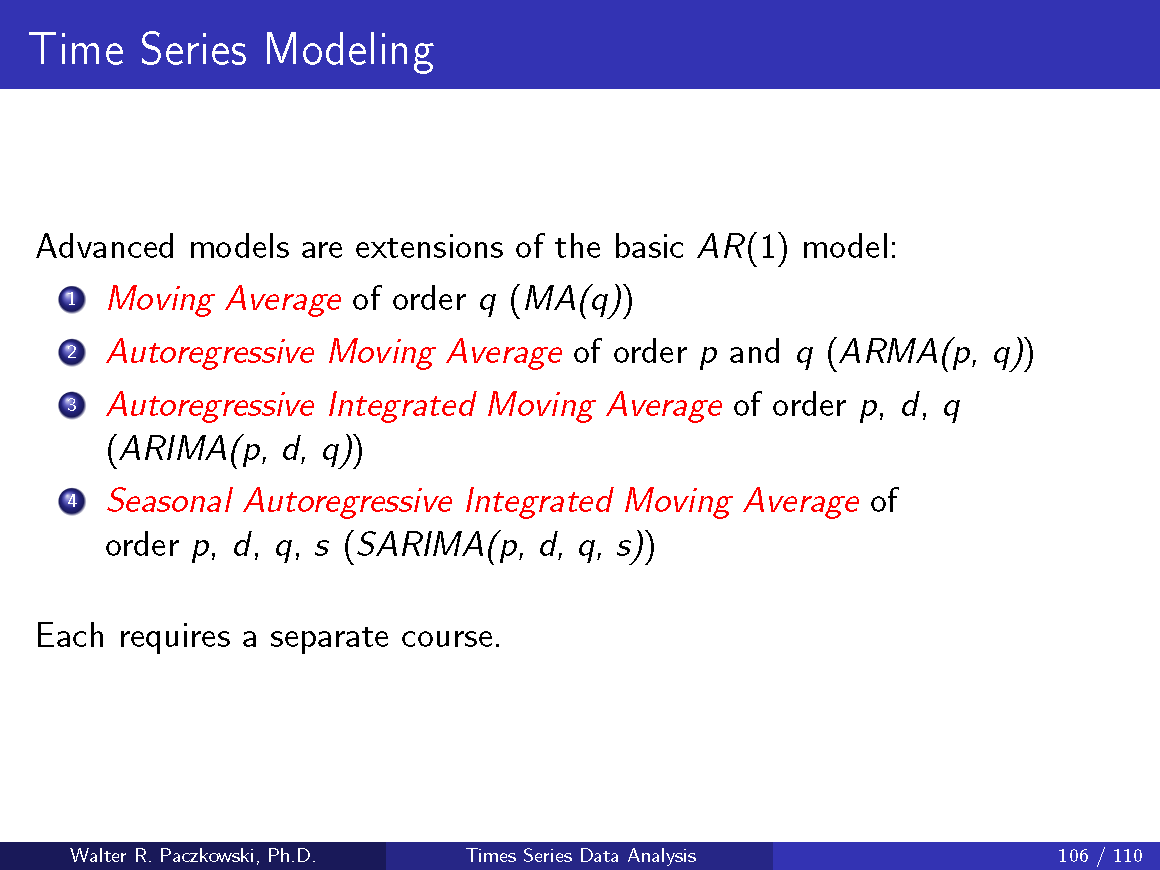

In [124]:
slide( '106' )

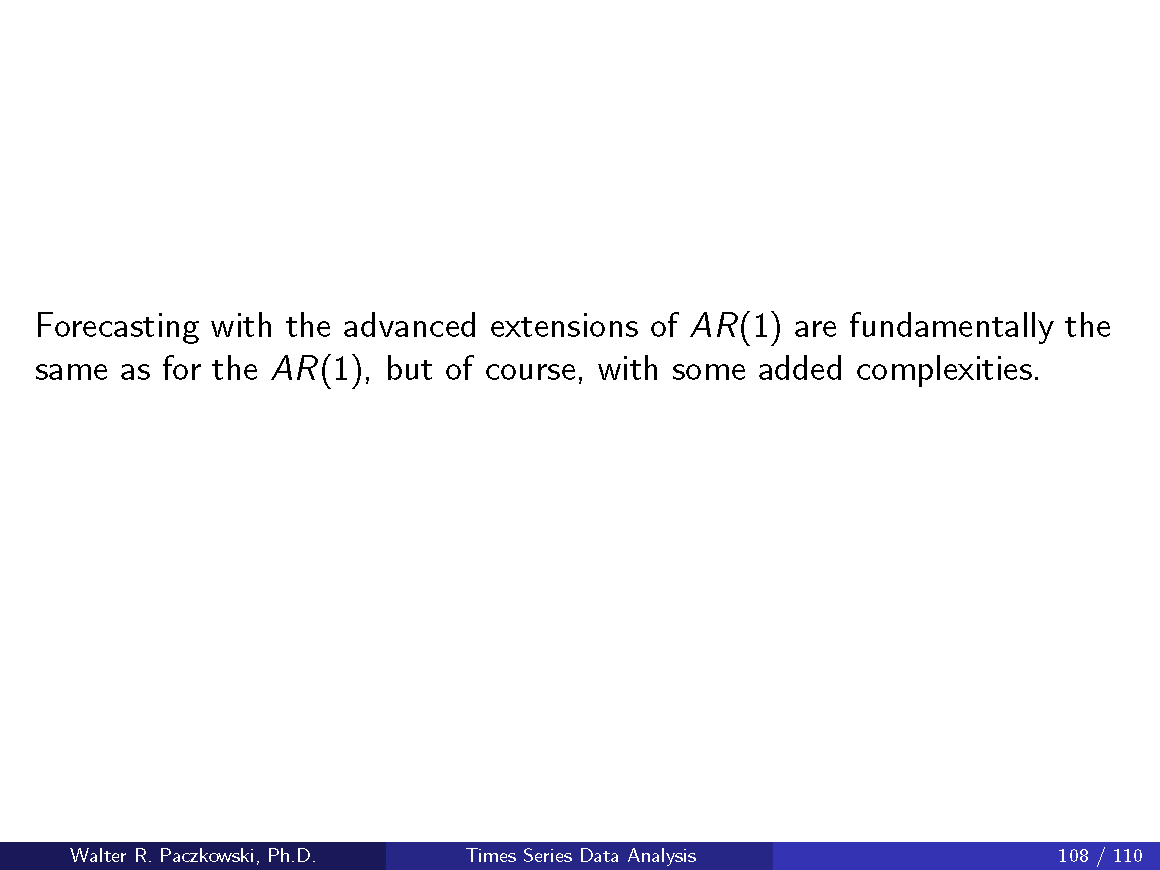

In [125]:
slide( '108' )

## Summary and Wrap-up 

[Back to Contents](#Contents)

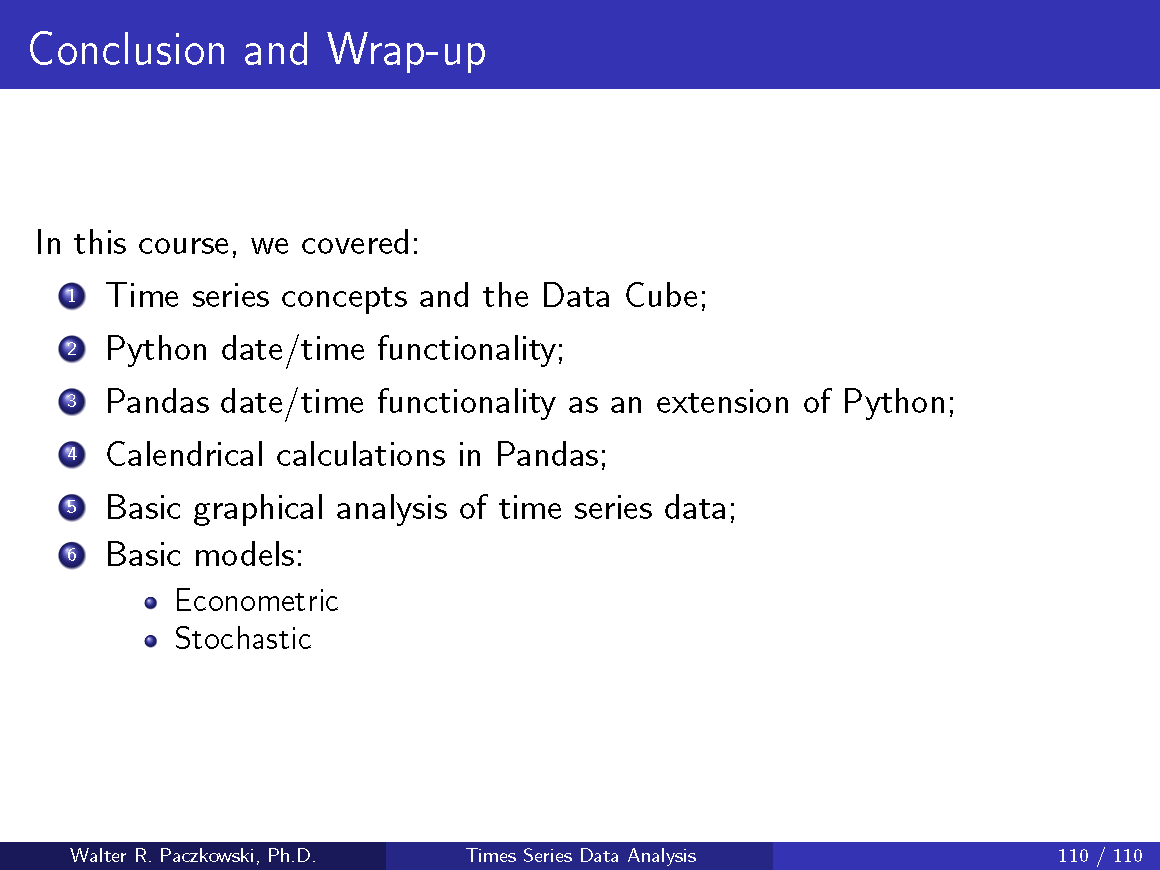

In [126]:
slide( '110' )

<div class="alert alert-info" role="alert">
    
<font color = black>Contact Information
---------------------------------------
    
[Back to Contents](#Contents)  
    
</div>

If you have any questions after this course, please do not hesitate to contact me.

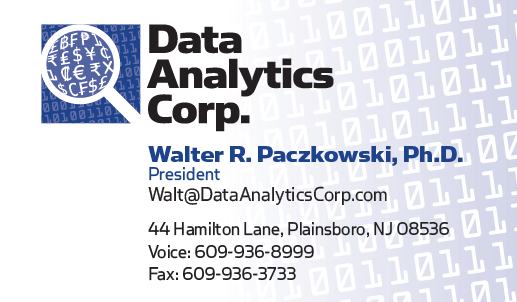

<div class="alert alert-info" role="alert">
    
<font color = black>Appendix
--------------------------------------
    
[Back to Contents](#Contents)  
    
</div>

1. [Python date/time Packages](#Python-date/time-Packages)
2. [Unix Time and the Epoch](#Unix-Time-and-the-Epoch)
3. [Working with Dates and Times in Python](#Working-with-Dates-and-Times-in-Python)
4. Exercises
    1. [Exercise I.1](#Exercise-I.1)
    2. [Exercise I.2](#Exercise-I.2)
    3. [Exercise I.3](#Exercise-I.3)    
5. [Advanced Time Series Models](#Advanced-Time-Series-Models)
6. [Data](#Data)
    1. [Simulated Data](#Simulated-Data)
    2. [Pinkham Data](#Pinkham-Data)
    3. [Autos Production Data](#Autos-Production-Data)
    4. [Ice Cream Data](#Ice-Cream-Data)

## Python date/time Packages

[Back to Contents](#Contents)

It's best to use the Pandas datetime functions but occasionally you will need the Python tools.

Python has three date/time packages:

>1. time
>2. date
>3. datetime

The *datetime* package is easier to use and more comprehensive.  See [vanderPlas](https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057/ref=sr_1_3?dchild=1&keywords=Python+Data+Science+Handbook&qid=1606315305&sr=8-3) book.


## Unix Time and the Epoch

[Back to Contents](#Contents)

Time is based on the Unix *epoch*: January 1, 1970 at 00:00:00

Computers keep track of time using seconds since the epoch: *Unix Epoch Time* which is 1/1/1970 at 00:00:00 UTC. *UTC* is *Coordinated Universal Time* and refers to the time at a longitude of 0°.  *UTC* is formerly known as *Greenwich Mean Time*, or *GMT*. The acronym *UTC* is not a mistake but a compromise between English and French. 

In [127]:
##
## Use time.gmtime() to get your system’s epoch
##
import time
time.gmtime( 0 )

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

**_Code Explanation_**

>1. The *time* package is different from what is loaded from the *datetime* package in the *Best Practices* section.  It is needed solely to get the GM time and will be overwritten below.  There is just an unfortunate duplication of names which creates conflicts.
>2. tm_wday = 3 is for day of week: range [0, 6] with Monday = 0.

In [128]:
##
## Number of seconds since Unix epoch
##
boldprt( 'Number of seconds since epoch:' )
print( f'\t{time.time()}' )

Number of seconds since epoch:
	1616000938.063491


## Working with Dates and Times in Python

[Back to Contents](#Contents)

In [129]:
##
## Reimport time module from datetime package to overwrite time from above
##
from datetime import time

**_Code Explanation_**

This overwrites the *time* package and restores the *time* module from the *datetime* package.

In [130]:
##
## Get current date and time with Python -- flexible
##
## Use date variables
##
dt = datetime( year = 2021, month = 1, day = 4 )
boldprt( 'The date is:' )
print( f'\t{dt}' )
##
## Parse a date string
##
dt = parser.parse( 'January 4, 2021' )
boldprt( 'The date from a string is:' )
print( f'\t{dt}' )


The date is:
	2021-01-04 00:00:00
The date from a string is:
	2021-01-04 00:00:00


**_Code Explanation_**

The *parser* is in the *dateutil* package.  See the package loading section in *Best Practices* above.

In [131]:
##
## Illustrate use of the three packages
##
## Get a date 
##
from datetime import date
dt = date( year = 2021, month = 1, day = 4 )
boldprt( 'The date is:' )
print( f'\t{dt}' )
##
## Get a time 
##
tm = time( hour = 12, minute = 1, second = 30 )
boldprt( 'The time is:' )
print( f'\t{tm}' )
##
## Get a date and time 
##
dtm = datetime( year = 2021, month = 1, day = 4, hour = 12, minute = 1, second = 30 )
boldprt( 'The datetime is:' )
print( f'\t{dtm}' )

The date is:
	2021-01-04
The time is:
	12:01:30
The datetime is:
	2021-01-04 12:01:30


In [132]:
##
## Parsing date-time input strings with strptime
##
date_str = '01/04/2021'
date_fmt = '%m/%d/%Y'
##
boldprt( 'Parsed data string' )
print( f'\t{datetime.strptime( date_str, date_fmt )}' )

Parsed data string
	2021-01-04 00:00:00


The functions *strftime* and *strptime* use the date/time mini-language for output and input, respectively.  The *strptime* is used for parsing date-time inputs.  The mini-langauge is the same for both functions.

| Code  | Meaning                                              | Example           |
|-------|------------------------------------------------------|-------------------|
| %a    | Weekday as locale’s abbreviated name                 | Mon               |
| %A    | Weekday as locale’s full name                        | Monday            |
| %d	| Day of the month as a zero-padded decimal number     | 30                |
| %b	| Month as locale’s abbreviated name                   | Sep               |
| %B	| Month as locale’s full name                          | September         |
| %m	| Month as a zero-padded decimal number                | 09                |
| %-m	| Month as a decimal number (Platform specific)        | 9                 |
| %y	| Year without century as a zero-padded decimal number | 21                |
| %Y	| Year with century as a decimal number                | 2021              |
| %H    | Hour (24-hour clock) as a zero-padded decimal number | 00, 01, ..., 23   |
| %I    | Hour (12-hour clock) as a zero-padded decimal number | 01, 02, ..., 12   |
| %M    | Minute as a zero-padded decimal number               | 00, 01, ..., 59   |
| %S    | Second as a zero-padded decimal number               | 00, 01, ..., 59   |

Example: '%m/%d/%Y' or '%m-%d-%Y'

See [here](https://strftime.org/) for documentation.

In [133]:
##
## Get current date and time
##
today = date.today()
boldprt( 'Today is:' )
print( f'\t{today}' )
##
## Another way
##
now = datetime.now()
boldprt( 'It is now:' )
print( f'\t{now}' )
##
## More detail
##
current_time = time( now.hour, now.minute, now.second )
boldprt( 'The current time is:' )
print( f'\t{current_time}' )
##
## Use format with strftime for printing
##
current_time_fmt = now.strftime( "%H:%M:%S" )   ## strftime is a string format function
boldprt( 'The current time is:' )
print( f'\t{current_time_fmt}' )
##
## Another way
##
boldprt( 'Date and time combined:' )
print( f'\t{datetime.combine( today, current_time )}' )


Today is:
	2021-03-17
It is now:
	2021-03-17 13:08:58.102387
The current time is:
	13:08:58
The current time is:
	13:08:58
Date and time combined:
	2021-03-17 13:08:58


In [134]:
##
## Using strftime for differnt date-time formats
##
today = date.today()
##
boldprt( 'U.S. calendar format:' )
print( f'\t{today.strftime( "%B %d, %Y" )}' )
##
boldprt( 'U.S. format:' )
print( f'\t{today.strftime( "%m-%d-%Y" )} or {today.strftime( "%m/%d/%Y" )}' )
##
boldprt( 'European format:' )
print( f'\t{today.strftime( "%d-%m-%Y" )}' )
##
boldprt( 'International Standardization Organization (ISO) format:' )
print( f'\t{today.strftime( "%Y-%m-%d" )}' )

U.S. calendar format:
	March 17, 2021
U.S. format:
	03-17-2021 or 03/17/2021
European format:
	17-03-2021
International Standardization Organization (ISO) format:
	2021-03-17


**_Note_**

The *ISO* standard is in most-to-least-significant order: year, month, day, hour, minute, second.

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


#### Background

The *Y38* problem is coming! This is when 32-bit computers will be unable to handle the number of seconds since the Unix Epoch merely because of the way data are stored in 32-bit processors.  The implication is not that computers will stop operating as was feared with *Y2K*, but that computer clocks will report erroneous dates and times.  The exact date and time when this will happen is 03:14:07 UTC on 19 January 2038.  See [here](https://en.wikipedia.org/wiki/Year_2038_problem#:~:text=The%20Year%202038%20problem%20) to learn more about *Y38*. 

###  Exercise I.1 

[Back to Contents](#Contents)

Create a string of the full date and time as stated above which are in *ISO* format above.  Display just the date, no time, in your local format from this string.  

[See Solution](#Solution-I.1)

In [135]:
##
## Enter code here
##


###  Exercise I.2 

[Back to Contents](#Contents)

Write a statement to determine the day-of-the-week that *Y38* will occur.

[See Solution](#Solution-I.2)

In [136]:
##
## Enter code here
##


###  Exercise I.3 

[Back to Contents](#Contents)

Write a statement to display the entire date when *Y38* will occur as "DOW, MONTH DAY, YEAR at HOUR:MINUTE:SECOND".  Example display format: *Thursday, November 26, 2020 at 01:15:25*.

[See Solution](#Solution-I.3)

In [137]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>


## Advanced Time Series Models

[Back to Appendix](#Appendix)

Expand beyond the AR(1).  

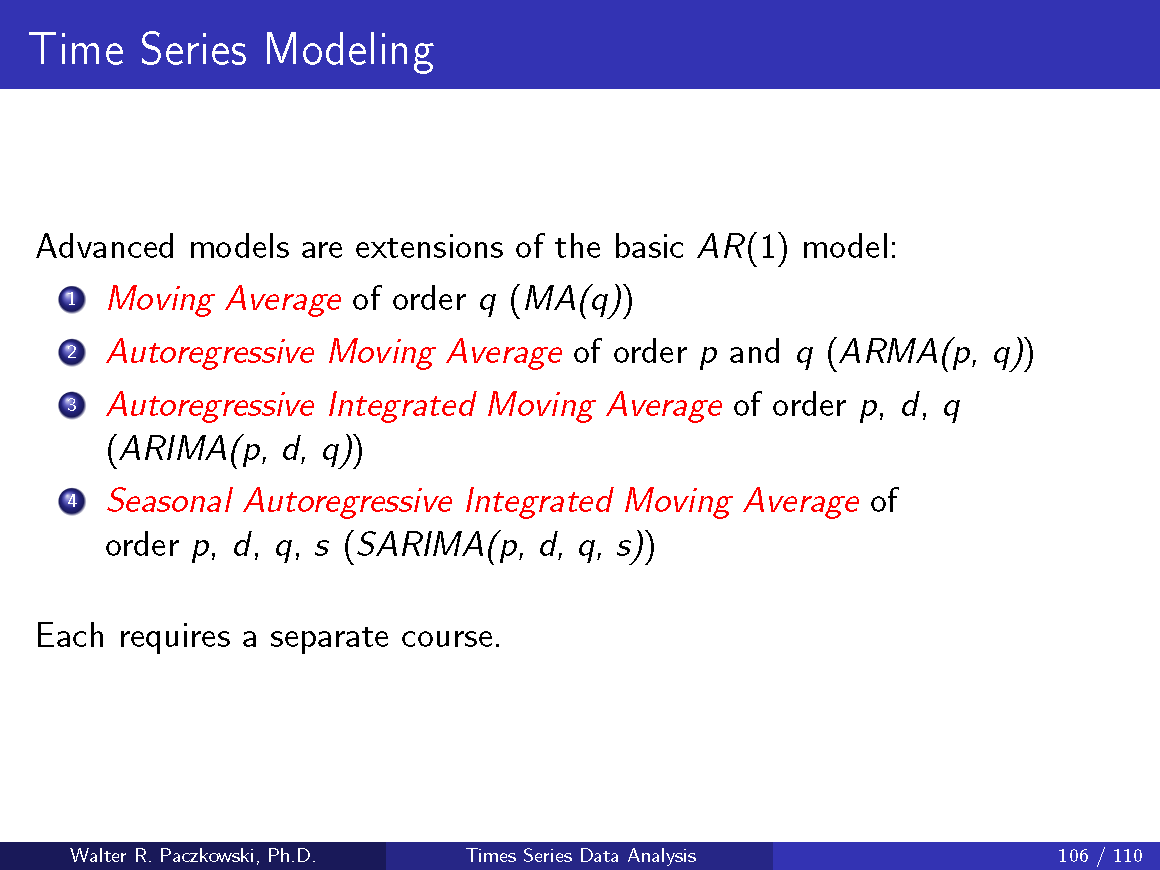

In [138]:
slide( '106' )

## Data

[Back to Appendix](#Appendix)


Some additional background on data.

### Simulated Data

[Back to Appendix](#Appendix)

This simulator is based on:

> https://www.kaggle.com/namgalielei/time-series-characteristics/code#3.-Seasonality.

I have since modified and enhanced the steps outlined in this link.

The base series is stationary with p-value = 0.0000


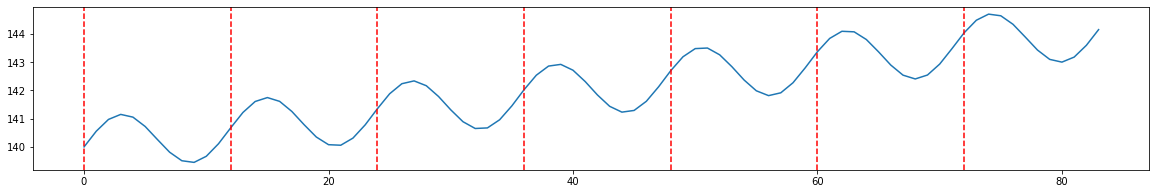

In [139]:
##
## Data Simulator
##
## Set random seed
##
np.random.random_state  = 42
##
## Set model parameters
##
ar2 = np.array([1, 0.33])
ma = np.array([1])
N = 84
##
## Generate the "fake" data
##
base = ArmaProcess( ar2, ma ).generate_sample( nsample = N ) + 150
##
## Check stationarity of the simulated data
##
pval = adfuller( base )[ 1 ]
if( pval < 0.05 ):
    print( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    print( f'The base series is non-stationary with p-value = {pval:.4f}' )
##
## Trend component
##
trend = np.linspace(150, 155, N)
##
## Seasonality component
##
x = [ np.random.uniform( 0, 10 )*0.5 if x % 6 == 5 else 0 for x in range( N ) ]
seasonal = trend*0.01 + x
##
## Cycle component
##
freq = 12  ## time length for 1 cycle
n_periods = N // freq ## + 1
cycle = np.sin( 2*np.pi*np.linspace( 0, n_periods, N ) ) + 140
# add some upward trend to the cyle
cycle += np.arange( 0, N )*0.05
##
## Plot cycle
##
fig, ax = plt.subplots( 1, 1, figsize = ( 20, 3 ) )
ax.plot(cycle)
for i in range(n_periods):
    ax.axvline(i*freq, color='red', linestyle='--')


The series is non-stationary with p-value = 0.9773


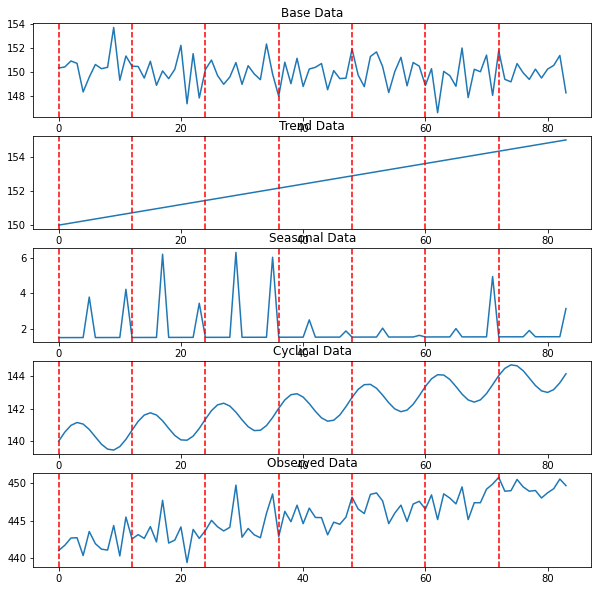

In [140]:
##
## Plot the simulated series
##
fig, ( ax1, ax2, ax3, ax4, ax5 ) = plt.subplots( 5, 1, figsize = ( 10, 10 ) )
##
ax1.plot( base )
ax1.set_title( 'Base Data' )
##
ax2.plot( trend )
ax2.set_title( 'Trend Data' )
##
ax3.plot( seasonal )
ax3.set_title( 'Seasonal Data' )
##
ax4.plot( cycle )
ax4.set_title( 'Cyclical Data' )
##
observed = base + trend + cycle + seasonal + np.random.normal( 5 , 10 )
ax5.plot( observed )
ax5.set_title( 'Observed Data' )
##
for i in range(n_periods):
    x = i * freq
    ax1.axvline( x, color = 'red', linestyle = '--' )
    ax2.axvline( x, color = 'red', linestyle = '--' )
    ax3.axvline( x, color = 'red', linestyle = '--' )
    ax4.axvline( x, color = 'red', linestyle = '--' )
    ax5.axvline( x, color = 'red', linestyle = '--' )
##
## Check stationarity again
##
pval = adfuller( observed )[ 1 ]
if( pval < 0.05 ):
    print( f'The series is stationary with p-value = {pval:.4f}' )
else:
    print( f'The series is non-stationary with p-value = {pval:.4f}' )

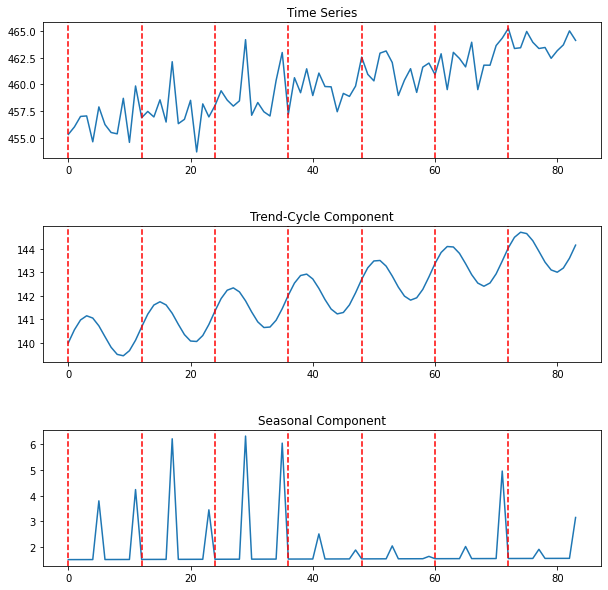

In [141]:
##
## Plot the simulated series
##
fig, ( ax1, ax2, ax3 ) = plt.subplots( 3, 1, figsize = ( 10, 10 ) )
fig.subplots_adjust( hspace = 0.5 )
##
observed = base + trend + cycle + seasonal + np.random.normal( 5 , 10 )
ax1.plot( observed )
ax1.set_title( 'Time Series' )
##
ax2.plot( cycle )
ax2.set_title( 'Trend-Cycle Component' )
##
ax3.plot( seasonal )
ax3.set_title( 'Seasonal Component' )
##
for i in range(n_periods):
    x = i * freq
    ax1.axvline( x, color = 'red', linestyle = '--' )
    ax2.axvline( x, color = 'red', linestyle = '--' )
    ax3.axvline( x, color = 'red', linestyle = '--' )
##

In [142]:
##
## Display the head of the simulated data
##
data = { 'base':base, 'trend':trend, 'cycle':cycle, 'seasonal':seasonal, 'observed':observed }
idx = pd.period_range( start = '01/01/2014', periods = N, freq = 'M' )
df = pd.DataFrame( data, index = idx )
df.head().style.set_caption( 'Simulated Data' ).set_table_styles( tbl_styles )


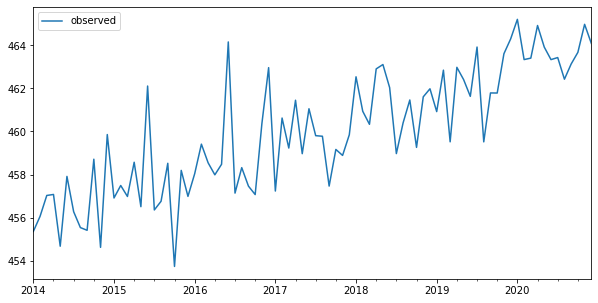

In [143]:
what = [ 'observed' ]
fig, ax = plt.subplots( figsize = ( 10, 5 ))
df[ what ].plot( ax = ax );

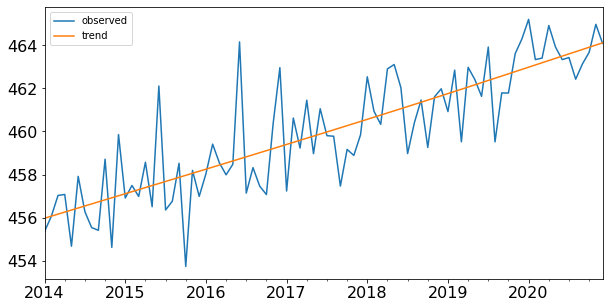

In [144]:
##
## Decompose the simulated data
##
cycle, trend = sm.tsa.filters.hpfilter( df.observed, 129600 )
obs_decomp = df[ what ].copy()
obs_decomp[ "cycle" ] = cycle
obs_decomp[ "trend" ] = trend
fig, ax = plt.subplots( figsize = ( 10, 5 ))
obs_decomp [ [ "observed", "trend" ] ].plot( ax = ax, fontsize = 16 );

In [145]:
pval = adfuller( df.observed )[ 1 ]
if( pval < 0.05 ):
    print( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    print( f'The base series is non-stationary with p-value = {pval:.4f}' )

The base series is non-stationary with p-value = 0.9773


The base series is stationary with p-value = 0.0000


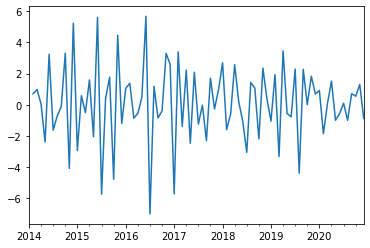

In [146]:
##
## First differencing to induce stationarity
##
diff = df.observed.diff()
display( diff.plot() );
##
## Drop NaN at first observation for Dickey-Fuller Test
##
diff.dropna( inplace = True )
pval = adfuller( diff )[ 1 ]
if( pval < 0.05 ):
    print( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    print( f'The base series is non-stationary with p-value = {pval:.4f}' );

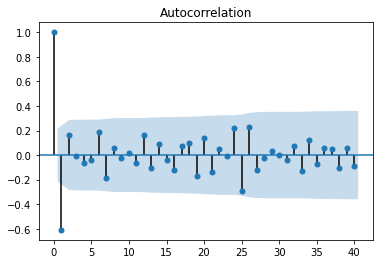

In [147]:
##
## ACF Plot for model identifcation
##
sm.graphics.tsa.plot_acf( diff, lags = 40 )
plt.show()

C:\Users\walt\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


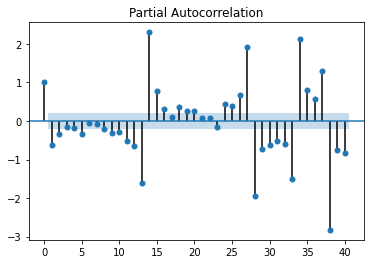

In [148]:
##
## PACF Plot for model identifcation
##
sm.graphics.tsa.plot_pacf( diff, lags = 40 )
plt.show()

### Pinkham Data

[Back to Appendix](#Appendix)

This is an annual sales revenue (*sales*) and advertising expenditures (*advertising*) for the Lydia Pinkham Company from 1907 through 1960, expressed in thousands of dollars per year ($000).  The sole product for the company was an alcohol-based elixir that was supposed to cure vaguely defined "women's ailments" (before the *FDA* and *FTC* limited the scope of their claims).  This data are used in many example studies.

In [149]:
##
## Import the data
##
file = 'pinkham.csv'
df_pink = pd.read_csv( path + file )
##
## Create and set DateTimeIndex
##
rng = pd.date_range( start = '01/01/1907', periods = 54, freq = 'A' )
df_pink.index = rng
##
## Display the Data
##
base = 'Base: All data'
display( df_pink.head().style.set_caption( 'Lydia Pinkham Data' ).set_table_styles( tbl_styles ) )
display( df_size( df_pink ) )

None

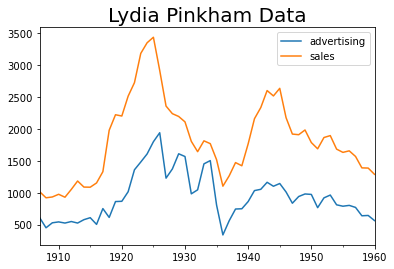

In [150]:
##
## Time series graph
##
ax = df_pink.plot()
ax.set_title( 'Lydia Pinkham Data', fontsize = font_title );

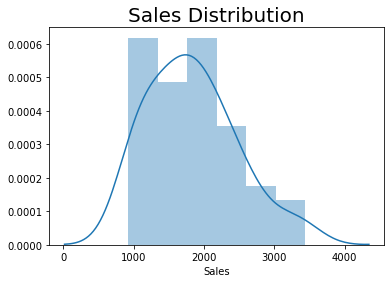

In [151]:
##
## Sales distribution
##
ax = sns.distplot( df_pink.sales )
ax.set_title( 'Sales Distribution', fontsize = font_title )
ax.set( xlabel = 'Sales' );

In [152]:
##
## Skewness test
## HO: No skewness
## HA: Skewed
##
skewtest( df_pink.sales )

SkewtestResult(statistic=1.8951667818519053, pvalue=0.05807030946622816)

**_Interpretation_**

Distribution is marginally skewed right (positive sign).  Reject $H_O$.

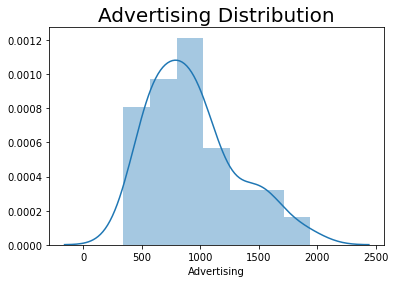

In [153]:
##
## Advertising distribution
##
ax = sns.distplot( df_pink.advertising )
ax.set_title( 'Advertising Distribution', fontsize = font_title )
ax.set( xlabel = 'Advertising' );

In [154]:
##
## Skewness test
## HO: No skewness
## HA: Skewed
##
skewtest( df_pink.advertising )

SkewtestResult(statistic=2.445857621738444, pvalue=0.014450805444492214)

**_Interpretation_**

Distribution is skewed right (positive sign).  Reject $H_O$.

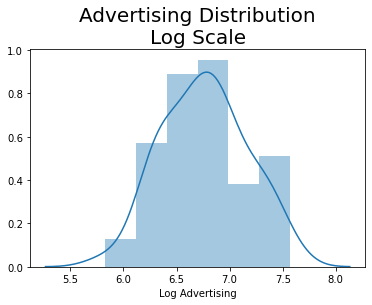

In [155]:
##
## Transform with natural logs to fix skewness
##
df_pink[ 'log_advertising' ] = np.log( df_pink.advertising )
ax = sns.distplot( df_pink.log_advertising )
ax.set_title( 'Advertising Distribution\nLog Scale', fontsize = font_title )
ax.set( xlabel = 'Log Advertising' );

In [156]:
##
## Skewness test
## HO: No skewness
## HA: Skewed
##
skewtest( df_pink.log_advertising )

SkewtestResult(statistic=0.12076598396919502, pvalue=0.9038763937189371)

**_Interpretation_**

Distribution is not skewed.  Do not reject $H_O$.

### Autos Production Data

[Back to Appendix](#Appendix)

Source: Levenbach and Cleary, p. 111

In [157]:
##
## Create customer date parser
##
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime( x, "%YM%m" )
##
## Import autos production data and use custom date parser
##
file = 'autos.csv'
cols = [ 'date', 'autos' ]
df_autos = pd.read_csv( path + file, header = 0, names = cols, parse_dates = [ 'date' ], date_parser = custom_date_parser )
df_autos.set_index( 'date', inplace = True )
df_autos.head().style.set_caption( 'Auto Production Data' ).set_table_styles( tbl_styles )
df_autos

autos
date              
1977-01-01  712548
1977-02-01  700399
1977-03-01  936870
1977-04-01  819154
1977-05-01  880640
...            ...
1985-08-01  550469
1985-09-01  635329
1985-10-01  760970
1985-11-01  668083
1985-12-01  541031

[108 rows x 1 columns]

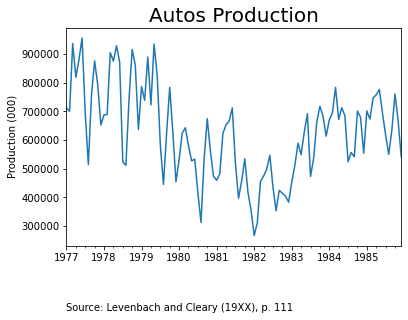

In [158]:
##
## Plot the time series
##
base = 'Source: Levenbach and Cleary (19XX), p. 111'
ax = df_autos.autos.plot()
ax.set_title( 'Autos Production', fontsize = font_title )
ax.set( xlabel = '', ylabel = 'Production (000)' )
footer( ax );

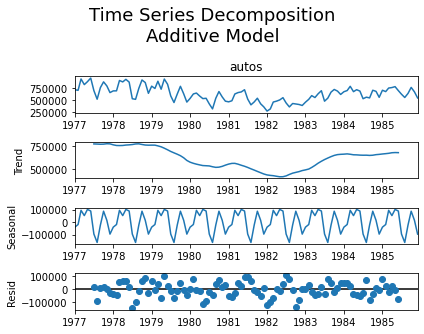

In [159]:
decomp = sm.tsa.seasonal_decompose(df_autos.autos)
ax = decomp.plot()
ax.suptitle( 'Time Series Decomposition\nAdditive Model', fontsize = 18, y = 1.15 );

**_Interpretation_**

The nonconstant mean pattern suggests nonstationarity.  Use the Adjusted Dickey-Fuller Test.

In [160]:
##
## Check autos production data for stationarity
##
pval = adfuller( df_autos.autos )[ 1 ]
if( pval < 0.05 ):
    boldprt( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    boldprt( f'The base series is non-stationary with p-value = {pval:.4f}' );

The base series is non-stationary with p-value = 0.3388


In [161]:
##
## Add a first difference to the DataFrame
##
df_autos[ 'diff_autos_1' ] = df_autos.autos.diff( periods = 1 )
df_autos.head().style.set_caption( 'Auto Production Data with First Difference' ).set_table_styles( tbl_styles )

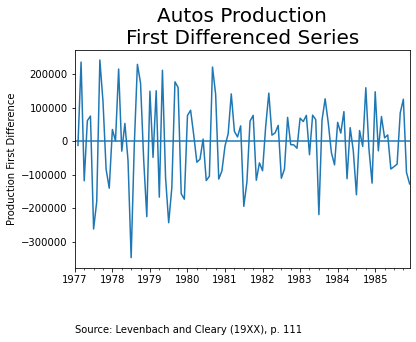

In [162]:
##
## Plot of first differenced series
##
base = 'Source: Levenbach and Cleary (19XX), p. 111'
ax = df_autos.diff_autos_1.plot( )
ax.axhline( y = 0 )
ax.set_title( 'Autos Production\nFirst Differenced Series', fontsize = font_title )
ax.set( xlabel = '', ylabel = 'Production First Difference' )
footer( ax );

**_Interpretation_**

Notice that the first differenced series varies around zero.

In [163]:
##
## Do Dickey-Fuller Test on first difference
## Drop NaN values
##
tmp = df_autos.copy()
tmp.dropna( inplace = True )
pval = adfuller( tmp.diff_autos_1 )[ 1 ]
if( pval < 0.05 ):
    boldprt( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    boldprt( f'The base series is non-stationary with p-value = {pval:.4f}' );

The base series is non-stationary with p-value = 0.0992


In [164]:
##
## Add two-period difference
##
df_autos[ 'diff_autos_2' ] = df_autos.autos.diff( periods = 2 )
df_autos.head().style.set_caption( 'Auto Production Data with Second Difference' ).set_table_styles( tbl_styles )

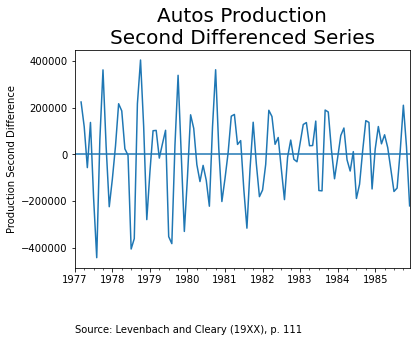

In [165]:
##
## Plot of second differenced series
##
base = 'Source: Levenbach and Cleary (19XX), p. 111'
ax = df_autos.diff_autos_2.plot( )
ax.axhline( y = 0 )
ax.set_title( 'Autos Production\nSecond Differenced Series', fontsize = font_title )
ax.set( xlabel = '', ylabel = 'Production Second Difference' )
footer( ax );

In [166]:
##
## Do Dickey-Fuller Test on second difference
## Drop NaN values
##
tmp = df_autos.copy()
tmp.dropna( inplace = True )
pval = adfuller( tmp.diff_autos_2 )[ 1 ]
if( pval < 0.05 ):
    boldprt( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    boldprt( f'The base series is non-stationary with p-value = {pval:.4f}' );

The base series is non-stationary with p-value = 0.1031


### Ice Cream Data

[Back to Appendix](#Appendix)

Source: Levenbach and Cleary, p. 109

In [167]:
##
## Create customer date parser
##
custom_date_parser = lambda x: datetime.strptime( x, "%YM%m" )
##
## Import ice cream sales data and use custom date parser
##
ttl = 'Icre Cream Data'
file = 'iceCream.csv'
cols = [ 'date', 'iceCream' ]
df_ice = pd.read_csv( path + file, header = 0, names = cols, parse_dates = [ 'date' ], date_parser = custom_date_parser )
df_ice.set_index( 'date', inplace = True )
df_ice.head().style.set_caption( ttl ).set_table_styles( tbl_styles )


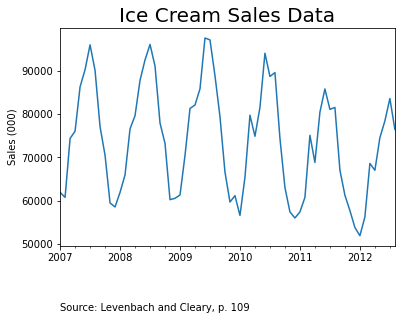

In [168]:
##
## Plot the ice cream time series
##
base = 'Source: Levenbach and Cleary, p. 109'
ax = df_ice.iceCream.plot()
ax.set_title( 'Ice Cream Sales Data', fontsize = font_title )
ax.set( xlabel = '', ylabel = 'Sales (000)' )
footer( ax );

In [169]:
tmp = df_ice.copy()
tmp.dropna( inplace = True )
pval = adfuller( tmp.iceCream )[ 1 ]
if( pval < 0.05 ):
    boldprt( f'The base series is stationary with p-value = {pval:.4f}' )
else:
    boldprt( f'The base series is non-stationary with p-value = {pval:.4f}' );

The base series is non-stationary with p-value = 0.9991


<div class="alert alert-info" role="alert">
    
<font color = black>Exercise Solutions
--------------------------------------
    
[Back to Contents](#Contents)  
    
</div>


### Solution I.1

Create a string of the full date and time as stated above which are in *ISO* format above.  Display just the date, no time, in your local format from this string.    

[Return to Exercise I.1](#Exercise-I.1)

In [170]:
##
## The date and time is 03:14:07 UTC on 19 January 2038
##
date_str = '19 January 2038 03:14:07'
date_fmt = "%d %B %Y %H:%M:%S"
##
## Parse the date string into a datetime variable
##
y38 = datetime.strptime( date_str, date_fmt )
##
boldprt( 'The date in U.S. format is:' )
print( print( f'\t{datetime.strftime( y38, "%B %d, %Y" )}' ) )

The date in U.S. format is:
	January 19, 2038
None


### Solution I.2

Write a statement to determine the day-of-the-week that *Y38* will occur.  

[Return to Exercise I.2](#Exercise-I.2)

In [171]:
##
## The date and time is 03:14:07 UTC on 19 January 2038
##
date_str = '19 January 2038 03:14:07'
date_fmt = "%d %B %Y %H:%M:%S"
##
## Parse the date string into a datetime variable
##
y38 = datetime.strptime( date_str, date_fmt )
##
## Display the parsed datetime using strftime
##
boldprt( 'The day-of-week is:' )
print( f'\t{datetime.strftime( y38, "%A" )}' )


The day-of-week is:
	Tuesday


### Solution I.3

Write a statement to display the entire date when *Y38* will occur as "DOW, MONTH DAY, YEAR at HOUR:MINUTE:SECOND".  Example display format: *Thursday, November 26, 2020 at 01:15:25*.

[Return to Exercise I.3](#Exercise-I.3)

In [172]:
##
## The date and time is 03:14:07 UTC on 19 January 2038
##
date_str = '19 January 2038 03:14:07'
date_fmt = "%d %B %Y %H:%M:%S"
##
## Parse the date string into a datetime variable
##
y38 = datetime.strptime( date_str, date_fmt )
##
## Display the parsed datetime using strftime
##
fmt = "%A, %B %d, %Y at %H:%M:%S"
boldprt( 'The full date and time is:' )
print( f'\t{datetime.strftime( y38, fmt )}' )


The full date and time is:
	Tuesday, January 19, 2038 at 03:14:07


### Solution II.1

Create a Pandas datetime variable using this list of dates:

lst = [ '01/01/2021', '7/04/2021', '2021-09-03', 'October 31, 2021', '25Dec2021' ]

[Return to Exercise II.1](#Exercise-II.1)

In [173]:
##
## Create a Pandas Series from the list and apply the to_datetime method
##
lst = [ '01/01/2021', '7/04/2021', '2021-09-03', 'October 31, 2021', '25Dec2021' ]
pd.to_datetime( pd.Series( lst ) ) 

0   2021-01-01
1   2021-07-04
2   2021-09-03
3   2021-10-31
4   2021-12-25
dtype: datetime64[ns]

### Solution II.2

Create a Pandas date range starting with January 1, 2021 for 5 weeks.

[Return to Exercise II.2](#Exercise-II.2)

In [174]:
##
## Create the range using the periods argument
##
pd.date_range( start = '1/1/2021', periods = 5, freq = 'W' )

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31'],
              dtype='datetime64[ns]', freq='W-SUN')

**_Interpretation_**

The first week in January, 2021 begins with 1/3/21.

### Solution II.3

Create a DataFrame with a variable *X* that has five (5) values: 1, 2, 3, 4, 5.  Use a dictionary for this. Call the DataFrame *df_exercise*.  Then add a new variable, call it *days*, as a DatetimeIndex for five consequtive days beginning with January 4, 2021.  Use the character string shown for the date.  Convert this DateTimeIndex variable to the DataFrame index.  Display the final DataFrame.

[Return to Exercise II.3](#Exercise-II.3)

In [175]:
##
## Create the DataFrame
##
data = { 'X':range( 1, 6 ) }
df_exercise = pd.DataFrame( data )
##
## Add days variable
##
df_exercise[ 'days' ] = pd.date_range( start = 'January 4, 2021', periods = 5, freq = 'D' )
##
## Set index and display
##
df_exercise.set_index( 'days', inplace = True )
##
display( df_exercise )

X
days         
2021-01-04  1
2021-01-05  2
2021-01-06  3
2021-01-07  4
2021-01-08  5

### Solution II.4

Query the DataFrame from Exercise II.3 for January 6, 2021.  Use this string representation for the day.

[Return to Exercise II.4](#Exercise-II.4)

In [176]:
##
## Use the query method
##
df_exercise.query( "index == 'January 6, 2021'" )

X
days         
2021-01-06  3

In [177]:
##
## Alternative: define a day variable and use @day
##
day = 'January 6, 2021'
df_exercise.query( "index == @day" )

X
days         
2021-01-06  3

### Solution II.5

Create a PeriodIndex for five consequetive calendar quarters beginning with 1Q2021.  Use the character string shown for the date.

[Return to Exercise II.5](#Exercise-II.5)

In [178]:
##
## Use period_range
##
pd.period_range( start = '1Q2021', periods = 5, freq = 'Q' )

PeriodIndex(['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Solution II.6

Create a DataFrame named *df_exercise* using the dictionary: { 'week':pd.date_range( start = '1/1/2021', end = '3/31/2021', freq = 'W') }.  Add a variable *X* that is the row index number (i.e., 0, 1, ...).  Set the DataFrame index to *date* and make it monthly periods.  HINT: use to_period.

[Return to Exercise II.6](#Exercise-II.6)

In [179]:
##
## Create the DataFrame
##
data = { 'week':pd.date_range( start = '1/1/2021', end = '3/31/2021', freq = 'W') }
df_exercise = pd.DataFrame( data )
df_exercise[ 'X' ] = [ x for x in range( df_exercise.shape[ 0 ] ) ]
##
## Set the index to week
##
df_exercise.set_index( 'week', inplace = True )
display( df_exercise )
##
## Set index to month
##
df_exercise.index = df_exercise.index.to_period("M")
display( df_exercise )

X
week          
2021-01-03   0
2021-01-10   1
2021-01-17   2
2021-01-24   3
2021-01-31   4
2021-02-07   5
2021-02-14   6
2021-02-21   7
2021-02-28   8
2021-03-07   9
2021-03-14  10
2021-03-21  11
2021-03-28  12

X
week       
2021-01   0
2021-01   1
2021-01   2
2021-01   3
2021-01   4
2021-02   5
2021-02   6
2021-02   7
2021-02   8
2021-03   9
2021-03  10
2021-03  11
2021-03  12

### Solution II.7

Import the ice cream shipments data which are in the the *CSV* file named *iceCream.csv*.  Create a DataFrame named *df_iceCream*.  Convert the *date* variable to a *DatetimeIndex* and then set the DataFrame's index to this *date* variable.  Convert the index to a *periodIndex* using *to_period*.

[Return to Exercise II.7](#Exercise-II.7)


In [180]:
file = 'iceCream.csv'
df_iceCream = pd.read_csv( path + file )
##
df_iceCream.date = pd.to_datetime( df_iceCream.date, format = '%YM%m' )
##
df_iceCream.set_index( 'date', inplace = True )
df_iceCream.index = df_iceCream.index.to_period( 'M' )
##
df_iceCream.head()

shipment
date             
2007-01     61977
2007-02     60814
2007-03     74369
2007-04     76066
2007-05     86254

### Solution II.8

Create a new variable *lag_shipments* as a one period lag of the ice cream shipments data.  Display the DataFrame head to verify the lag. 

[Return to Exercise II.8](#Exercise-II.8)


In [181]:
##
## Use the shift method
##
df_iceCream[ 'lag_shipment'] = df_iceCream.shipment.shift( )
df_iceCream.head()

shipment  lag_shipment
date                           
2007-01     61977           NaN
2007-02     60814       61977.0
2007-03     74369       60814.0
2007-04     76066       74369.0
2007-05     86254       76066.0

### Solution III.1

Import the ice cream data again as a new DataFrame named *df_ice*.  Convert the *date* variable to a *datetime variable*.  Use the accessor method, *dt*, to extract the year from the DataFrame's *date* variable.  Add this year data to the DataFrame as a new variable named *year*.

[Return to Exercise III.1](#Exercise-III.1)



In [182]:
##
## Import
##
file = 'iceCream.csv'
df_ice = pd.read_csv( path + file )
##
## Create datetime variable
##
df_ice.date = pd.to_datetime( df_ice.date, format = '%YM%m' )
##
## Use accessor to get year
##
df_ice[ 'year' ] = df_ice.date.dt.year
df_ice.head()


date  shipment  year
0 2007-01-01     61977  2007
1 2007-02-01     60814  2007
2 2007-03-01     74369  2007
3 2007-04-01     76066  2007
4 2007-05-01     86254  2007

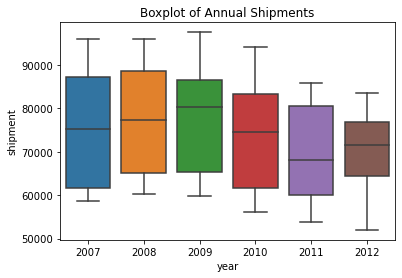

In [183]:
##
## ===> Extra <===
##
## Boxplot of shipments by year
##
ax = sns.boxplot( y = 'shipment', x = 'year', data = df_ice )
ax.set_title( 'Boxplot of Annual Shipments' );

### Solution III.2

Using the ice cream DataFrame from Exerecise IV.1, *df_ice*, resample the monthly data to quarterly data.  For the shipments variable, aggregate to total quarter (i.e., sum the monthly data).

[Return to Exercise III.2](#Exercise-III.2)


In [184]:
## 
## Define aggregation method
##
aggregation = { 'shipment':'sum' }
## 
## Set index to date which is a datetime variable
##
df_ice.set_index( 'date', inplace = True )
##
## Resample to quarters
##
x = df_ice.resample( 'Q' ).agg( aggregation )
x.head()

shipment
date                
2007-03-31    197160
2007-06-30    252547
2007-09-30    263082
2007-12-31    188660
2008-03-31    204568

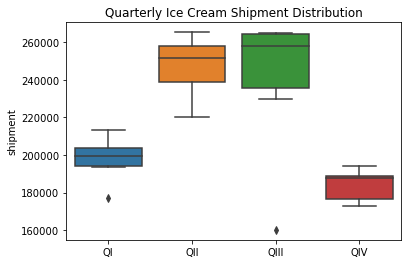

In [185]:
ax = sns.boxplot( x = [ qrt_lst[ i - 1 ] for i in x.index.quarter ], y = 'shipment', data = x )
ax.set_title( 'Quarterly Ice Cream Shipment Distribution' );

### Solution IV.1

Use the ice cream shipments DataFrame to do an *ANOVA* check for trend and seasonality.  What is the contribution of each part to the time series? 

[Return to Exercise IV.1](#Exercise-IV.1)


In [186]:
df_iceCream[ 'month' ] = df_iceCream.index.month
df_iceCream[ 'year' ] = df_iceCream.index.year
df_iceCream.head()

shipment  lag_shipment  month  year
date                                        
2007-01     61977           NaN      1  2007
2007-02     60814       61977.0      2  2007
2007-03     74369       60814.0      3  2007
2007-04     76066       74369.0      4  2007
2007-05     86254       76066.0      5  2007

In [187]:
##
## Extract month and year from PeriodIndex
##
df_iceCream[ 'month' ] = df_iceCream.index.month
df_iceCream[ 'year' ] = df_iceCream.index.year
df_iceCream.head()
##
## Do regression to get ANOVA pieces
##
formula = 'shipment ~ C(month) + C(year)'
mod = smf.ols( formula, data = df_iceCream )
reg01 = mod.fit()
##
## Do ANOVA using regression output
## Highlight p-values
##
aov = anova_lm( reg01 )
aov.index = [ 'Seasonality', 'Trend', 'Irregularity' ]
subsets = pd.IndexSlice[ ( [ 'Seasonality', 'Trend' ] ), 'PR(>F)' ]
aov.style.set_caption( 'ANOVA for Seasonality and Trend' ).set_table_styles( tbl_styles ).\
    applymap( lambda x: "background-color: yellow", subset = subsets )

In [188]:
##
## ANOVA Decomposition Contribution
##
x = aov.sum_sq/aov.sum_sq.sum()
aov_decomp = pd.DataFrame( x )
aov_decomp.rename( columns = {'sum_sq':'Percent'}, inplace = True )
aov_decomp.style.set_caption( 'AONVA Decomposition' ).set_table_styles( tbl_styles ).format( format )

### Solution IV.2

Create a time series plot of the ice cream shipment data.  What do you conclude?  How does this conclusion compare with your conclusion from the *ANOVA* test in Exercise IV.1?

[Return to Exercise IV.2](#Exercise-IV.2)


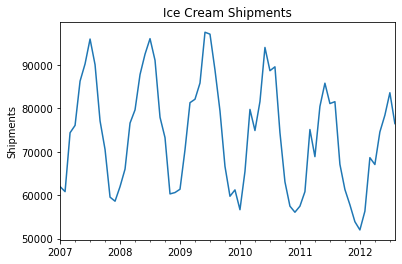

In [189]:
##
## Use the DataFrame plot method
##
ax = df_iceCream.shipment.plot()
ax.set_title( 'Ice Cream Shipments' )
ax.set( xlabel = '', ylabel = 'Shipments' );

### Solution V.1

Do an Augmented Dickey-Fuller Test, without a constant or trend, on the last simulated series.  The DataFrame is *df_z*.

[Return to Exercise V.1](#Exercise-V.1)


In [190]:
##
## Augmented Dickey-Fuller Test
## Case II: Constant
## Undifferenced series
##
adf, pval, lags, obs, crit, icbest = adfuller( df_z, regression = 'nc' )
##
## Report Results
##
boldprt( 'Dickey-Fuller Statistic' )
print( f'\t{adf:.3f}' )
boldprt( 'Dickey-Fuller p-Value' )
print( f'\t{pval:.3f}' )
##
if pval > 0.05:
    boldprt( 'Conclusion: Reject Null Hypothesis\nSeries is Stationary' )
else:
    boldprt( 'Conclusion: Do Not Reject Null Hypothesis\nSeries is Non-Stationary' )


Dickey-Fuller Statistic
	-21.333
Dickey-Fuller p-Value
	0.000
Conclusion: Do Not Reject Null Hypothesis
Series is Non-Stationary


### Solution V.2

Redo the Pinkham forecast with an AR(2) model.

[Return to Exercise V.2](#Exercise-V.2)


In [191]:
##
## Copy DataFrame and set parameters
##
tmp = df_pink.copy()
tmp.reset_index( inplace = True )
T = len( tmp )   ## Length of history
h = 5            ## steps ahead forecast
##
## Do autoreg -- see Best Practices package loading for function
## Set the AutoReg lag parameter to 2 for AR( 2 )
##
mod = AutoReg( tmp.sales, 2 )
reg_ar2 = mod.fit()
display( reg_ar2.summary() )
##
## Set forecast range
##
forecast_index = pd.period_range( 1961, freq = 'Y', periods = h )
fct = reg_ar2.predict( start = T, end = T + h, dynamic = False )
##
## Buils DataFrame of history and forecast
##
data = { 'index':pd.period_range( 1961, freq = 'Y', periods = h + 1 ), 'sales':fct }
junk = pd.DataFrame( data )
tmp = tmp.append( junk )
tmp.set_index( 'index', inplace = True )
tmp.drop( columns = [ 'advertising' ] , inplace = True )
tmp.tail( n = 7 ).style.set_caption( 'Sales History and Forecast AR(2)\n' + str( h ) + ' Steps Ahead' ).\
    set_table_styles( tbl_styles )

C:\Users\walt\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                   54
Model:                     AutoReg(2)   Log Likelihood                -349.443
Method:               Conditional MLE   S.D. of innovations            200.562
Date:                Wed, 17 Mar 2021   AIC                             10.756
Time:                        13:09:02   BIC                             10.906
Sample:                             2   HQIC                            10.814
                                   54                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    212.7383     88.147      2.413      0.016      39.973     385.504
sales.L1       1.3628      0.121     11.233      0.000       1.125       1.601
sales.L2      -0.4754      0.120     -3.965      0.000      -0.710      -0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4332           -0.2221j            1.4503           -0.0245
AR.2            1.4332           +0.2221j            1.4503            0.0245
-----------------------------------------------------------------------------
"""

<div class="alert alert-info" role="alert">
    
<font color = black>End Exercise Solutions
--------------------------------------
    
[Back to Contents](#Contents)  
    
</div>
